<a href="https://colab.research.google.com/github/jannat-miftahul/twitter-sentiment-analysis/blob/main/sentiment_analysis_supervised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
# Step 1: Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

In [12]:
# Step 2: Load and clean data
from google.colab import files
files.upload()
df=pd.read_csv("twitter_training.csv", encoding='latin1')
# df.head(13)
df.columns = ["id", "entity", "sentiment", "tweet_text"]
df = df.dropna(subset=["tweet_text"])
display(df.head())

Saving twitter_training.csv to twitter_training (1).csv


id       entity sentiment  \
0  2701  Borderlands  Negative   
1  2701  Borderlands  Negative   
2  2701  Borderlands  Negative   
3  2702  Borderlands  Positive   
4  2702  Borderlands  Positive   

                                          tweet_text  
0  This is a fucking joke at this point when are ...  
1  Like This is a fucking joke at this little poi...  
2  This get a fucking joke at this day when are t...  
3  We're gonna continue where we left off, and pl...  
4  We'll continue where we left off and play a fe...

In [13]:
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
id            0
entity        0
sentiment     0
tweet_text    0
dtype: int64


In [14]:
# Step 3: Label encoding and TF-IDF
label_encoder = LabelEncoder()
df["sentiment_encoded"] = label_encoder.fit_transform(df["sentiment"])

vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df["tweet_text"])
y = df["sentiment_encoded"]

In [15]:
# Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Step 5: Train Decision Tree and evaluate
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

Accuracy: 0.7678511565538049
              precision    recall  f1-score   support

  Irrelevant       0.74      0.71      0.72      1197
    Negative       0.79      0.82      0.80      1888
     Neutral       0.77      0.73      0.75      1273
    Positive       0.76      0.78      0.77      1608

    accuracy                           0.77      5966
   macro avg       0.76      0.76      0.76      5966
weighted avg       0.77      0.77      0.77      5966



In [17]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

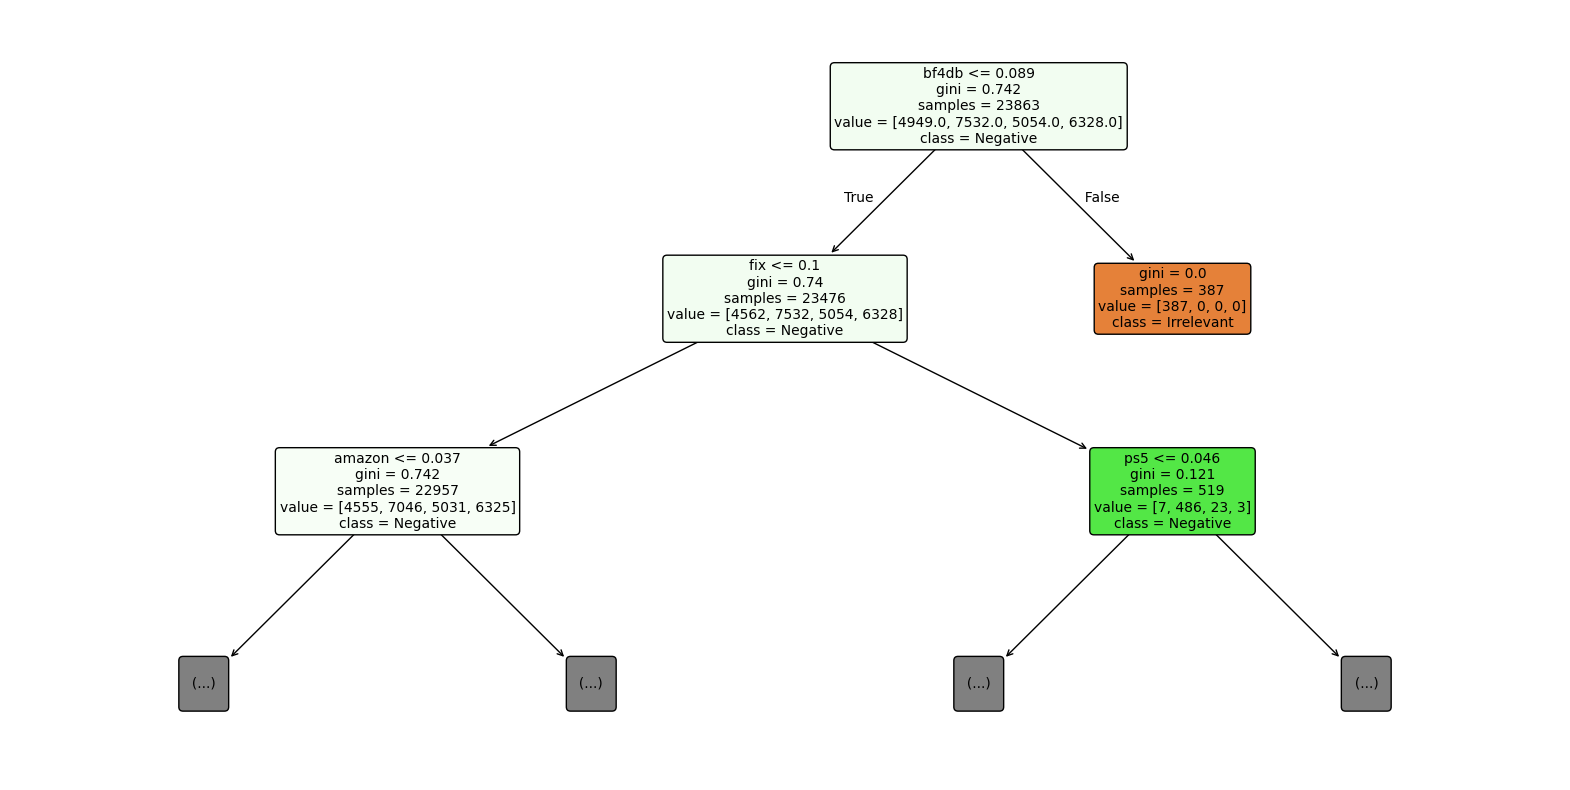

In [18]:
plt.figure(figsize=(20, 10))  # Size of the plot
plot_tree(
    clf,
    max_depth=2,  # Only show top 2 levels
    feature_names=vectorizer.get_feature_names_out(),
    class_names=label_encoder.classes_,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.show()

In [19]:
from sklearn.model_selection import cross_val_score

Classification Report (Decision Tree - Without CV):
              precision    recall  f1-score   support

  Irrelevant       0.74      0.71      0.72      1197
    Negative       0.79      0.82      0.80      1888
     Neutral       0.77      0.73      0.75      1273
    Positive       0.76      0.78      0.77      1608

    accuracy                           0.77      5966
   macro avg       0.76      0.76      0.76      5966
weighted avg       0.77      0.77      0.77      5966


Confusion Matrix (Decision Tree - Without CV):


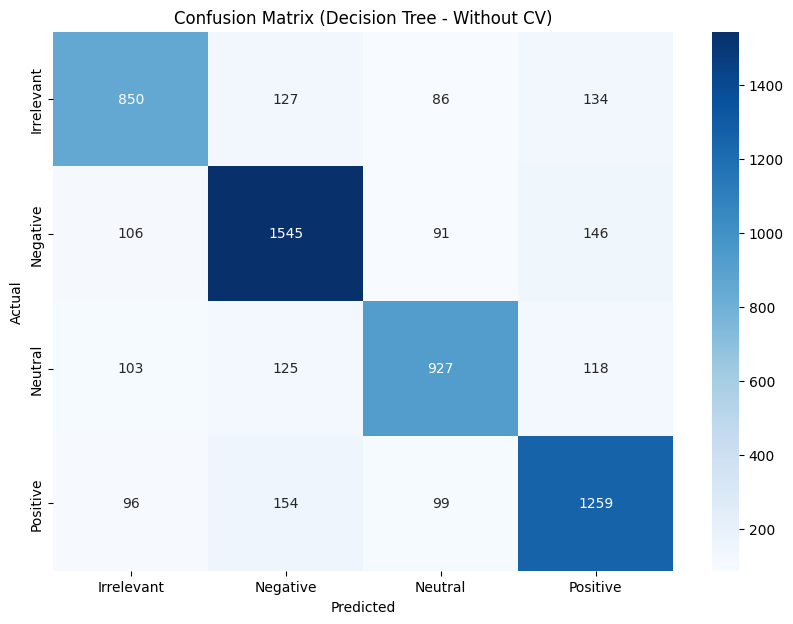

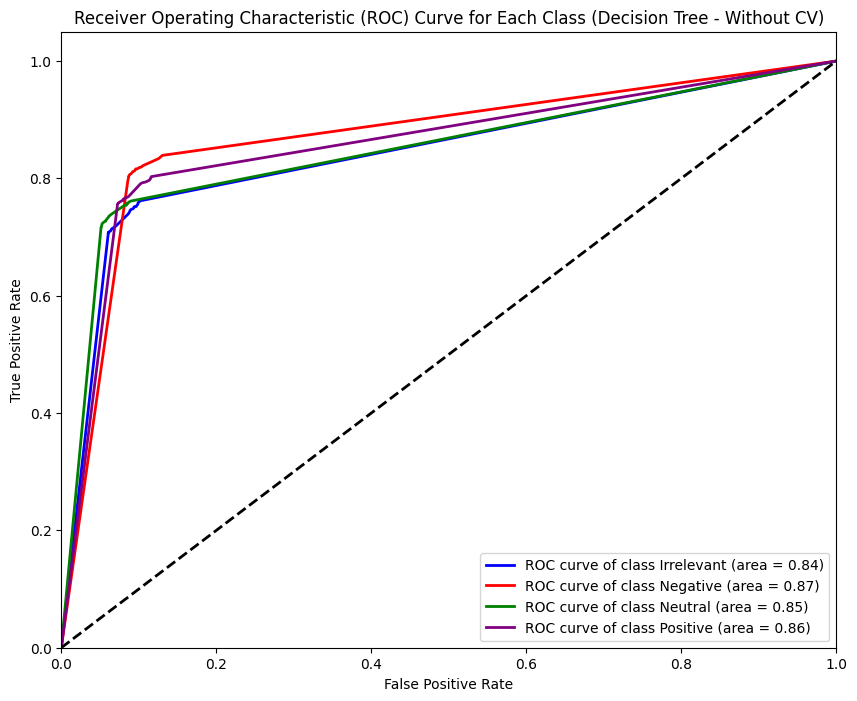

In [20]:
# Decision Tree
# Without Cross-validation

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, accuracy_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Assuming the Decision Tree model (clf), test data (X_test, y_test),
# and label encoder (label_encoder) are available from previous cells.

# Make predictions on the test data (assuming clf is already trained in cell bZ3snq759AEK)
y_pred = clf.predict(X_test)

# Classification Report
print("Classification Report (Decision Tree - Without CV):")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Confusion Matrix
print("\nConfusion Matrix (Decision Tree - Without CV):")
cm_dt = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(
    cm_dt,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=label_encoder.classes_,
    yticklabels=label_encoder.classes_,
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Decision Tree - Without CV)")
plt.show()

# Compute ROC curve and ROC area for each class (without cross-validation)

# Binarize the true labels
y_test_binarized_dt = label_binarize(y_test, classes=np.arange(len(label_encoder.classes_)))
n_classes_dt = y_test_binarized_dt.shape[1]

# Get predicted probabilities from the Decision Tree model
# predict_proba is needed for ROC curve
y_score_dt = clf.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr_dt = dict()
tpr_dt = dict()
roc_auc_dt = dict()
for i in range(n_classes_dt):
    # Compute ROC curve for class i using binarized true labels and predicted probabilities for class i
    fpr_dt[i], tpr_dt[i], _ = roc_curve(y_test_binarized_dt[:, i], y_score_dt[:, i])
    roc_auc_dt[i] = auc(fpr_dt[i], tpr_dt[i])

# Plot ROC curves for each class
plt.figure(figsize=(10, 8))
colors = ['blue', 'red', 'green', 'purple'] # Adjust colors based on number of classes
for i, color in zip(range(n_classes_dt), colors):
    # Ensure the class exists
    if i < len(label_encoder.classes_):
        plt.plot(fpr_dt[i], tpr_dt[i], color=color, lw=2,
                 label='ROC curve of class {0} (area = {1:0.2f})'.format(label_encoder.classes_[i], roc_auc_dt[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Each Class (Decision Tree - Without CV)')
plt.legend(loc="lower right")
plt.show()


Performing 5-Fold Cross-Validation with Decision Tree:

--- Fold 1/5 ---
  Training complete.
Accuracy for Fold 1: 0.7679
Classification Report for Fold 1:
              precision    recall  f1-score   support

  Irrelevant       0.74      0.71      0.72      1197
    Negative       0.79      0.82      0.80      1888
     Neutral       0.77      0.73      0.75      1273
    Positive       0.76      0.78      0.77      1608

    accuracy                           0.77      5966
   macro avg       0.76      0.76      0.76      5966
weighted avg       0.77      0.77      0.77      5966

Confusion Matrix for Fold 1:
[[ 850  127   86  134]
 [ 106 1545   91  146]
 [ 103  125  927  118]
 [  96  154   99 1259]]


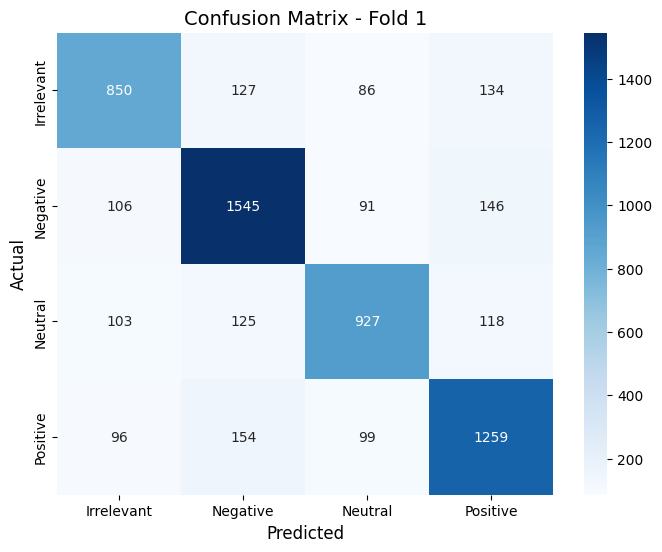

ROC AUC per class for Fold 1: {'Irrelevant': np.float64(0.1571833406820329), 'Negative': np.float64(0.8704906728747059), 'Neutral': np.float64(nan), 'Positive': np.float64(nan)}


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


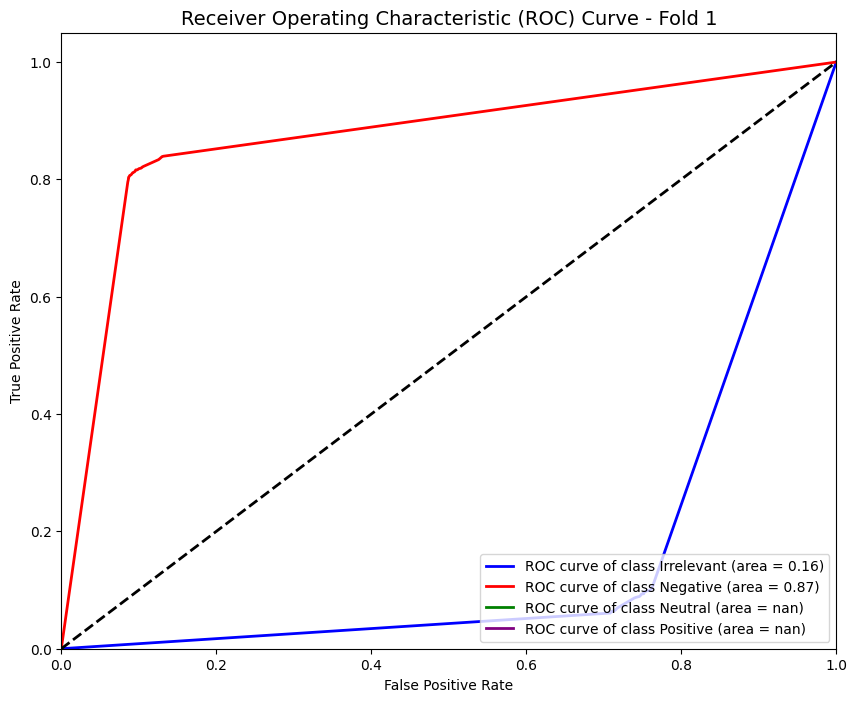


--- Fold 2/5 ---
  Training complete.
Accuracy for Fold 2: 0.7754
Classification Report for Fold 2:
              precision    recall  f1-score   support

  Irrelevant       0.73      0.74      0.73      1267
    Negative       0.82      0.81      0.82      1914
     Neutral       0.76      0.78      0.77      1238
    Positive       0.77      0.76      0.76      1547

    accuracy                           0.78      5966
   macro avg       0.77      0.77      0.77      5966
weighted avg       0.78      0.78      0.78      5966

Confusion Matrix for Fold 2:
[[ 938  113   98  118]
 [ 139 1559   95  121]
 [  86   84  961  107]
 [ 123  150  106 1168]]


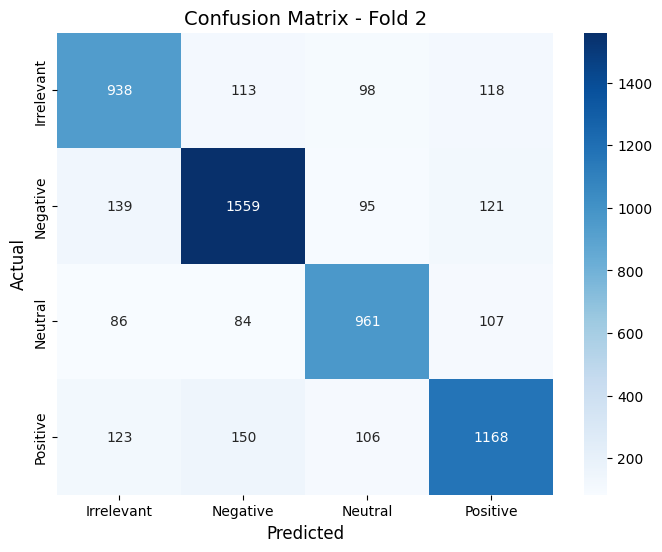

ROC AUC per class for Fold 2: {'Irrelevant': np.float64(0.1557856354263019), 'Negative': np.float64(0.8774667566154103), 'Neutral': np.float64(nan), 'Positive': np.float64(nan)}


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


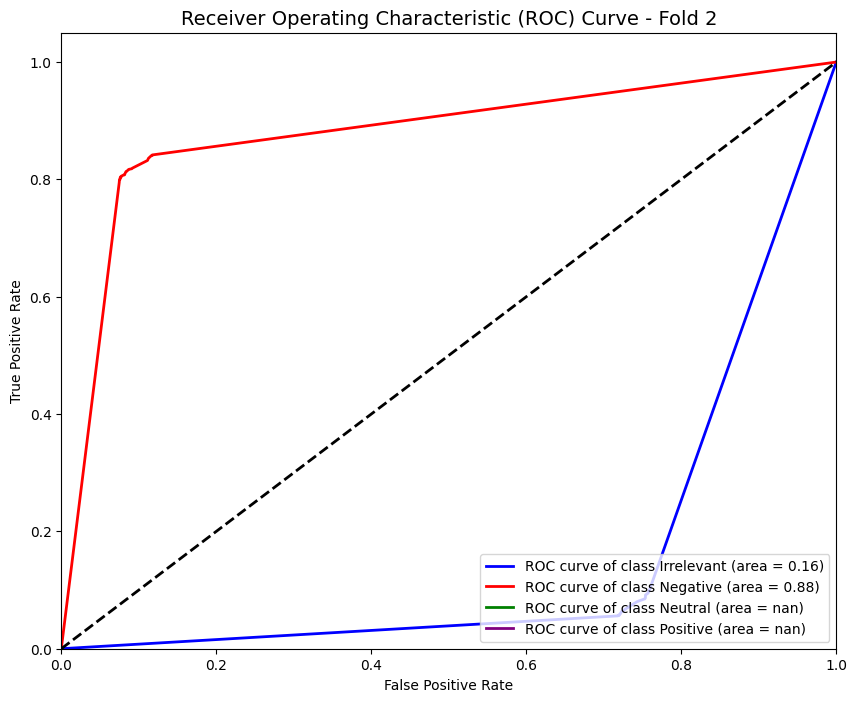


--- Fold 3/5 ---
  Training complete.
Accuracy for Fold 3: 0.7675
Classification Report for Fold 3:
              precision    recall  f1-score   support

  Irrelevant       0.71      0.74      0.72      1227
    Negative       0.80      0.82      0.81      1866
     Neutral       0.77      0.73      0.75      1294
    Positive       0.77      0.76      0.76      1579

    accuracy                           0.77      5966
   macro avg       0.76      0.76      0.76      5966
weighted avg       0.77      0.77      0.77      5966

Confusion Matrix for Fold 3:
[[ 904  120   88  115]
 [ 124 1531   91  120]
 [ 107  122  948  117]
 [ 132  152   99 1196]]


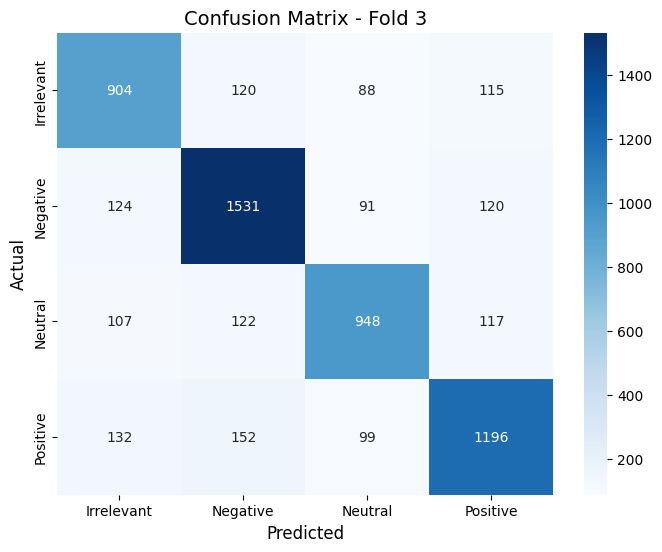

ROC AUC per class for Fold 3: {'Irrelevant': np.float64(0.15411540266628695), 'Negative': np.float64(0.8750705173450448), 'Neutral': np.float64(nan), 'Positive': np.float64(nan)}


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


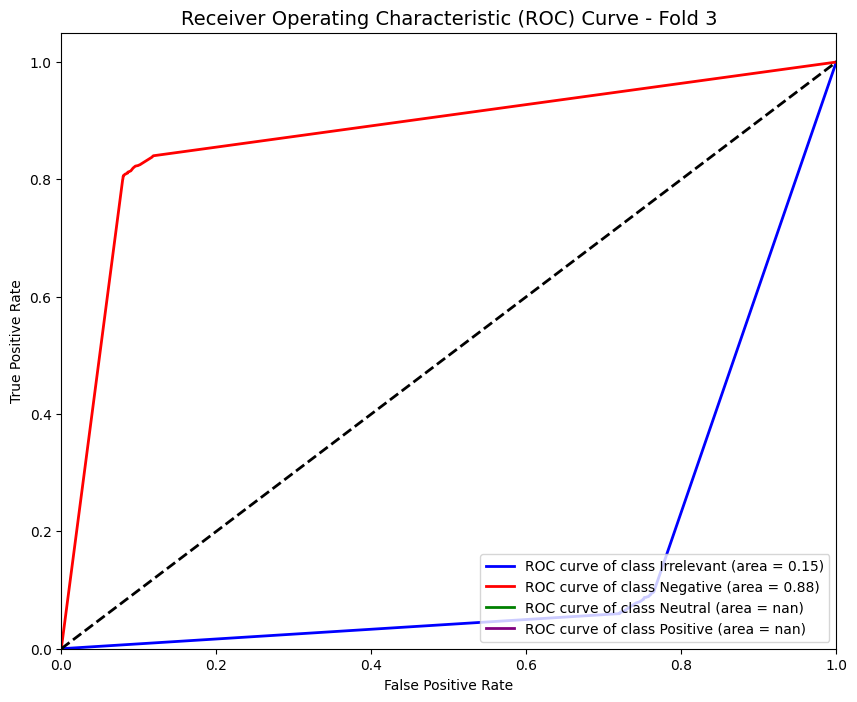


--- Fold 4/5 ---
  Training complete.
Accuracy for Fold 4: 0.7675
Classification Report for Fold 4:
              precision    recall  f1-score   support

  Irrelevant       0.75      0.73      0.74      1192
    Negative       0.80      0.81      0.80      1883
     Neutral       0.76      0.74      0.75      1259
    Positive       0.76      0.77      0.76      1632

    accuracy                           0.77      5966
   macro avg       0.76      0.76      0.76      5966
weighted avg       0.77      0.77      0.77      5966

Confusion Matrix for Fold 4:
[[ 868  114   76  134]
 [  90 1521  119  153]
 [  83  120  937  119]
 [ 123  156  100 1253]]


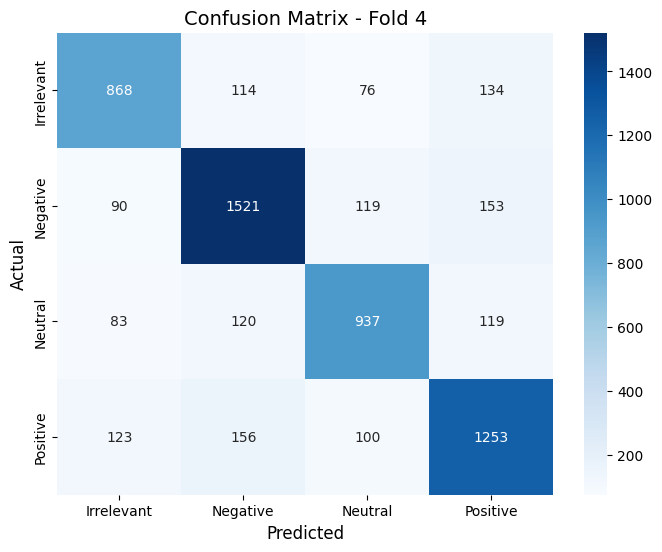

ROC AUC per class for Fold 4: {'Irrelevant': np.float64(0.14995146388575703), 'Negative': np.float64(0.8703794823529656), 'Neutral': np.float64(nan), 'Positive': np.float64(nan)}


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


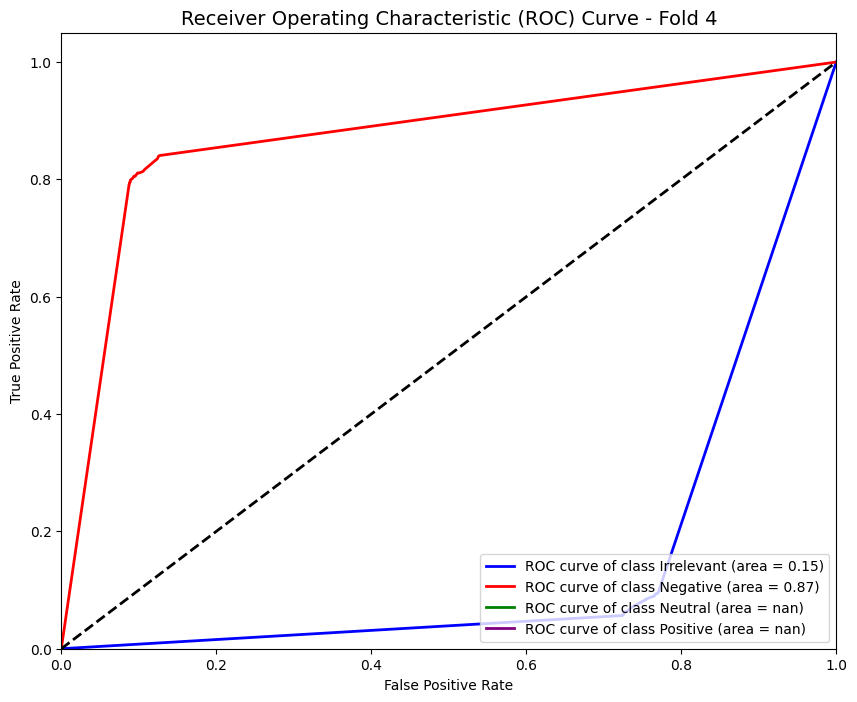


--- Fold 5/5 ---
  Training complete.
Accuracy for Fold 5: 0.7713
Classification Report for Fold 5:
              precision    recall  f1-score   support

  Irrelevant       0.73      0.75      0.74      1263
    Negative       0.80      0.83      0.81      1869
     Neutral       0.77      0.72      0.74      1263
    Positive       0.78      0.76      0.77      1570

    accuracy                           0.77      5965
   macro avg       0.77      0.77      0.77      5965
weighted avg       0.77      0.77      0.77      5965

Confusion Matrix for Fold 5:
[[ 947  110   99  107]
 [ 125 1549   85  110]
 [  91  132  911  129]
 [ 136  152   88 1194]]


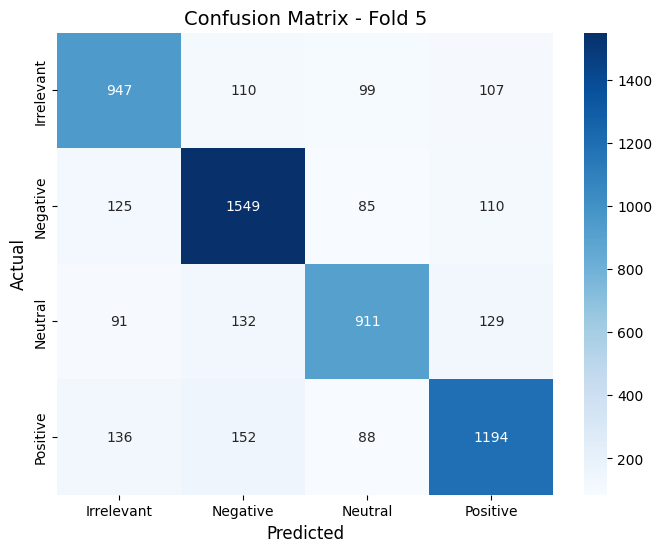

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


ROC AUC per class for Fold 5: {'Irrelevant': np.float64(0.14755930075408014), 'Negative': np.float64(0.8818615402621723), 'Neutral': np.float64(nan), 'Positive': np.float64(nan)}


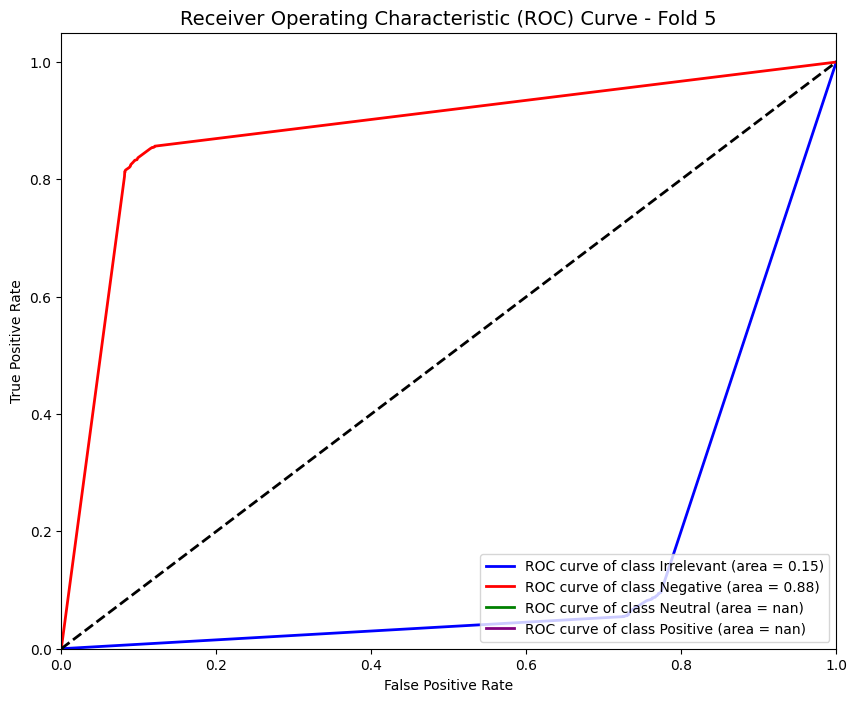


--- Average Metrics Across Folds ---
Average Accuracy: 0.7699
Average ROC AUC per class: {'Irrelevant': np.float64(0.15291902868289178), 'Negative': np.float64(0.8750537938900598), 'Neutral': nan, 'Positive': nan}

Mean Confusion Matrix across folds:
[[ 901  116   89  121]
 [ 116 1541   96  130]
 [  94  116  936  118]
 [ 122  152   98 1214]]


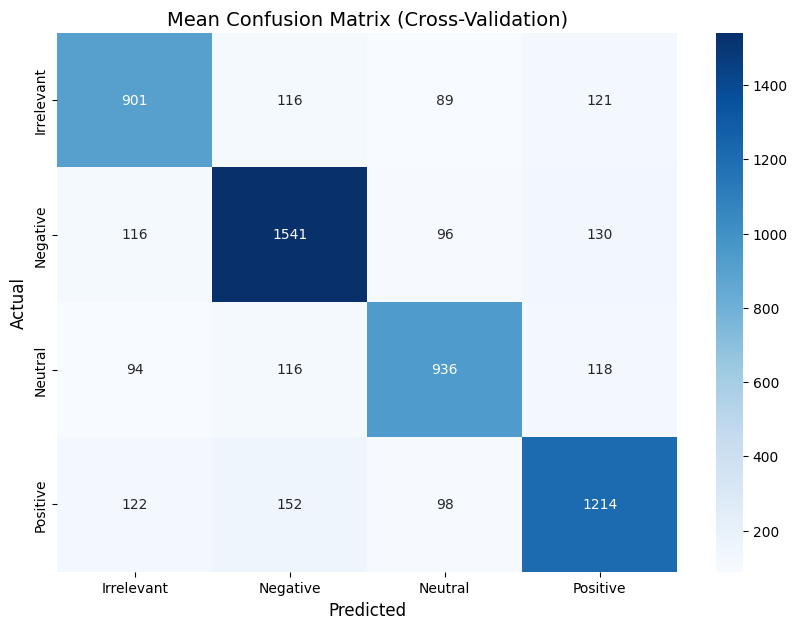

In [21]:
# Decision Tree
# With Cross-validation

from sklearn.model_selection import KFold
from sklearn.base import clone
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # Import seaborn for heatmap
from sklearn.preprocessing import label_binarize # Import label_binarize

# Step 6: Implement 5-Fold Cross-Validation
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# List to store metrics for each fold
accuracy_scores = []
classification_reports = []
confusion_matrices = []
fold_roc_aucs = {i: [] for i in range(len(label_encoder.classes_))} # Store AUCs per class per fold
fold_fprs = {i: [] for i in range(len(label_encoder.classes_))} # Store FPRs per class per fold
fold_tprs = {i: [] for i in range(len(label_encoder.classes_))} # Store TPRs per class per fold


print(f"\nPerforming {n_splits}-Fold Cross-Validation with Decision Tree:")

# Variables to store data for the last fold's ROC plot
last_fold_y_test_binarized = None
last_fold_y_score = None
last_fold_label_encoder_classes = None


# Perform cross-validation
for fold, (train_index, test_index) in enumerate(kf.split(X, y)): # Pass y to kf.split
    print(f"\n--- Fold {fold+1}/{n_splits} ---")
    X_train_fold, X_test_fold = X[train_index], X[test_index]
    # Use standard NumPy indexing for y
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    # Clone the model for each fold to ensure independent training
    clf_fold = clone(clf)

    print("  Training complete.")
    clf_fold.fit(X_train_fold, y_train_fold)


    # Evaluate the model on the current fold's test data
    y_pred_fold = clf_fold.predict(X_test_fold)

    # Store accuracy
    accuracy_fold = accuracy_score(y_test_fold, y_pred_fold)
    accuracy_scores.append(accuracy_fold)
    print(f"Accuracy for Fold {fold+1}: {accuracy_fold:.4f}")

    # Store classification report
    report_fold = classification_report(y_test_fold, y_pred_fold, target_names=label_encoder.classes_)
    classification_reports.append(report_fold)
    print(f"Classification Report for Fold {fold+1}:\n{report_fold}")

    # Store confusion matrix
    cm_fold = confusion_matrix(y_test_fold, y_pred_fold)
    confusion_matrices.append(cm_fold)
    print(f"Confusion Matrix for Fold {fold+1}:\n{cm_fold}")

    # --- Visualize Confusion Matrix for the current fold ---
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_fold, annot=True, fmt='d', cmap='Blues',
                xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_,
                annot_kws={'size': 10}) # Adjust annotation font size
    plt.xlabel('Predicted', fontsize=12) # Adjust xlabel font size
    plt.ylabel('Actual', fontsize=12) # Adjust ylabel font size
    plt.title(f'Confusion Matrix - Fold {fold+1}', fontsize=14) # Adjust title font size
    plt.show()


    # Compute and store ROC AUC for each class (OvR)
    # Binarize the true labels for the current fold
    y_test_binarized_fold = label_binarize(y_test_fold, classes=np.arange(len(label_encoder.classes_)))
    n_classes_fold = y_test_binarized_fold.shape[1]

    y_score_fold = clf_fold.predict_proba(X_test_fold)
    roc_auc_fold = {} # Define roc_auc_fold inside the loop

    # --- Visualize ROC Curve for the current fold ---
    plt.figure(figsize=(10, 8))
    colors = ['blue', 'red', 'green', 'purple'] # Ensure enough colors for all classes


    for i in range(n_classes_fold):
         if i < y_score_fold.shape[1]: # Ensure predicted probabilities are available for this class
             # Check if the class exists in the true labels for this fold
             if np.sum(y_test_binarized_fold[:, i]) > 0:
                 fpr_fold, tpr_fold, _ = roc_curve(y_test_binarized_fold[:, i], y_score_fold[:, i], pos_label=i)
                 auc_fold = auc(fpr_fold, tpr_fold)
                 fold_roc_aucs[i].append(auc_fold)
                 fold_fprs[i].append(fpr_fold) # Store fpr
                 fold_tprs[i].append(tpr_fold) # Store tpr
                 roc_auc_fold[label_encoder.classes_[i]] = auc_fold

                 plt.plot(fpr_fold, tpr_fold, color=colors[i % len(colors)], lw=2,
                          label='ROC curve of class {0} (area = {1:0.2f})'.format(label_encoder.classes_[i], auc_fold))
             else:
                 # Handle cases where a class is not present in the test set of a fold
                 # print(f"  Warning: Class {label_encoder.classes_[i]} not present in fold {fold+1} test set for ROC/AUC.")
                 roc_auc_fold[label_encoder.classes_[i]] = np.nan # Indicate missing AUC
         else:
              roc_auc_fold[label_encoder.classes_[i]] = np.nan # Indicate missing AUC


    print(f"ROC AUC per class for Fold {fold+1}: {roc_auc_fold}")

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) Curve - Fold {fold+1}', fontsize=14)
    plt.legend(loc="lower right")
    plt.show()


# Print average metrics across all folds
print("\n--- Average Metrics Across Folds ---")
print(f"Average Accuracy: {np.mean(accuracy_scores):.4f}")

# Average ROC AUC for each class, ignoring NaNs
avg_roc_auc_per_class = {}
for class_name in label_encoder.classes_:
    class_auc_values = [fold_auc for fold_auc in fold_roc_aucs[label_encoder.classes_.tolist().index(class_name)] if not np.isnan(fold_auc)] # Corrected indexing
    if class_auc_values: # Only compute mean if there are valid AUC values
        avg_roc_auc_per_class[class_name] = np.mean(class_auc_values)
    else:
        avg_roc_auc_per_class[class_name] = np.nan # Indicate no valid AUCs
print(f"Average ROC AUC per class: {avg_roc_auc_per_class}")


# Note: Averaging classification reports and confusion matrices directly can be misleading.
# It's usually better to look at them per fold or compute aggregate versions if needed.

# Optional: Visualize the mean confusion matrix
mean_cm = np.mean(confusion_matrices, axis=0).astype(int)
print("\nMean Confusion Matrix across folds:")
print(mean_cm)

plt.figure(figsize=(10, 7))
sns.heatmap(mean_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_,
            annot_kws={'size': 10}) # Adjust annotation font size
plt.xlabel('Predicted', fontsize=12) # Adjust xlabel font size
plt.ylabel('Actual', fontsize=12) # Adjust ylabel font size
plt.title('Mean Confusion Matrix (Cross-Validation)', fontsize=14) # Adjust title font size
plt.show()

# Note: Removed the plotting of ROC curves from the last fold here as they are already plotted within the loop.

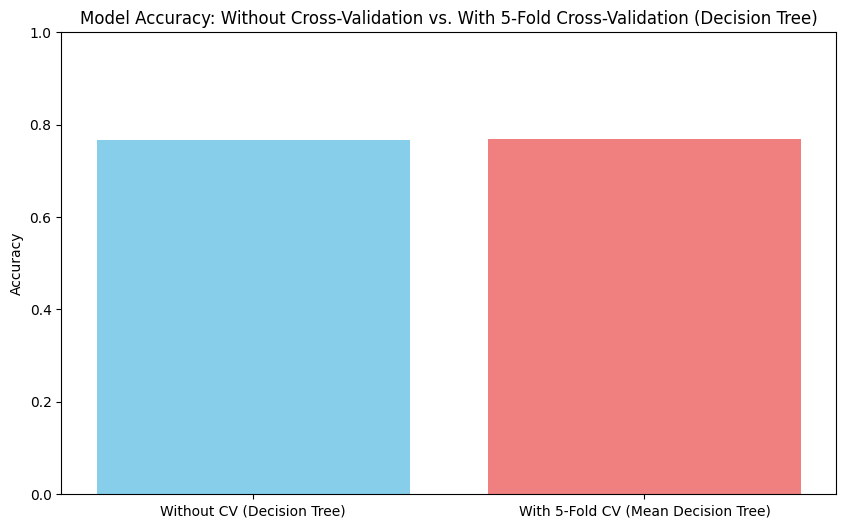

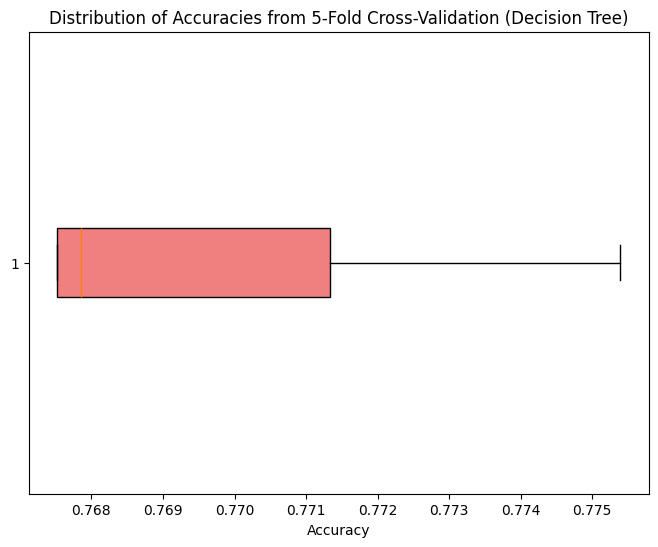

In [22]:
# Visualization of Comparison (Decision Tree)

# Visualize the comparison of Decision Tree results
labels_dt = ['Without CV (Decision Tree)', 'With 5-Fold CV (Mean Decision Tree)']

# Ensure accuracy_dt_nocv is available from cell bZ3snq759AEK or re-calculate
# Assuming cell bZ3snq759AEK has been run and y_test, y_pred are available
accuracy_dt_nocv = accuracy_score(y_test, y_pred)

# Ensure fold_accuracies_dt (or accuracy_scores) is available from cell Z2i5R6IKNDev
# Assuming cell Z2i5R6IKNDev has been run and accuracy_scores is available
accuracies_dt = [accuracy_dt_nocv, np.mean(accuracy_scores)]

# Create a bar plot to compare accuracies
plt.figure(figsize=(10, 6))
plt.bar(labels_dt, accuracies_dt, color=['skyblue', 'lightcoral'])
plt.ylabel('Accuracy')
plt.title('Model Accuracy: Without Cross-Validation vs. With 5-Fold Cross-Validation (Decision Tree)')
plt.ylim([0, 1]) # Set y-axis limits to represent accuracy range
plt.show()

# Visualize the distribution of accuracies from cross-validation for Decision Tree
# Ensure accuracy_scores (or fold_accuracies_dt) is available from cell Z2i5R6IKNDev
plt.figure(figsize=(8, 6))
plt.boxplot(accuracy_scores, vert=False, patch_artist=True, boxprops=dict(facecolor='lightcoral'))
plt.xlabel('Accuracy')
plt.title('Distribution of Accuracies from 5-Fold Cross-Validation (Decision Tree)')
plt.show()


--- Linear Regression Evaluation (Classification Metrics) ---

Classification Report (Linear Regression with Rounding/Clipping):
              precision    recall  f1-score   support

  Irrelevant       0.74      0.46      0.57      1197
    Negative       0.58      0.65      0.61      1888
     Neutral       0.39      0.64      0.48      1273
    Positive       0.81      0.49      0.61      1608

    accuracy                           0.57      5966
   macro avg       0.63      0.56      0.57      5966
weighted avg       0.63      0.57      0.58      5966


Confusion Matrix (Linear Regression with Rounding/Clipping):

[[ 551  460  164   22]
 [ 162 1236  456   34]
 [  22  306  816  129]
 [  14  141  660  793]]


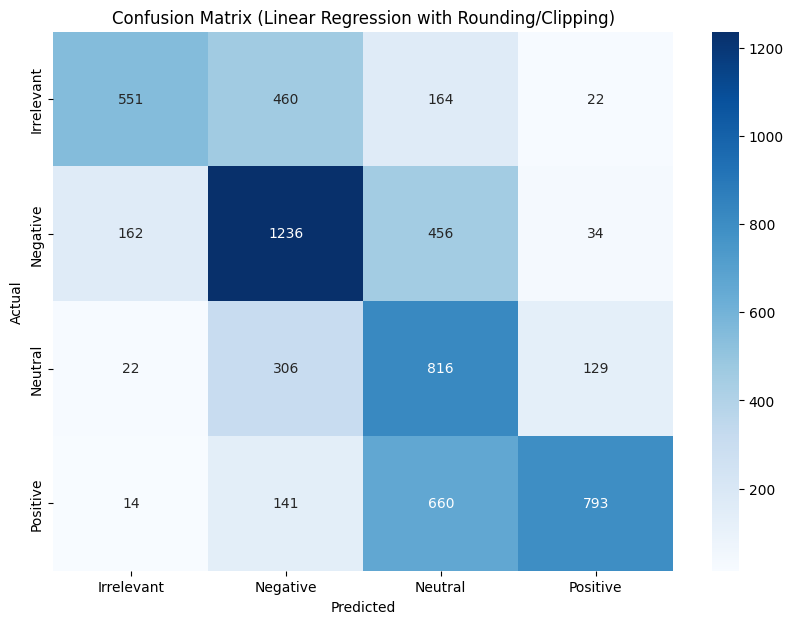


Note: Standard multi-class ROC/AUC is not directly applicable to the continuous output
of a single Linear Regression model used for classification without further processing.
Methods like training OvR models are needed for a proper ROC/AUC analysis.


In [23]:
# Linear Regression
# Without Cross-validation

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 7: Train Linear Regression Model (for demonstration, although the task is classification)
# We'll use the already split data X_train, X_test, y_train, y_test

lr_model = LinearRegression()

# Train the model
lr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lr = lr_model.predict(X_test)

# Evaluation for Linear Regression (typically regression metrics)

y_pred_lr_classified = np.round(y_pred_lr).astype(int)

# Clip predictions to the valid range of encoded labels (0, 1, 2, 3)
y_pred_lr_classified = np.clip(y_pred_lr_classified, 0, len(label_encoder.classes_) - 1)


print("\n--- Linear Regression Evaluation (Classification Metrics) ---")

# Classification Report
print("\nClassification Report (Linear Regression with Rounding/Clipping):")
# Handle potential cases where a predicted class is not in the actual test set's classes
unique_true_classes = np.unique(y_test)
unique_pred_classes = np.unique(y_pred_lr_classified)
target_names_subset = label_encoder.classes_[np.sort(np.unique(np.concatenate((unique_true_classes, unique_pred_classes))))]

# Ensure all classes are represented in the target_names
all_possible_target_names = label_encoder.classes_


print(classification_report(y_test, y_pred_lr_classified, target_names=all_possible_target_names, zero_division=0))

# Confusion Matrix
print("\nConfusion Matrix (Linear Regression with Rounding/Clipping):\n")
cm_lr = confusion_matrix(y_test, y_pred_lr_classified)
print(cm_lr)

# Confusion Matrix Visualization
plt.figure(figsize=(10, 7))
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues",
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Linear Regression with Rounding/Clipping)")
plt.show()

print("\nNote: Standard multi-class ROC/AUC is not directly applicable to the continuous output")
print("of a single Linear Regression model used for classification without further processing.")
print("Methods like training OvR models are needed for a proper ROC/AUC analysis.")



Performing 5-Fold Cross-Validation with Linear Regression:
✅Fold 1/5
  Training complete.
  R-squared for Fold 1: 0.4713
  ROC AUC per class for Fold 1: {'Irrelevant': np.float64(0.8325734129830763), 'Negative': np.float64(0.7948501311294172), 'Neutral': np.float64(0.7541957577840274), 'Positive': np.float64(0.8734414920578384)}
------------------------------
✅Fold 2/5
  Training complete.
  R-squared for Fold 2: 0.4568
  ROC AUC per class for Fold 2: {'Irrelevant': np.float64(0.83975893374684), 'Negative': np.float64(0.7888234044155343), 'Neutral': np.float64(0.7544961238720823), 'Positive': np.float64(0.8721515761769746)}
------------------------------
✅Fold 3/5
  Training complete.
  R-squared for Fold 3: 0.4550
  ROC AUC per class for Fold 3: {'Irrelevant': np.float64(0.8309874039361603), 'Negative': np.float64(0.7931864821059785), 'Neutral': np.float64(0.7400873664807012), 'Positive': np.float64(0.8685023963223717)}
------------------------------
✅Fold 4/5
  Training complete.
  

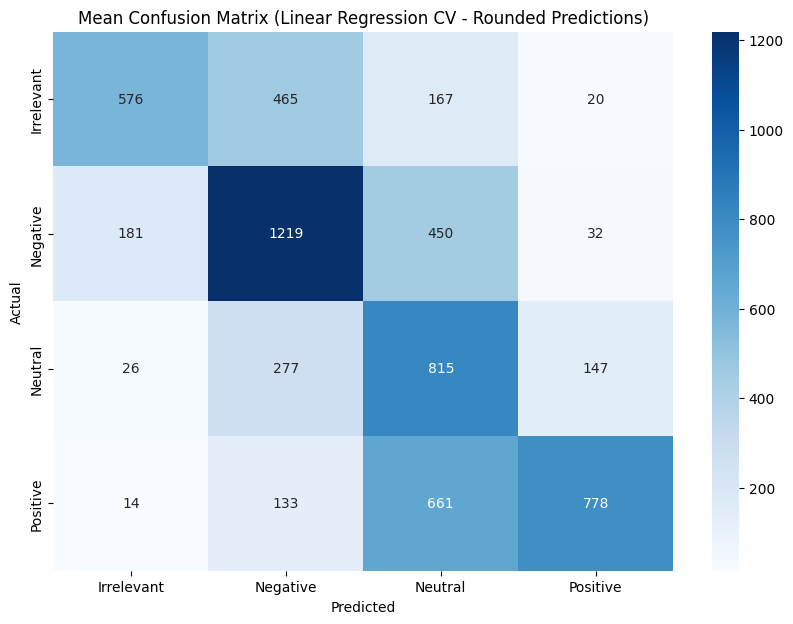

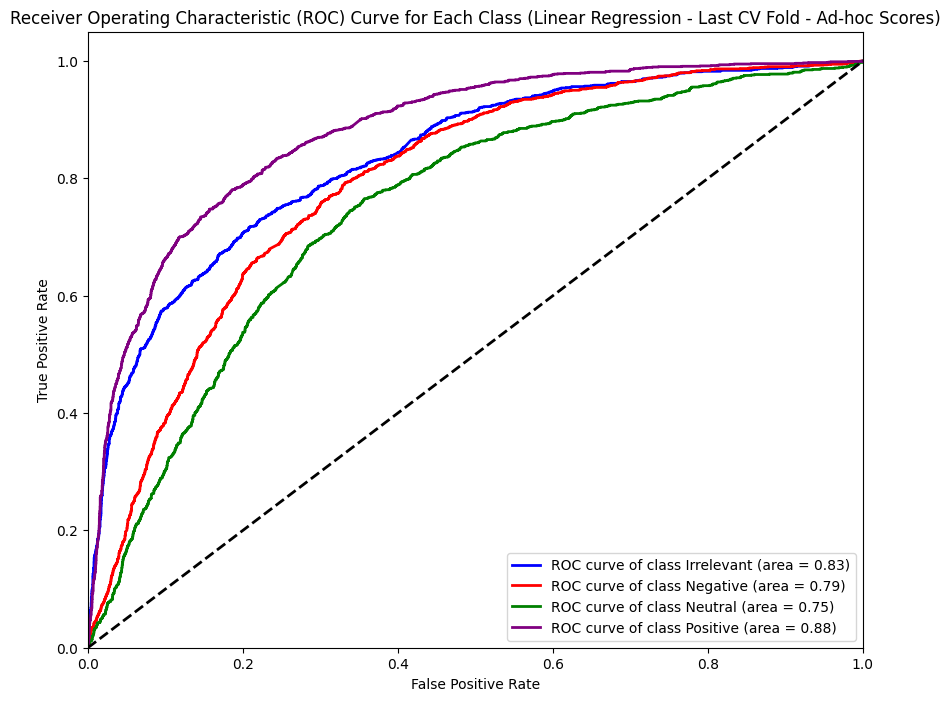

In [24]:
# Linear Regression
# With Cross Validation

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (
    mean_squared_error,
    r2_score,
    roc_curve,
    auc,
    classification_report,
    confusion_matrix,
)
from sklearn.model_selection import KFold
import numpy as np
import seaborn as sns
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Assuming X, y, and label_encoder are already defined from previous cells (e.g., bKc9X6iL8qdT)

# Step 6: Implement 5-Fold Cross-Validation with Linear Regression

# Define the number of folds
n_splits_lr_cv = 5  # Using 5-Fold

# Initialize KFold cross-validation
kf_lr_cv = KFold(n_splits=n_splits_lr_cv, shuffle=True, random_state=42)

fold_r2_scores_lr_cv = []  # Store R-squared scores for each fold
fold_cms_lr_cv = []  # Store confusion matrices for each fold
fold_roc_aucs_lr_cv = {i: [] for i in range(len(label_encoder.classes_))} # Store AUCs per class per fold

print(f"\nPerforming {n_splits_lr_cv}-Fold Cross-Validation with Linear Regression:")

# Variables to store data for the last fold's ROC plot
last_fold_y_test_binarized_lr_cv = None
last_fold_y_score_lr_cv = None
last_fold_label_encoder_classes_lr_cv = label_encoder.classes_


# Iterate through each fold
for fold, (train_index, test_index) in enumerate(kf_lr_cv.split(X, y)):
    print(f"✅Fold {fold+1}/{n_splits_lr_cv}")

    # Split data for the current fold
    X_train_fold_lr_cv, X_test_fold_lr_cv = X[train_index], X[test_index]
    # Use standard NumPy indexing for y
    y_train_fold_lr_cv, y_test_fold_lr_cv = y.iloc[train_index], y.iloc[test_index]

    # Initialize a new Linear Regression model for each fold
    reg_fold_lr_cv = LinearRegression()

    # Fit the model
    # Note: Linear Regression is not an iterative algorithm that uses 'epochs'.
    # Training involves a single step to find coefficients.
    print("  Training complete.")
    reg_fold_lr_cv.fit(X_train_fold_lr_cv, y_train_fold_lr_cv)

    # Evaluate the model on the test data for the current fold using R-squared
    y_pred_fold_reg_lr_cv = reg_fold_lr_cv.predict(X_test_fold_lr_cv)
    fold_r2_lr_cv = r2_score(y_test_fold_lr_cv, y_pred_fold_reg_lr_cv)
    print(f"  R-squared for Fold {fold+1}: {fold_r2_lr_cv:.4f}")
    fold_r2_scores_lr_cv.append(fold_r2_lr_cv)

    # Classification Metrics for the fold (requires rounding/clipping predictions)
    # Note: This is an ad-hoc approach for using a regression model for classification evaluation.
    y_pred_fold_classes_lr_cv = np.round(y_pred_fold_reg_lr_cv).astype(int)
    y_pred_fold_classes_lr_cv = np.clip(y_pred_fold_classes_lr_cv, 0, len(label_encoder.classes_) - 1)

    # Compute Confusion Matrix for the fold
    cm_fold_lr_cv = confusion_matrix(y_test_fold_lr_cv, y_pred_fold_classes_lr_cv, labels=np.arange(len(label_encoder.classes_)))
    fold_cms_lr_cv.append(cm_fold_lr_cv)

    # Compute ROC and AUC for the fold (using ad-hoc scores)
    # Note: Generating ROC/AUC for Linear Regression this way is unconventional.
    y_test_binarized_fold_lr_cv = label_binarize(y_test_fold_lr_cv, classes=np.arange(len(label_encoder.classes_)))
    y_score_fold_reg_lr_cv = y_pred_fold_reg_lr_cv # Use raw predictions as scores (ad-hoc)

    roc_auc_fold_lr_cv = {}
    for i in range(len(label_encoder.classes_)):
         epsilon = 1e-6 # Small value to prevent division by zero
         scores_for_class_i_fold_lr_cv = 1 / (np.abs(y_score_fold_reg_lr_cv - i) + epsilon)
         try:
             if np.sum(y_test_binarized_fold_lr_cv[:, i]) > 0: # Ensure class is in test set
                 fpr_fold_lr_cv, tpr_fold_lr_cv, _ = roc_curve(y_test_binarized_fold_lr_cv[:, i], scores_for_class_i_fold_lr_cv)
                 auc_fold_lr_cv = auc(fpr_fold_lr_cv, tpr_fold_lr_cv)
                 fold_roc_aucs_lr_cv[i].append(auc_fold_lr_cv)
                 roc_auc_fold_lr_cv[label_encoder.classes_[i]] = auc_fold_lr_cv
             else:
                  roc_auc_fold_lr_cv[label_encoder.classes_[i]] = np.nan # Indicate missing AUC
         except ValueError as e:
              print(f"  Error computing ROC/AUC for class {label_encoder.classes_[i]} in fold {fold+1}: {e}")
              roc_auc_fold_lr_cv[label_encoder.classes_[i]] = np.nan

    print(f"  ROC AUC per class for Fold {fold+1}: {roc_auc_fold_lr_cv}")

    # Store data for the last fold's ROC plot
    if fold == n_splits_lr_cv - 1:
        last_fold_y_test_binarized_lr_cv = y_test_binarized_fold_lr_cv
        last_fold_y_score_lr_cv = y_score_fold_reg_lr_cv

    print("-" * 30) # Add a separator line after each fold

# Print the results of cross-validation
print("\n--- Average Metrics Across Folds (Linear Regression CV) ---") # Added header
print(f"Mean cross-validation R-squared: {np.mean(fold_r2_scores_lr_cv):.4f}")
print(f"Standard deviation of cross-validation R-squared: {np.std(fold_r2_scores_lr_cv):.4f}")

# Average Classification Metrics (based on rounded predictions)
# Averaging classification reports and confusion matrices directly can be misleading.
# We'll show the mean confusion matrix.

mean_cm_lr_cv = np.mean(fold_cms_lr_cv, axis=0).astype(int)
print("\nMean Confusion Matrix across folds (Linear Regression - Rounded Predictions):")
print(mean_cm_lr_cv)

# Print mean AUC for each class
print("\nMean Cross-validation AUC per class (Linear Regression - Ad-hoc Scores):")
avg_roc_auc_per_class_lr_cv = {}
for i in range(len(label_encoder.classes_)):
    class_auc_values = [auc for auc in fold_roc_aucs_lr_cv[i] if not np.isnan(auc)]
    if class_auc_values:
        avg_roc_auc_per_class_lr_cv[label_encoder.classes_[i]] = np.mean(class_auc_values)
        print(f"  Class {label_encoder.classes_[i]} (Area = {avg_roc_auc_per_class_lr_cv[label_encoder.classes_[i]]:0.2f})")
    else:
        avg_roc_auc_per_class_lr_cv[label_encoder.classes_[i]] = np.nan
        print(f"  Class {label_encoder.classes_[i]}: No valid AUC computed across folds")


# Visualizations (Mean Confusion Matrix and ROC curves from one fold as representative)

plt.figure(figsize=(10, 7))
sns.heatmap(mean_cm_lr_cv, annot=True, fmt="d", cmap="Blues",
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Mean Confusion Matrix (Linear Regression CV - Rounded Predictions)")
plt.show()

# Plotting ROC curves from the last fold for visualization (as a representative example)
if last_fold_y_test_binarized_lr_cv is not None and last_fold_y_score_lr_cv is not None:
    try:
        y_test_binarized_last_fold = last_fold_y_test_binarized_lr_cv
        y_score_last_fold_reg = last_fold_y_score_lr_cv
        last_fold_label_encoder_classes = label_encoder.classes_ # Use the global label_encoder

        fpr_last_fold_lr = dict()
        tpr_last_fold_lr = dict()
        roc_auc_last_fold_lr = dict()

        plt.figure(figsize=(10, 8))
        colors = ['blue', 'red', 'green', 'purple']
        n_classes_lr = len(label_encoder.classes_)

        for i in range(n_classes_lr):
            epsilon = 1e-6
            # Use the ad-hoc scoring method based on inverse distance to class label
            scores_for_class_i_last_fold = 1 / (np.abs(y_score_last_fold_reg - i) + epsilon)

            if np.sum(y_test_binarized_last_fold[:, i]) > 0: # Ensure class is in test set
                fpr_last_fold_lr[i], tpr_last_fold_lr[i], _ = roc_curve(y_test_binarized_last_fold[:, i], scores_for_class_i_last_fold)
                roc_auc_last_fold_lr[i] = auc(fpr_last_fold_lr[i], tpr_last_fold_lr[i])
                plt.plot(fpr_last_fold_lr[i], tpr_last_fold_lr[i], color=colors[i % len(colors)], lw=2,
                         label='ROC curve of class {0} (area = {1:.2f})'.format(last_fold_label_encoder_classes[i], roc_auc_last_fold_lr[i]))
            else:
                print(f"  Warning: Class {label_encoder.classes_[i]} not present in the last fold test set for ROC/AUC plotting.")


        plt.plot([0, 1], [0, 1], 'k--', lw=2)
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC) Curve for Each Class (Linear Regression - Last CV Fold - Ad-hoc Scores)')
        plt.legend(loc="lower right")
        plt.show()
    except Exception as e:
        print(f"\nError plotting ROC curves for the last CV fold: {e}")
else:
    print("\nCould not plot ROC curves for the last CV fold (data not available).")

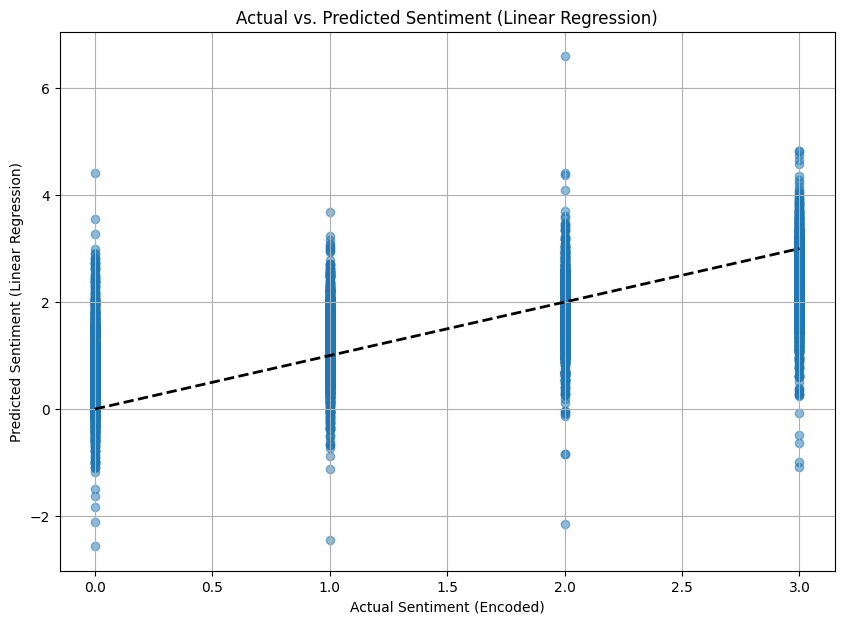

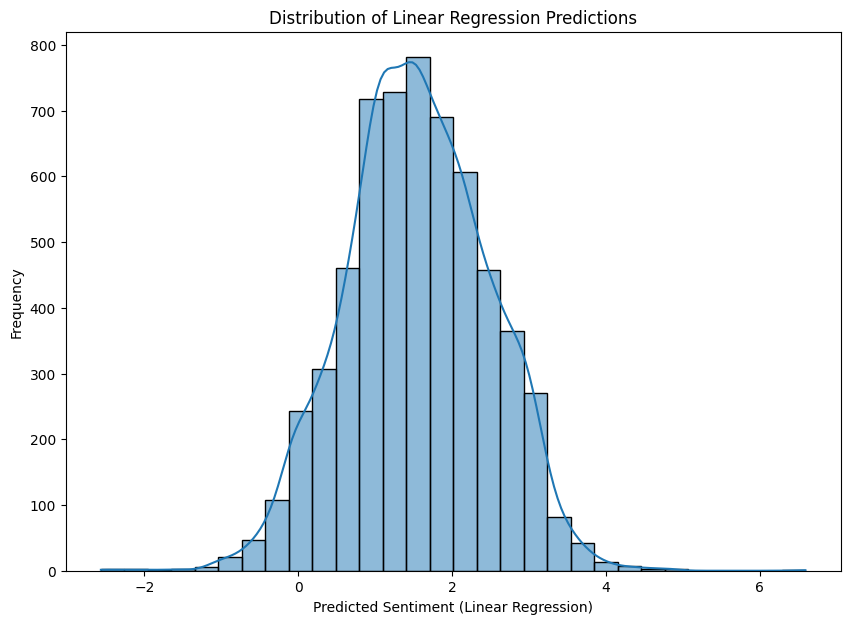

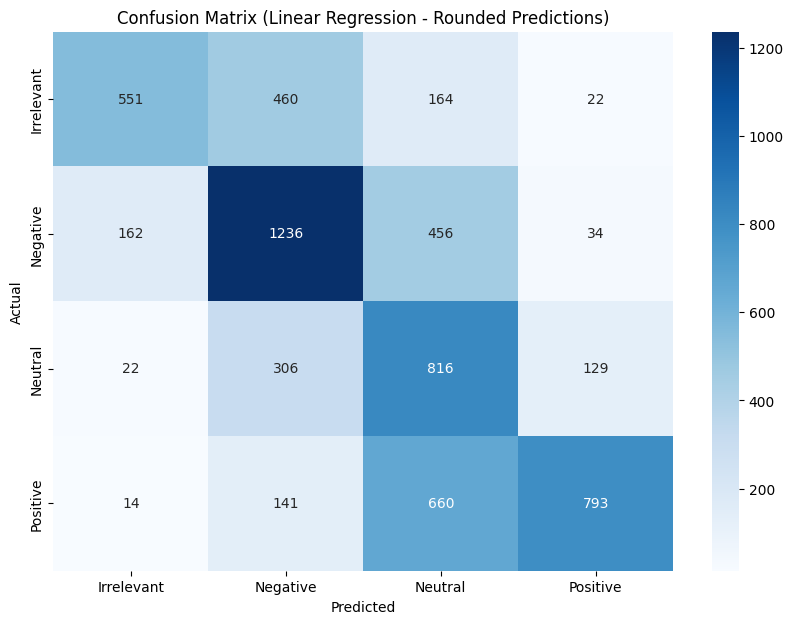

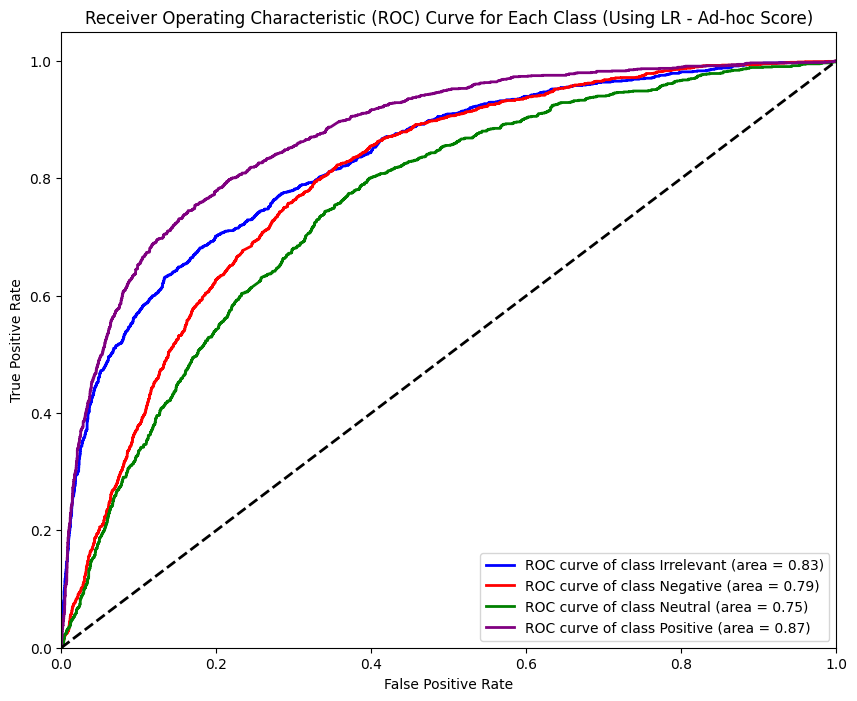

In [25]:
# Visualization of Comparison (Linear Regression)

# Visualize Linear Regression predictions vs true values (Regression context)
# This is more meaningful in a true regression task, but can show how predictions spread
plt.figure(figsize=(10, 7))
plt.scatter(y_test, y_pred_lr, alpha=0.5)
plt.xlabel("Actual Sentiment (Encoded)")
plt.ylabel("Predicted Sentiment (Linear Regression)")
plt.title("Actual vs. Predicted Sentiment (Linear Regression)")
# Plot a line of perfect prediction
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.grid(True)
plt.show()


# Visualize the distribution of Linear Regression predictions
plt.figure(figsize=(10, 7))
sns.histplot(y_pred_lr, kde=True, bins=30)
plt.xlabel("Predicted Sentiment (Linear Regression)")
plt.ylabel("Frequency")
plt.title("Distribution of Linear Regression Predictions")
plt.show()


# Visualize the Confusion Matrix (derived from rounded/clipping predictions)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues",
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Linear Regression - Rounded Predictions)")
plt.show()

# ROC Curve visualization (as computed using the ad-hoc score method)
# Re-plot the ROC curves for Linear Regression if the previous code block was executed
plt.figure(figsize=(10, 8))
colors = [
    "blue",
    "red",
    "green",
    "purple",
]  # Adjust colors based on number of classes
n_classes = len(label_encoder.classes_)

# Compute ROC curve and ROC area for each class (without cross-validation)
# Use the y_test_binarized_dt from cell 7pyA4mC_nNq2 and y_score_lr from cell rqhEAAkhT2Jd
# Compute ROC curve and AUC for each class (using ad-hoc scores)
# Note: Generating ROC/AUC for Linear Regression this way is unconventional.
y_test_binarized = label_binarize(y_test, classes=np.arange(len(label_encoder.classes_)))
y_score = y_pred_lr # Use raw predictions as scores (ad-hoc)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
     epsilon = 1e-6 # Small value to prevent division by zero
     scores_for_class_i = 1 / (np.abs(y_score - i) + epsilon)
     try:
         if np.sum(y_test_binarized[:, i]) > 0: # Ensure class is in test set
             fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], scores_for_class_i)
             roc_auc[i] = auc(fpr[i], tpr[i])
         else:
              roc_auc[i] = np.nan # Indicate missing AUC
     except ValueError as e:
          print(f"  Error computing ROC/AUC for class {label_encoder.classes_[i]}: {e}")
          roc_auc[i] = np.nan


for i, color in zip(range(n_classes), colors):
  # Ensure the class exists in the test set and ROC was computed
  if i in fpr and i in tpr and i < len(label_encoder.classes_):
    plt.plot(
        fpr[i],
        tpr[i], # Corrected from tpl[i] to tpr[i]
        color=color,
        lw=2,
        label="ROC curve of class {0} (area = {1:0.2f})".format(
            label_encoder.classes_[i], roc_auc[i]
        ),
    )

plt.plot([0, 1], [0, 1], "k--", lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Each Class (Using LR - Ad-hoc Score)')
plt.legend(loc="lower right")
plt.show()

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



Classification Report (Logistic Regression):
              precision    recall  f1-score   support

  Irrelevant       0.78      0.65      0.71      1197
    Negative       0.75      0.88      0.81      1888
     Neutral       0.76      0.64      0.70      1273
    Positive       0.73      0.76      0.75      1608

    accuracy                           0.75      5966
   macro avg       0.75      0.73      0.74      5966
weighted avg       0.75      0.75      0.75      5966


Confusion Matrix (Logistic Regression):


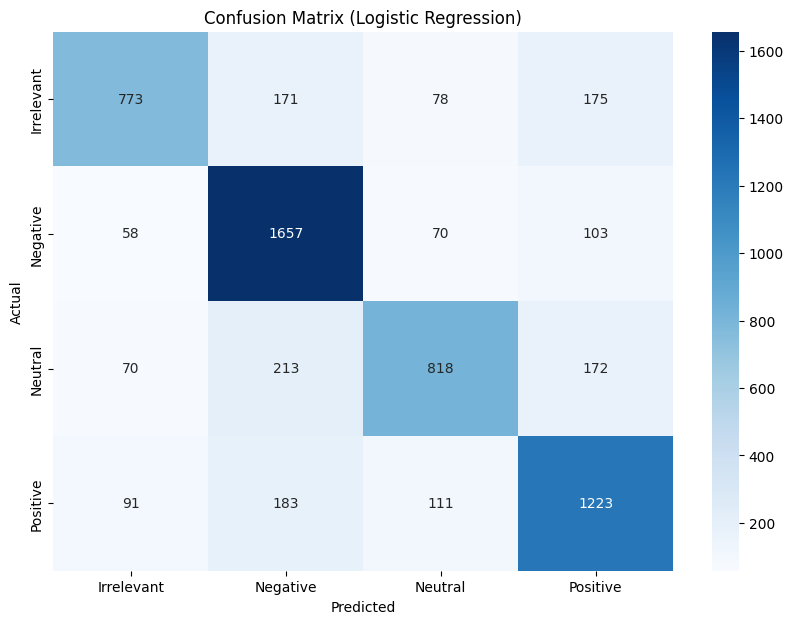

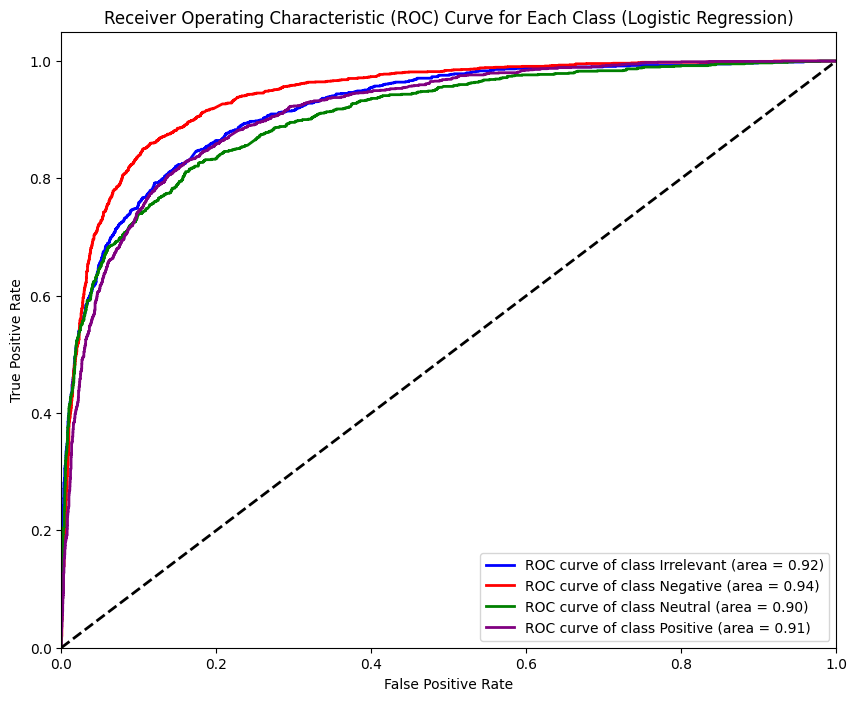

In [26]:
# Logistic Regression
# Without cross validation

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Step 5: Train Logistic Regression and evaluate
# Initialize a Logistic Regression model
# Use multi_class='ovr' for multi-class problems with ROC/AUC or 'auto'
log_reg = LogisticRegression(multi_class='auto', solver='liblinear', random_state=42)
log_reg.fit(X_train, y_train)

# Make predictions
y_pred_log_reg = log_reg.predict(X_test)

# Classification Report and Confusion Matrix (without cross-validation)
print("\nClassification Report (Logistic Regression):")
print(classification_report(y_test, y_pred_log_reg, target_names=label_encoder.classes_))

print("\nConfusion Matrix (Logistic Regression):")
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)

plt.figure(figsize=(10, 7))
sns.heatmap(
    cm_log_reg,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=label_encoder.classes_,
    yticklabels=label_encoder.classes_,
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Logistic Regression)")
plt.show()

# Compute ROC curve and ROC area for each class (without cross-validation)

# Binarize the output
y_test_binarized = label_binarize(y_test, classes=np.arange(len(label_encoder.classes_)))
n_classes = y_test_binarized.shape[1]

# Get predicted probabilities (required for ROC curve)
y_score_log_reg = log_reg.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
# Use distinct variable names to avoid overwriting
fpr_log_reg_dict = dict()
tpr_log_reg_dict = dict()
roc_auc_log_reg_dict = dict()
for i in range(n_classes):
    fpr_log_reg_dict[i], tpr_log_reg_dict[i], _ = roc_curve(y_test_binarized[:, i], y_score_log_reg[:, i])
    roc_auc_log_reg_dict[i] = auc(fpr_log_reg_dict[i], tpr_log_reg_dict[i])

# Plot ROC curves for each class
plt.figure(figsize=(10, 8))
colors = ['blue', 'red', 'green', 'purple'] # Adjust colors based on number of classes
for i, color in zip(range(n_classes), colors):
    # Ensure the class exists
    if i < len(label_encoder.classes_):
        plt.plot(
            fpr_log_reg_dict[i],
            tpr_log_reg_dict[i],
            color=color,
            lw=2,
            label='ROC curve of class {0} (area = {1:0.2f})'.format(label_encoder.classes_[i], roc_auc_log_reg_dict[i]),
        )

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Each Class (Logistic Regression)')
plt.legend(loc="lower right")
plt.show()


Performing 5-Fold Cross-Validation with Logistic Regression:

===== Fold 1/5 =====
  Training complete.


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


  Accuracy for Fold 1: 0.7492

  Classification Report - Fold 1:
              precision    recall  f1-score   support

  Irrelevant       0.78      0.64      0.71      1197
    Negative       0.75      0.88      0.81      1888
     Neutral       0.76      0.64      0.70      1273
    Positive       0.73      0.76      0.75      1608

    accuracy                           0.75      5966
   macro avg       0.75      0.73      0.74      5966
weighted avg       0.75      0.75      0.75      5966


  Confusion Matrix - Fold 1:
[[ 772  171   79  175]
 [  58 1657   70  103]
 [  70  213  818  172]
 [  91  183  111 1223]]


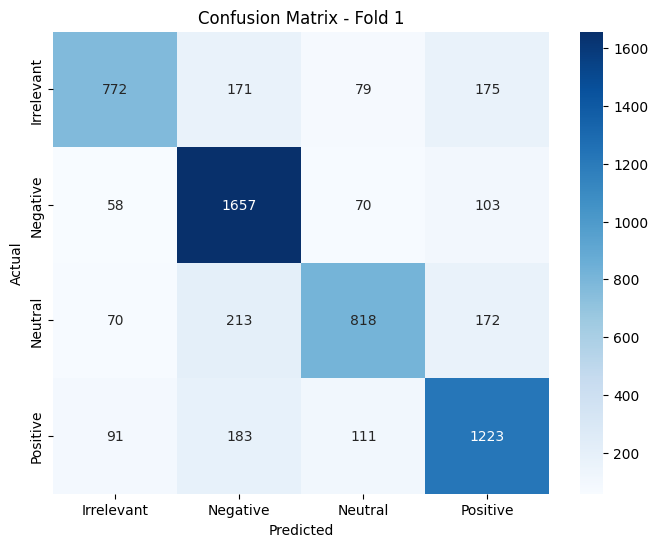

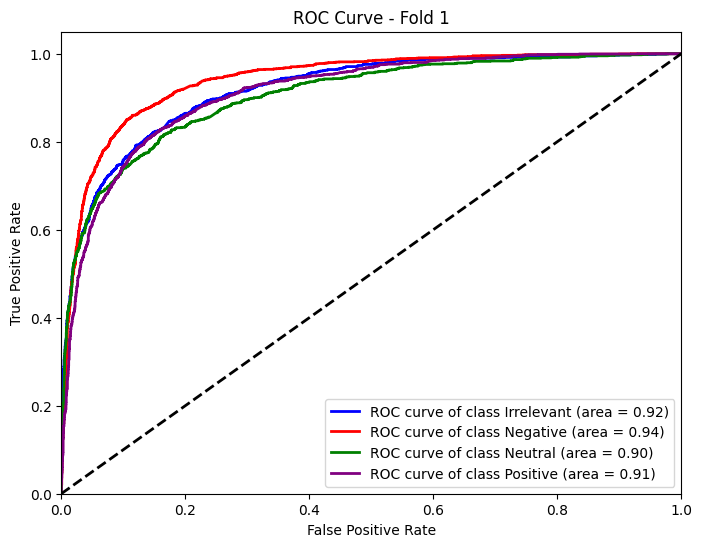


===== Fold 2/5 =====
  Training complete.


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


  Accuracy for Fold 2: 0.7451

  Classification Report - Fold 2:
              precision    recall  f1-score   support

  Irrelevant       0.78      0.66      0.72      1267
    Negative       0.75      0.85      0.80      1914
     Neutral       0.76      0.64      0.69      1238
    Positive       0.71      0.76      0.73      1547

    accuracy                           0.75      5966
   macro avg       0.75      0.73      0.74      5966
weighted avg       0.75      0.75      0.74      5966


  Confusion Matrix - Fold 2:
[[ 842  171   81  173]
 [  72 1634   83  125]
 [  73  186  790  189]
 [  90  186   92 1179]]


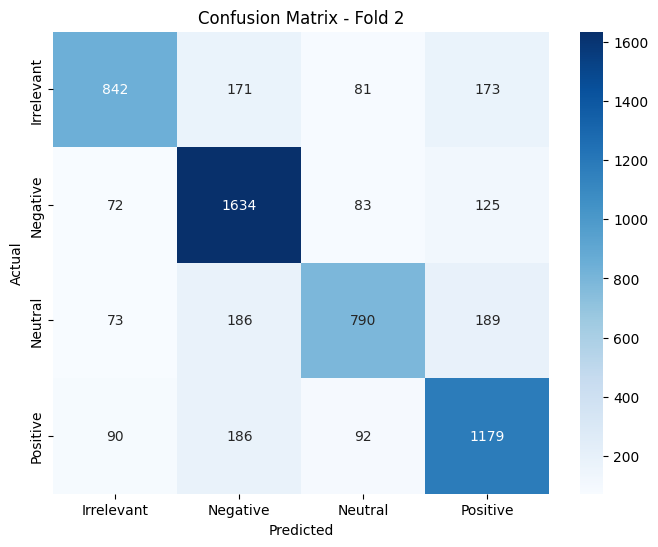

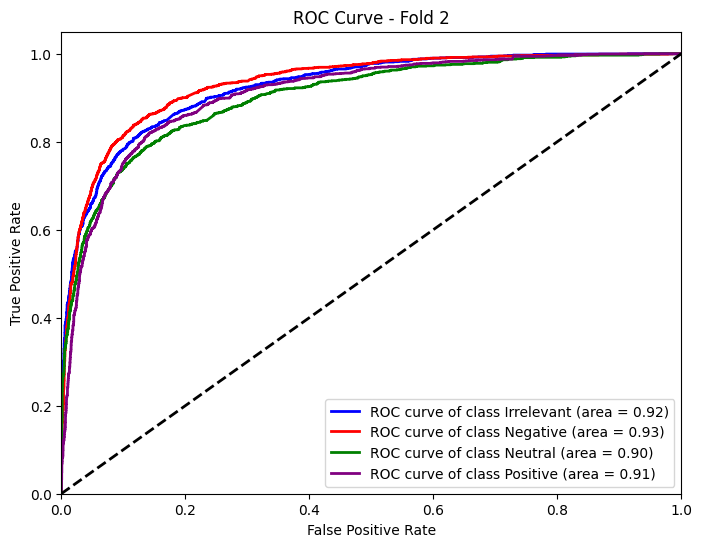


===== Fold 3/5 =====
  Training complete.


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


  Accuracy for Fold 3: 0.7407

  Classification Report - Fold 3:
              precision    recall  f1-score   support

  Irrelevant       0.77      0.65      0.71      1227
    Negative       0.74      0.86      0.80      1866
     Neutral       0.78      0.62      0.69      1294
    Positive       0.70      0.76      0.73      1579

    accuracy                           0.74      5966
   macro avg       0.75      0.72      0.73      5966
weighted avg       0.74      0.74      0.74      5966


  Confusion Matrix - Fold 3:
[[ 802  169   75  181]
 [  52 1614   61  139]
 [  88  208  797  201]
 [  97  188   88 1206]]


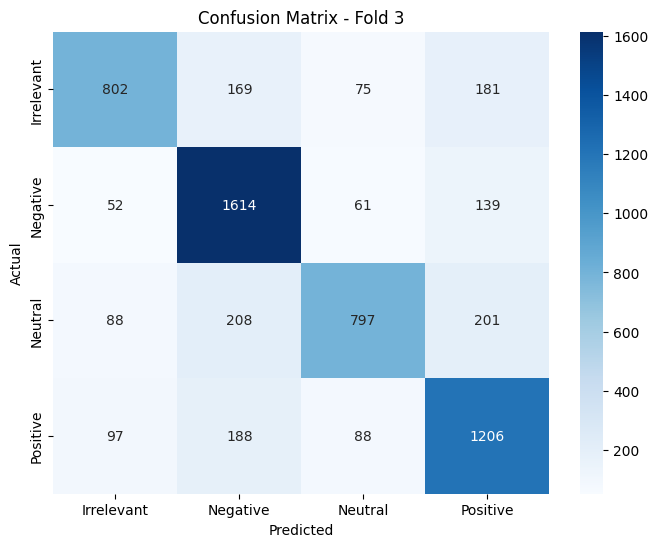

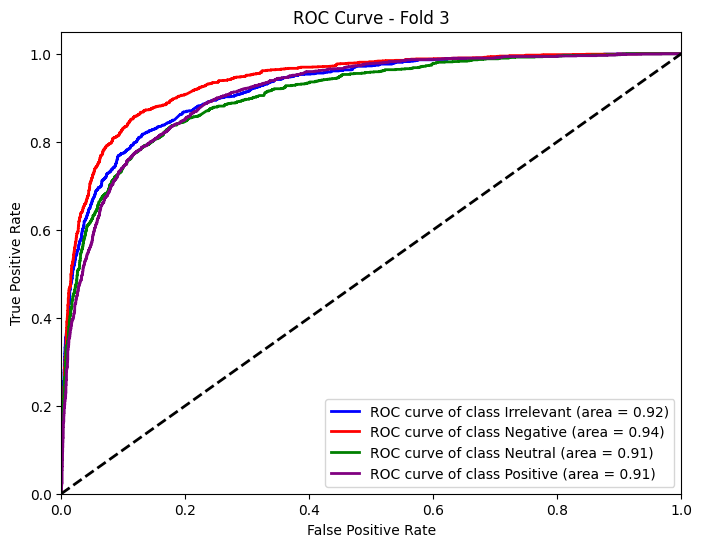


===== Fold 4/5 =====
  Training complete.


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


  Accuracy for Fold 4: 0.7489

  Classification Report - Fold 4:
              precision    recall  f1-score   support

  Irrelevant       0.76      0.66      0.71      1192
    Negative       0.75      0.87      0.80      1883
     Neutral       0.77      0.63      0.69      1259
    Positive       0.73      0.76      0.75      1632

    accuracy                           0.75      5966
   macro avg       0.75      0.73      0.74      5966
weighted avg       0.75      0.75      0.75      5966


  Confusion Matrix - Fold 4:
[[ 786  182   66  158]
 [  57 1638   65  123]
 [ 102  191  796  170]
 [  92  186  106 1248]]


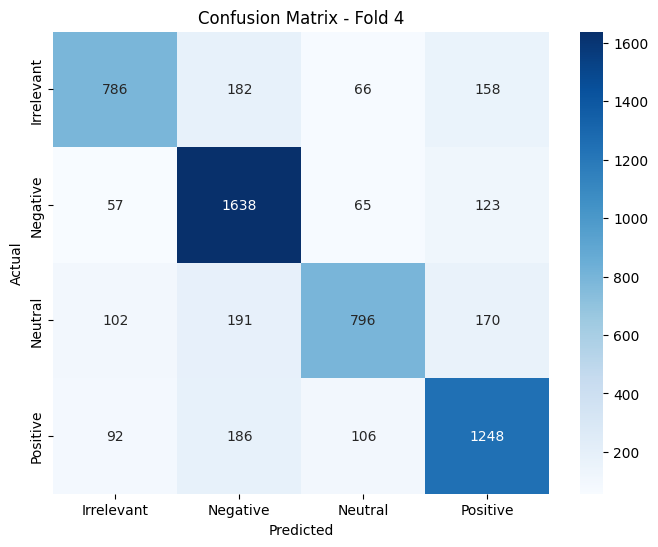

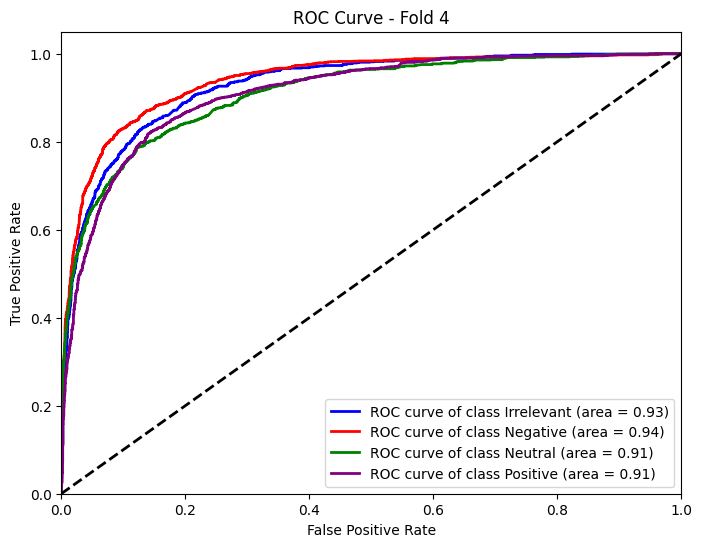


===== Fold 5/5 =====
  Training complete.


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


  Accuracy for Fold 5: 0.7365

  Classification Report - Fold 5:
              precision    recall  f1-score   support

  Irrelevant       0.78      0.65      0.71      1263
    Negative       0.72      0.87      0.79      1869
     Neutral       0.77      0.60      0.68      1263
    Positive       0.71      0.76      0.73      1570

    accuracy                           0.74      5965
   macro avg       0.74      0.72      0.73      5965
weighted avg       0.74      0.74      0.73      5965


  Confusion Matrix - Fold 5:
[[ 815  187   76  185]
 [  49 1618   78  124]
 [  86  228  764  185]
 [  94  202   78 1196]]


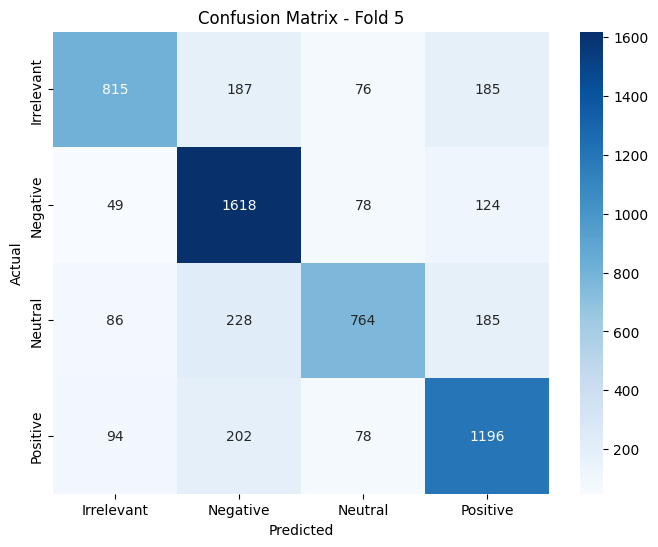

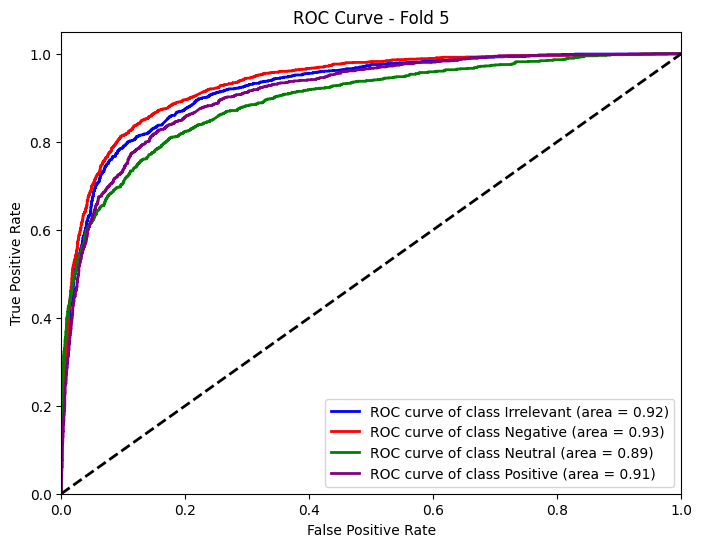


--- Average Metrics Across Folds (Logistic Regression) ---
Mean cross-validation accuracy: 0.7441
Standard deviation of cross-validation accuracies: 0.0049

Mean Confusion Matrix across folds (Logistic Regression):
[[ 803  176   75  174]
 [  57 1632   71  122]
 [  83  205  793  183]
 [  92  189   95 1210]]

Mean Cross-validation AUC per class (Logistic Regression):
  Class Irrelevant (Area = 0.92)
  Class Negative (Area = 0.94)
  Class Neutral (Area = 0.90)
  Class Positive (Area = 0.91)


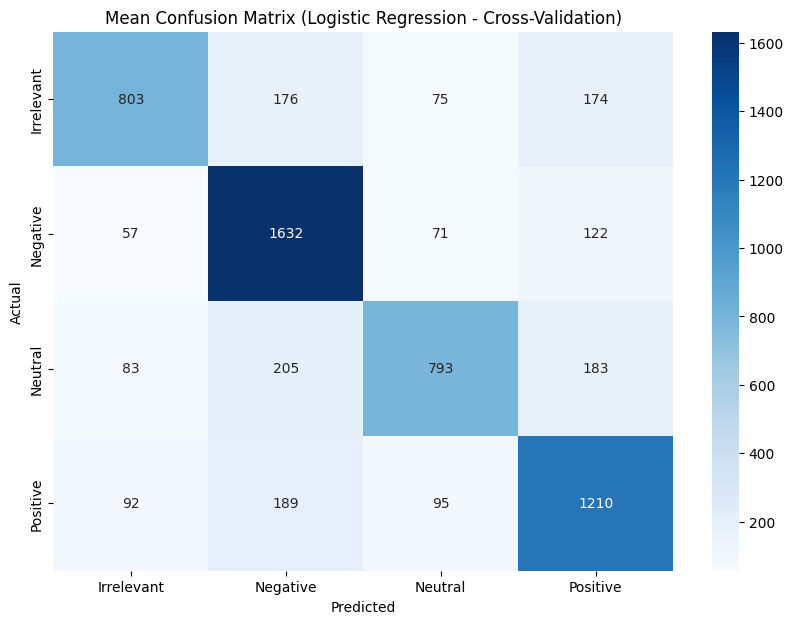

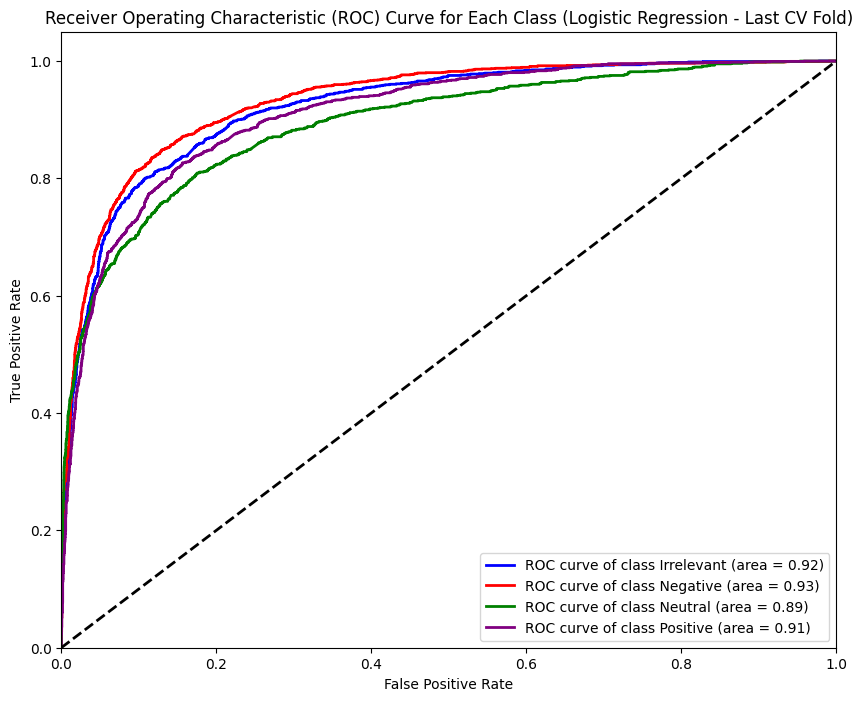

In [27]:
# Logistic Regression
# With cross validation

from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression # Correctly import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, accuracy_score # Import accuracy_score
from sklearn.preprocessing import LabelEncoder, label_binarize
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.base import clone # Import clone

# 5-Fold Cross Validation
n_splits_log_reg = 5 # Using 5-Fold
kf_log_reg = KFold(n_splits=n_splits_log_reg, shuffle=True, random_state=42)

# Lists to store metrics for each fold
fold_accuracies_log_reg = []
fold_cms_log_reg = []
fold_roc_aucs_log_reg = {i: [] for i in range(len(label_encoder.classes_))} # Store AUCs per class per fold
fold_fprs_log_reg = {i: [] for i in range(len(label_encoder.classes_))} # Store FPRs per class per fold
fold_tprs_log_reg = {i: [] for i in range(len(label_encoder.classes_))} # Store TPRs per class per fold


print(f"\nPerforming {n_splits_log_reg}-Fold Cross-Validation with Logistic Regression:")

# Variables to store data for the last fold's ROC plot
last_fold_y_test_binarized_log_reg = None
last_fold_y_score_log_reg = None
last_fold_label_encoder_classes_log_reg = label_encoder.classes_

for fold, (train_idx, test_idx) in enumerate(kf_log_reg.split(X, y)): # Use X and y
    print(f"\n===== Fold {fold + 1}/{n_splits_log_reg} =====")
    X_train_fold, X_test_fold = X[train_idx], X[test_idx]
    # Use standard NumPy indexing for y
    y_train_fold, y_test_fold = y.iloc[train_idx], y.iloc[test_idx]

    # Initialize a new Logistic Regression model for each fold
    # Use multi_class='auto' for multi-class problems and 'liblinear' or 'lbfgs' solver
    model = LogisticRegression(multi_class='auto', solver='liblinear', random_state=42) # Use 'liblinear' as in previous cell

    # Fit the model for the current fold
    print("  Training complete.")
    model.fit(X_train_fold, y_train_fold)

    # Make predictions on the test data for the current fold
    y_pred_fold = model.predict(X_test_fold)

    # Calculate and store accuracy for the fold
    accuracy_fold = accuracy_score(y_test_fold, y_pred_fold)
    fold_accuracies_log_reg.append(accuracy_fold)
    print(f"  Accuracy for Fold {fold + 1}: {accuracy_fold:.4f}")


    # Show Classification Report for the fold
    print(f"\n  Classification Report - Fold {fold + 1}:")
    print(classification_report(y_test_fold, y_pred_fold, target_names=label_encoder.classes_, zero_division=0))

    # Show Confusion Matrix for the fold
    cm_fold = confusion_matrix(y_test_fold, y_pred_fold)
    fold_cms_log_reg.append(cm_fold)
    print(f"\n  Confusion Matrix - Fold {fold + 1}:\n{cm_fold}")

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_fold, annot=True, fmt="d", cmap="Blues",
                xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.title(f"Confusion Matrix - Fold {fold + 1}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # Compute and show ROC and AUC curve for the fold
    y_test_bin_fold = label_binarize(y_test_fold, classes=np.arange(len(label_encoder.classes_)))
    y_score_fold = model.predict_proba(X_test_fold)

    plt.figure(figsize=(8, 6))
    colors = ['blue', 'red', 'green', 'purple'] # Define colors

    roc_auc_fold = {} # Initialize roc_auc_fold for the current fold
    for i in range(len(label_encoder.classes_)):
        if i < y_test_bin_fold.shape[1] and i < y_score_fold.shape[1]:
            try:
                 # Check if the class exists in the true labels for this fold
                 if np.sum(y_test_bin_fold[:, i]) > 0:
                     fpr_fold, tpr_fold, _ = roc_curve(y_test_bin_fold[:, i], y_score_fold[:, i])
                     auc_fold = auc(fpr_fold, tpr_fold)
                     fold_roc_aucs_log_reg[i].append(auc_fold)
                     fold_fprs_log_reg[i].append(fpr_fold) # Store fpr
                     fold_tprs_log_reg[i].append(tpr_fold) # Store tpr
                     roc_auc_fold[label_encoder.classes_[i]] = auc_fold # Store AUC for the current fold for printing

                     plt.plot(fpr_fold, tpr_fold, color=colors[i % len(colors)], lw=2,
                              label='ROC curve of class {0} (area = {1:0.2f})'.format(label_encoder.classes_[i], auc_fold))
                 else:
                      roc_auc_fold[label_encoder.classes_[i]] = np.nan # Indicate missing AUC

            except ValueError as e:
                 print(f"  Error computing ROC/AUC for class {label_encoder.classes_[i]} in fold {fold+1}: {e}")
                 roc_auc_fold[label_encoder.classes_[i]] = np.nan


    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - Fold {fold + 1}')
    plt.legend(loc="lower right")
    plt.show()

    # Store data for the last fold's ROC plot (to plot a representative curve later)
    if fold == n_splits_log_reg - 1:
        last_fold_y_test_binarized_log_reg = y_test_bin_fold
        last_fold_y_score_log_reg = y_score_fold


# Print average metrics across all folds
print("\n--- Average Metrics Across Folds (Logistic Regression) ---") # Added header
print(f"Mean cross-validation accuracy: {np.mean(fold_accuracies_log_reg):.4f}")
print(f"Standard deviation of cross-validation accuracies: {np.std(fold_accuracies_log_reg):.4f}")


# Average the confusion matrices
mean_cm_log_reg = np.mean(fold_cms_log_reg, axis=0).astype(int)
print("\nMean Confusion Matrix across folds (Logistic Regression):")
print(mean_cm_log_reg)

# Print mean AUC for each class
print("\nMean Cross-validation AUC per class (Logistic Regression):")
avg_roc_auc_per_class_log_reg = {}
for i in range(len(label_encoder.classes_)):
    if fold_roc_aucs_log_reg[i]: # Only print if AUCs were collected for this class
        avg_roc_auc_per_class_log_reg[label_encoder.classes_[i]] = np.mean(fold_roc_aucs_log_reg[i])
        print(f"  Class {label_encoder.classes_[i]} (Area = {avg_roc_auc_per_class_log_reg[label_encoder.classes_[i]]:0.2f})")
    else:
        avg_roc_auc_per_class_log_reg[label_encoder.classes_[i]] = np.nan
        print(f"  Class {label_encoder.classes_[i]}: No valid AUC computed across folds")


# Visualize the mean confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(mean_cm_log_reg, annot=True, fmt="d", cmap="Blues",
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Mean Confusion Matrix (Logistic Regression - Cross-Validation)")
plt.show()


# Visualize ROC curves from the last fold (as a representative example)
if last_fold_y_test_binarized_log_reg is not None and last_fold_y_score_log_reg is not None:
    plt.figure(figsize=(10, 8))
    colors = ['blue', 'red', 'green', 'purple'] # Adjust colors based on number of classes
    n_classes_log_reg = last_fold_y_test_binarized_log_reg.shape[1]

    # Get the fpr and tpr for the last fold from the stored lists
    fpr_last_fold_log_reg = {}
    tpr_last_fold_log_reg = {}
    roc_auc_last_fold_log_reg = {} # Recompute AUC for the last fold for consistency in plotting label

    for i in range(n_classes_log_reg):
        if i < len(label_encoder.classes_) and fold_fprs_log_reg[i] and fold_tprs_log_reg[i]:
             try:
                 # Get the fpr and tpr arrays from the last element of the stored lists
                 fpr_last_fold = fold_fprs_log_reg[i][-1]
                 tpr_last_fold = fold_tprs_log_reg[i][-1]

                 # Recompute AUC for the last fold for plotting label
                 if np.sum(last_fold_y_test_binarized_log_reg[:, i]) > 0:
                      roc_auc_last_fold_log_reg[i] = auc(fpr_last_fold, tpr_last_fold)
                      plt.plot(fpr_last_fold, tpr_last_fold, color=colors[i % len(colors)], lw=2,
                               label='ROC curve of class {0} (area = {1:0.2f})'.format(label_encoder.classes_[i], roc_auc_last_fold_log_reg[i]))
                 else:
                     print(f"  Warning: Class {label_encoder.classes_[i]} not present in the last fold test set for ROC/AUC plotting.")
                     pass

             except Exception as e:
                  print(f"  Error plotting ROC/AUC for class {label_encoder.classes_[i]} in last fold: {e}")
                  pass


    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve for Each Class (Logistic Regression - Last CV Fold)')
    plt.legend(loc="lower right")
    plt.show()
else:
    print("\nROC curves could not be plotted for the last Logistic Regression CV fold.")

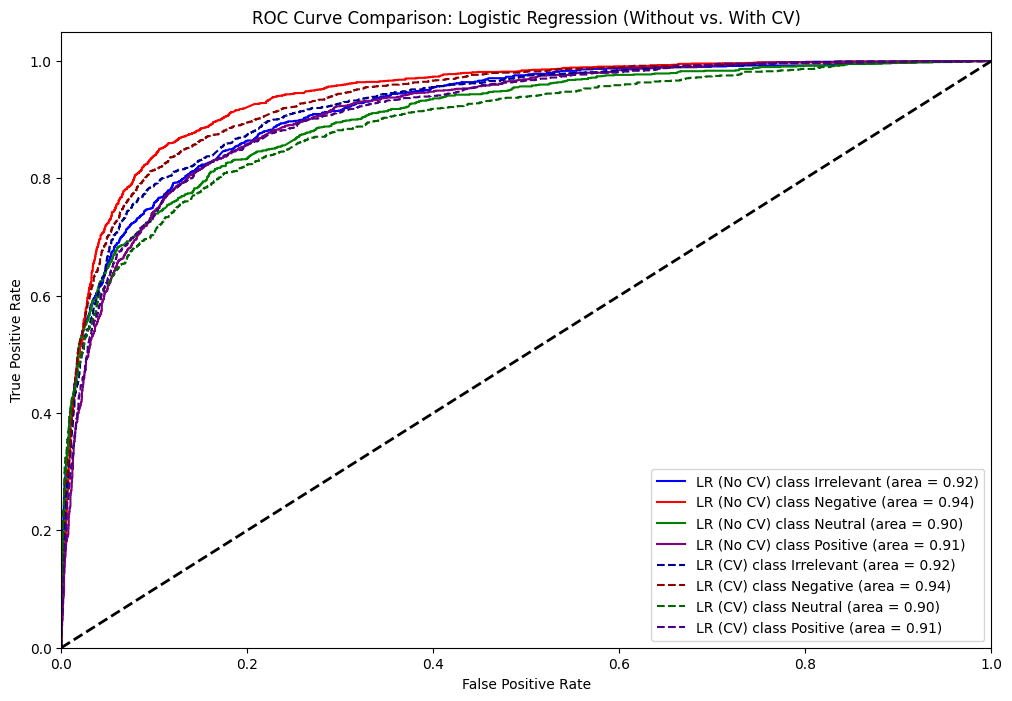

In [28]:
# Visualization of Comparison (Logistic Regression)

# Create a figure for comparison
plt.figure(figsize=(12, 8))

# Plot ROC curves for each class from Logistic Regression (Without CV)
# Assuming fpr_log_reg_dict, tpr_log_reg_dict, roc_auc_log_reg_dict are available from cell 6umaor6NFDAW
colors_lr_nocv = ['blue', 'red', 'green', 'purple'] # Using valid color names
n_classes_lr = len(label_encoder.classes_) # Use the global label_encoder

# Use the corrected variables from the Logistic Regression evaluation cell (6umaor6NFDAW)
fpr_log_reg_nocv_dict = fpr_log_reg_dict
tpr_log_reg_nocv_dict = tpr_log_reg_dict
roc_auc_log_reg_nocv_dict = roc_auc_log_reg_dict


for i, color in zip(range(n_classes_lr), colors_lr_nocv):
    # Check if the class exists and ROC data is available for this index
    if i in fpr_log_reg_nocv_dict and i in tpr_log_reg_nocv_dict and i in roc_auc_log_reg_nocv_dict:
        plt.plot(fpr_log_reg_nocv_dict[i], tpr_log_reg_nocv_dict[i], color=color, lw=1.5, linestyle='-',
                 label='LR (No CV) class {0} (area = {1:0.2f})'.format(label_encoder.classes_[i], roc_auc_log_reg_nocv_dict[i]))
    else:
        print(f"Warning: ROC data for Logistic Regression class {label_encoder.classes_[i]} not available for plotting.")

# Plot ROC curves for each class from Logistic Regression (With CV - using last fold as representative)
# Assuming last_fold_y_test_binarized_log_reg, last_fold_y_score_log_reg, and fold_roc_aucs_log_reg
# are available from cell O9ynkNllNe5a
colors_lr_cv = ['darkblue', 'darkred', 'darkgreen', 'indigo'] # Using different colors for CV

if 'last_fold_y_test_binarized_log_reg' in globals() and last_fold_y_test_binarized_log_reg is not None and \
   'last_fold_y_score_log_reg' in globals() and last_fold_y_score_log_reg is not None and \
   'fold_roc_aucs_log_reg' in globals():

    n_classes_log_reg_cv = last_fold_y_test_binarized_log_reg.shape[1]

    for i in range(n_classes_log_reg_cv):
        if i < len(label_encoder.classes_) and i < last_fold_y_test_binarized_log_reg.shape[1] and i < last_fold_y_score_log_reg.shape[1]:
             try:
                 if np.sum(last_fold_y_test_binarized_log_reg[:, i]) > 0:
                     fpr_fold, tpr_fold, _ = roc_curve(last_fold_y_test_binarized_log_reg[:, i], last_fold_y_score_log_reg[:, i])
                     # Use mean AUC for the label, but plot the last fold's curve
                     mean_auc_for_class_lr = np.mean(fold_roc_aucs_log_reg[i]) if fold_roc_aucs_log_reg[i] else 0
                     plt.plot(fpr_fold, tpr_fold, color=colors_lr_cv[i % len(colors_lr_cv)], lw=1.5, linestyle='--',
                              label='LR (CV) class {0} (area = {1:0.2f})'.format(label_encoder.classes_[i], mean_auc_for_class_lr))
                 else:
                     print(f"Warning: Class {label_encoder.classes_[i]} not present in the last CV fold test set for plotting.")

             except ValueError as e:
                  print(f"Error computing ROC/AUC for class {label_encoder.classes_[i]} in last CV fold for plotting: {e}")
                  pass
else:
    print("\nROC curves for Logistic Regression with CV could not be plotted (data not available).")


plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison: Logistic Regression (Without vs. With CV)') # Updated title
plt.legend(loc="lower right")
plt.show()

Classification Report (Random Forests):
              precision    recall  f1-score   support

  Irrelevant       0.95      0.86      0.90      1197
    Negative       0.90      0.95      0.92      1888
     Neutral       0.94      0.89      0.92      1273
    Positive       0.88      0.92      0.90      1608

    accuracy                           0.91      5966
   macro avg       0.92      0.91      0.91      5966
weighted avg       0.91      0.91      0.91      5966


Confusion Matrix (Random Forests):


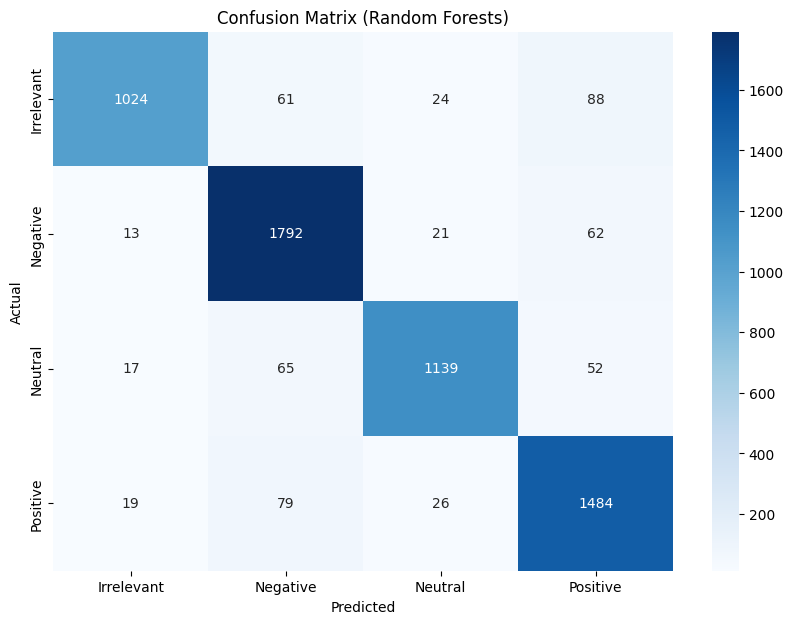

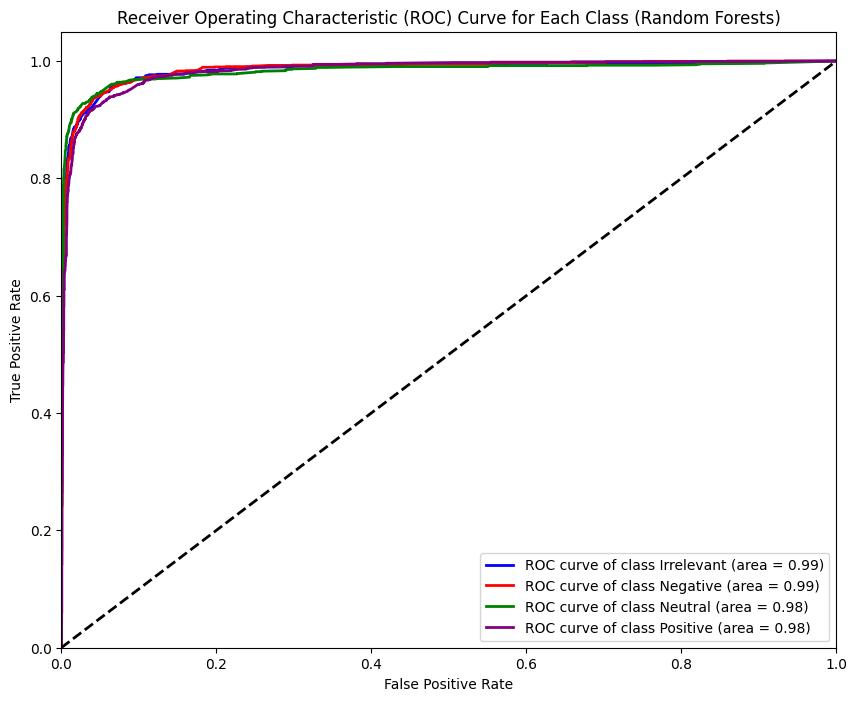

In [29]:
# Random Forests
# Without cross validation

from sklearn.ensemble import RandomForestClassifier

# Initialize a Random Forest Classifier model
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
rf_clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf = rf_clf.predict(X_test)

# Classification Report
print("Classification Report (Random Forests):")
print(classification_report(y_test, y_pred_rf, target_names=label_encoder.classes_))

# Confusion Matrix
print("\nConfusion Matrix (Random Forests):")
cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(10, 7))
sns.heatmap(
    cm_rf,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=label_encoder.classes_,
    yticklabels=label_encoder.classes_,
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Random Forests)")
plt.show()

# Compute ROC curve and ROC area for each class (without cross-validation)

# Binarize the true labels
y_test_binarized_rf = label_binarize(y_test, classes=np.arange(len(label_encoder.classes_)))
n_classes_rf = y_test_binarized_rf.shape[1]

# Get predicted probabilities from the Random Forest model
y_score_rf = rf_clf.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr_rf = dict()
tpr_rf = dict()
roc_auc_rf = dict()
for i in range(n_classes_rf):
    # Compute ROC curve for class i using binarized true labels and predicted probabilities for class i
    fpr_rf[i], tpr_rf[i], _ = roc_curve(y_test_binarized_rf[:, i], y_score_rf[:, i])
    roc_auc_rf[i] = auc(fpr_rf[i], tpr_rf[i])

# Plot ROC curves for each class
plt.figure(figsize=(10, 8))
colors = ['blue', 'red', 'green', 'purple'] # Adjust colors based on number of classes
for i, color in zip(range(n_classes_rf), colors):
    # Ensure the class exists
    if i < len(label_encoder.classes_):
        plt.plot(fpr_rf[i], tpr_rf[i], color=color, lw=2,
                 label='ROC curve of class {0} (area = {1:0.2f})'.format(label_encoder.classes_[i], roc_auc_rf[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Each Class (Random Forests)')
plt.legend(loc="lower right")
plt.show()



Random Forest Results (Without CV):
Accuracy: 0.9116661079450218
              precision    recall  f1-score   support

  Irrelevant       0.95      0.86      0.90      1197
    Negative       0.90      0.95      0.92      1888
     Neutral       0.94      0.89      0.92      1273
    Positive       0.88      0.92      0.90      1608

    accuracy                           0.91      5966
   macro avg       0.92      0.91      0.91      5966
weighted avg       0.91      0.91      0.91      5966


Performing 5-Fold Cross-Validation with Random Forest:

--- Fold 1/5 ---
  Training complete.
  Accuracy for Fold 1: 0.9143479718404292
  Confusion Matrix for Fold 1:
[[1029   69   20   79]
 [  11 1795   22   60]
 [  12   67 1138   56]
 [  16   74   25 1493]]


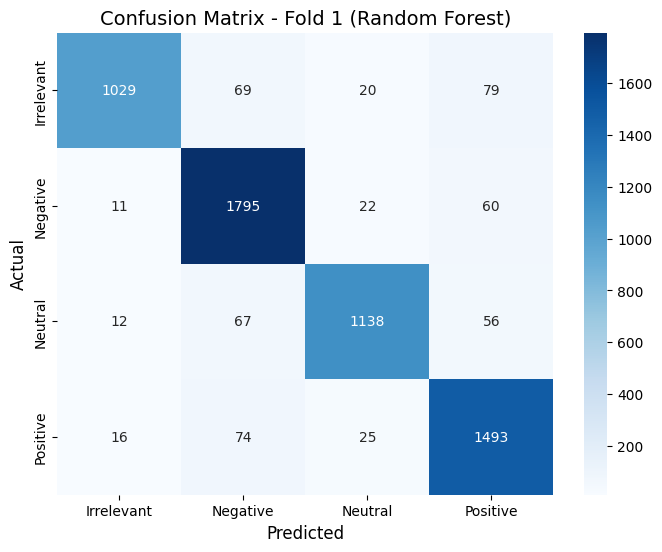

  ROC AUC per class for Fold 1: {'Irrelevant': np.float64(0.9851922390024828), 'Negative': np.float64(0.9864026613452923), 'Neutral': np.float64(0.98354261975977), 'Positive': np.float64(0.983563138871955)}


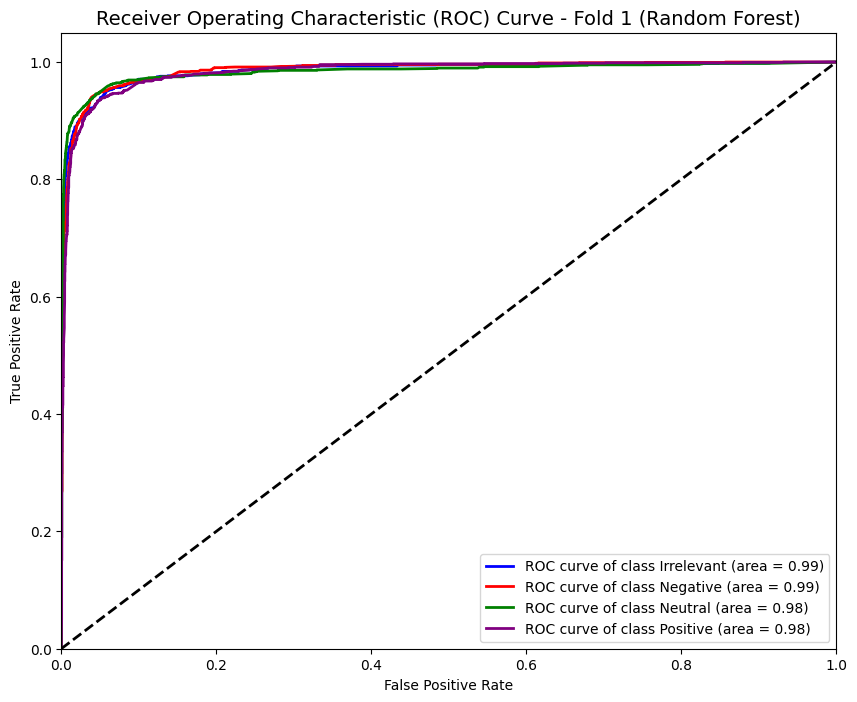


--- Fold 2/5 ---
  Training complete.
  Accuracy for Fold 2: 0.9200469326181696
  Confusion Matrix for Fold 2:
[[1130   64   22   51]
 [  34 1819   28   33]
 [  25   55 1122   36]
 [  32   63   34 1418]]


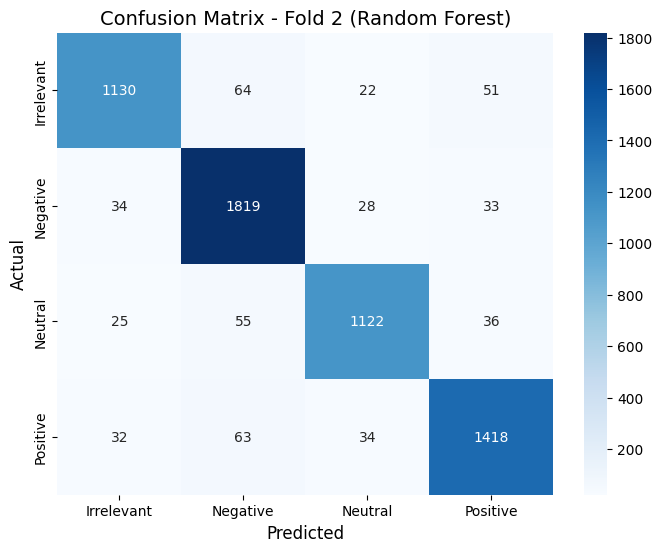

  ROC AUC per class for Fold 2: {'Irrelevant': np.float64(0.9846543278700585), 'Negative': np.float64(0.9871373683390737), 'Neutral': np.float64(0.9896608968944505), 'Positive': np.float64(0.9822420900053583)}


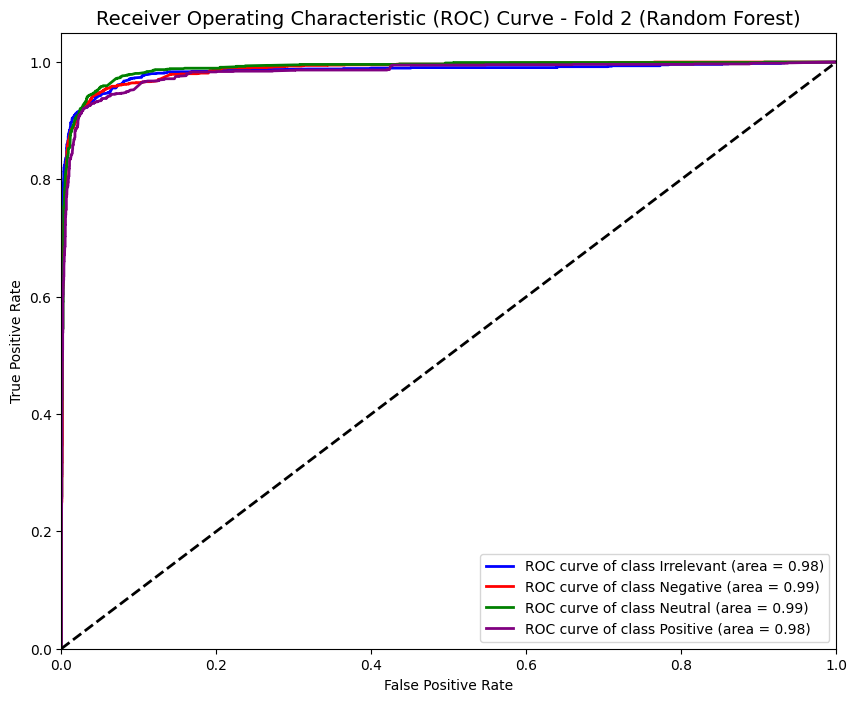


--- Fold 3/5 ---
  Training complete.
  Accuracy for Fold 3: 0.914850821320818
  Confusion Matrix for Fold 3:
[[1089   53   22   63]
 [  29 1782   14   41]
 [  32   72 1141   49]
 [  39   74   20 1446]]


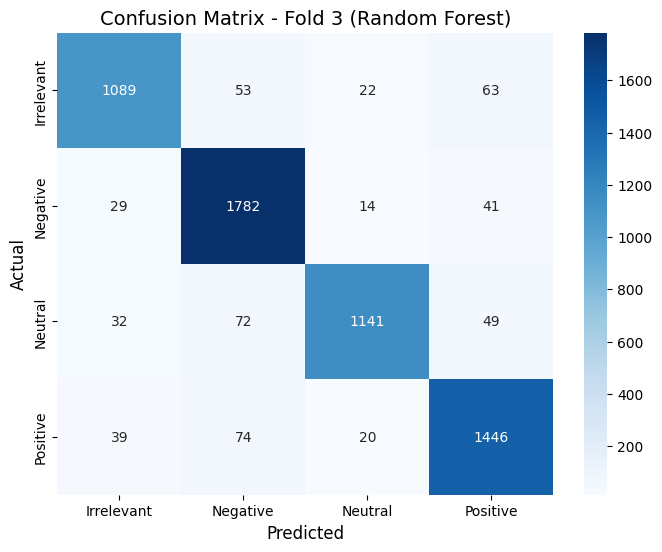

  ROC AUC per class for Fold 3: {'Irrelevant': np.float64(0.9858585566747203), 'Negative': np.float64(0.9879513371500275), 'Neutral': np.float64(0.9870655660477229), 'Positive': np.float64(0.982073164235457)}


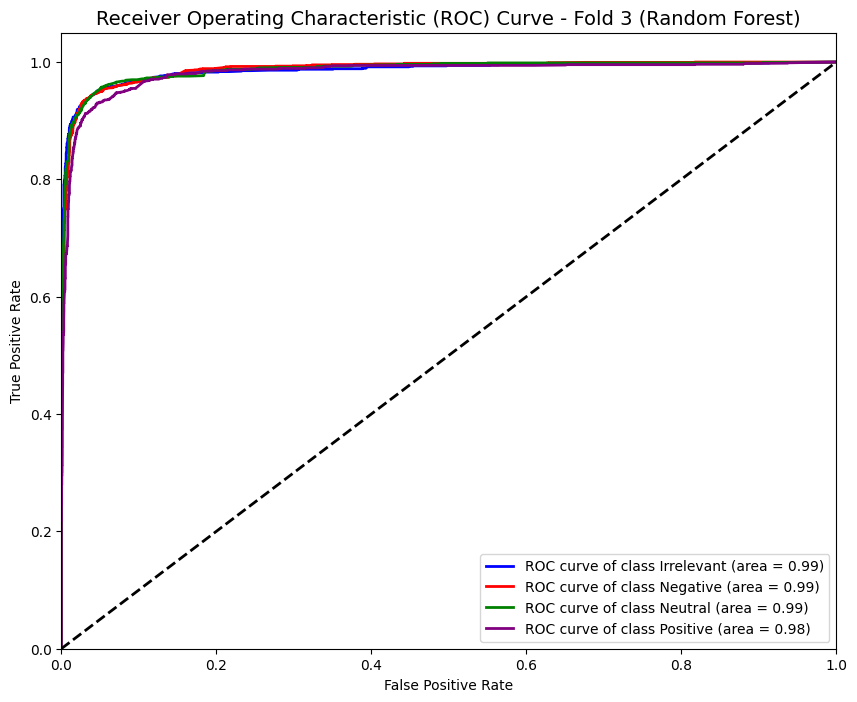


--- Fold 4/5 ---
  Training complete.
  Accuracy for Fold 4: 0.910828025477707
  Confusion Matrix for Fold 4:
[[1027   66   25   74]
 [  20 1763   32   68]
 [  16   57 1141   45]
 [  27   69   33 1503]]


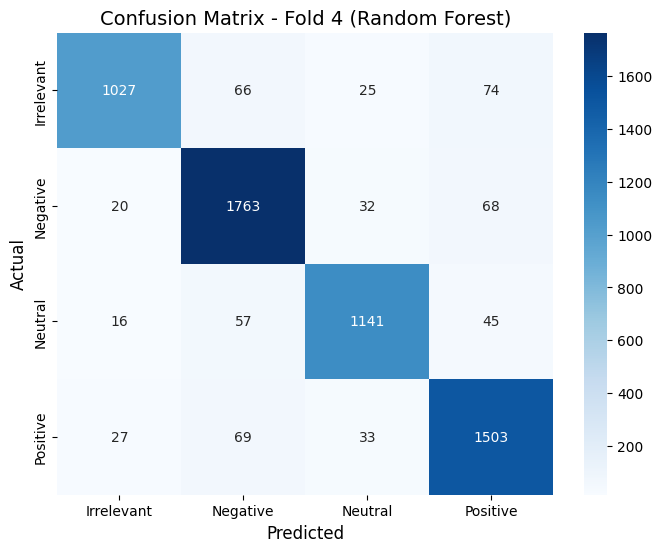

  ROC AUC per class for Fold 4: {'Irrelevant': np.float64(0.9855541797994168), 'Negative': np.float64(0.9841854279931465), 'Neutral': np.float64(0.9899704916190427), 'Positive': np.float64(0.9828982758308676)}


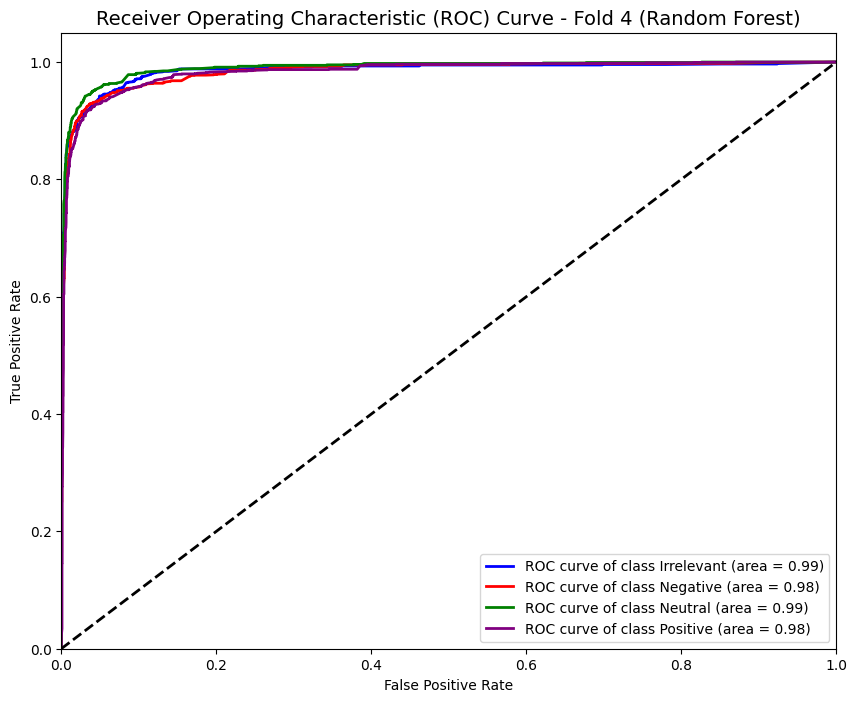


--- Fold 5/5 ---
  Training complete.
  Accuracy for Fold 5: 0.9131601005867561
  Confusion Matrix for Fold 5:
[[1136   55   17   55]
 [  38 1770   15   46]
 [  27   72 1101   63]
 [  32   74   24 1440]]


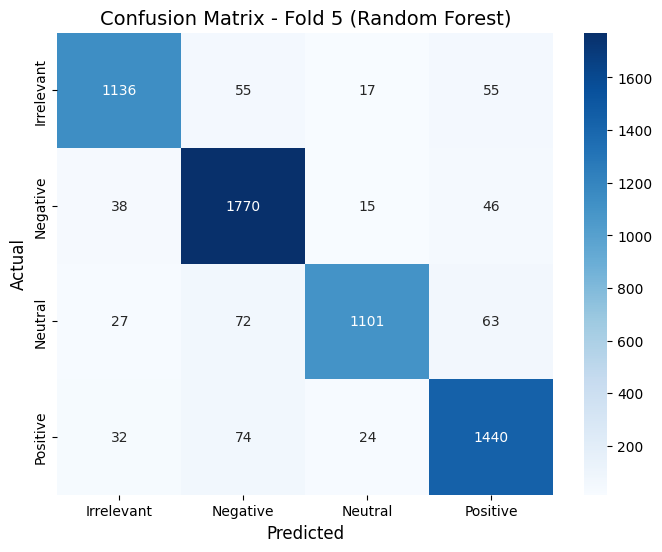

  ROC AUC per class for Fold 5: {'Irrelevant': np.float64(0.9892142559575229), 'Negative': np.float64(0.9858581314372659), 'Neutral': np.float64(0.9840512771809506), 'Positive': np.float64(0.9844745404085419)}


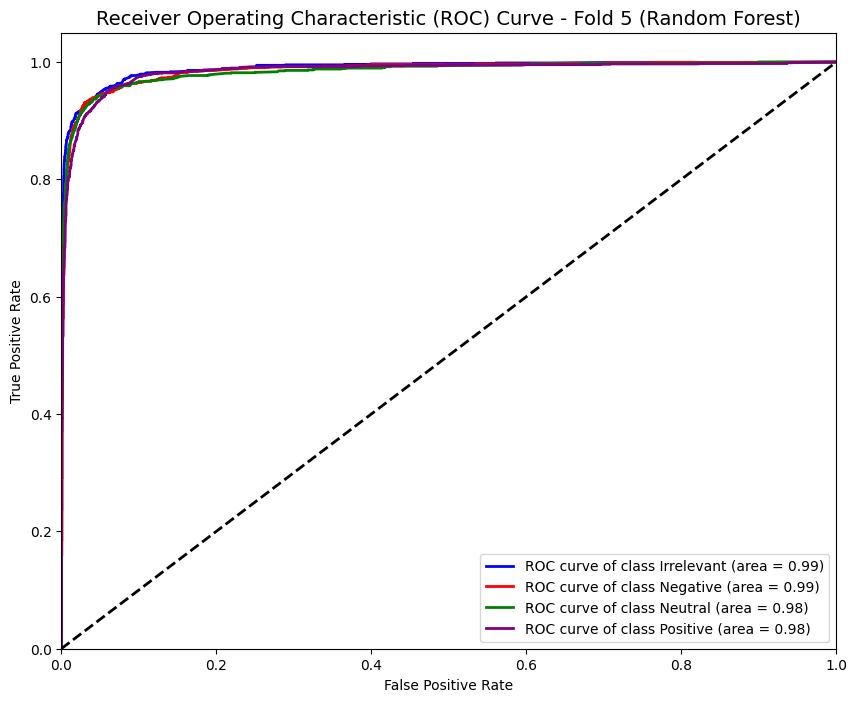


--- Average Metrics Across Folds (Random Forest) ---
Cross-validation accuracies per fold (Random Forest): [0.9143479718404292, 0.9200469326181696, 0.914850821320818, 0.910828025477707, 0.9131601005867561]
Mean cross-validation accuracy (Random Forest): 0.914646770368776
Standard deviation of cross-validation accuracies (Random Forest): 0.0030359732955078434

Mean Confusion Matrix across folds (Random Forest):
[[1082   61   21   64]
 [  26 1785   22   49]
 [  22   64 1128   49]
 [  29   70   27 1460]]

Mean Cross-validation AUC per class (Random Forest):
  Class Irrelevant (Area = 0.99)
  Class Negative (Area = 0.99)
  Class Neutral (Area = 0.99)
  Class Positive (Area = 0.98)


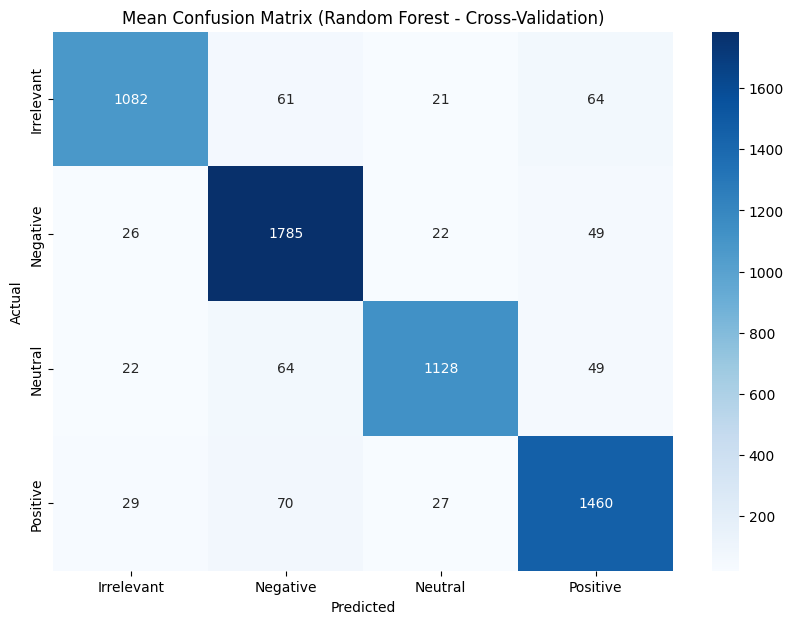

In [30]:
# Random Forests
# With cross validation

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import KFold
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import label_binarize
from sklearn.base import clone

# Step 5: Train Random Forest and evaluate
# Initialize a Random Forest model
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42) # n_estimators is the number of trees

# Fit the model
rf_clf.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_clf.predict(X_test)

# Evaluate using classification metrics
print("\nRandom Forest Results (Without CV):")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf, target_names=label_encoder.classes_))

# Step 6: Cross-validation with Random Forest

# Define the number of folds
n_splits_rf = 5 # Using 5-Fold

# Initialize KFold cross-validation
kf_rf = KFold(n_splits=n_splits_rf, shuffle=True, random_state=42)

fold_accuracies_rf = []
fold_cms_rf = [] # Store confusion matrices for each fold
fold_roc_aucs_rf = {i: [] for i in range(len(label_encoder.classes_))} # Store AUCs per class per fold

print(f"\nPerforming {n_splits_rf}-Fold Cross-Validation with Random Forest:")

# Iterate through each fold
for fold, (train_index, test_index) in enumerate(kf_rf.split(X, y)):
    print(f"\n--- Fold {fold+1}/{n_splits_rf} ---")

    # Split data for the current fold
    X_train_fold_rf, X_test_fold_rf = X[train_index], X[test_index]
    y_train_fold_rf, y_test_fold_rf = y.iloc[train_index], y.iloc[test_index]

    # Initialize a new Random Forest model for each fold
    rf_fold = clone(rf_clf) # Clone the model

    # Fit the model
    print("  Training complete.")
    rf_fold.fit(X_train_fold_rf, y_train_fold_rf)

    # Evaluate the model on the test data for the current fold
    y_pred_fold_rf = rf_fold.predict(X_test_fold_rf)
    fold_accuracy_rf = accuracy_score(y_test_fold_rf, y_pred_fold_rf)
    print(f"  Accuracy for Fold {fold+1}: {fold_accuracy_rf}")
    fold_accuracies_rf.append(fold_accuracy_rf)

    # Compute and store Confusion Matrix for the fold
    cm_fold_rf = confusion_matrix(y_test_fold_rf, y_pred_fold_rf)
    fold_cms_rf.append(cm_fold_rf)
    print(f"  Confusion Matrix for Fold {fold+1}:\n{cm_fold_rf}")

    # --- Visualize Confusion Matrix for the current fold ---
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_fold_rf, annot=True, fmt='d', cmap='Blues',
                xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_,
                annot_kws={'size': 10}) # Adjust annotation font size
    plt.xlabel('Predicted', fontsize=12) # Adjust xlabel font size
    plt.ylabel('Actual', fontsize=12) # Adjust ylabel font size
    plt.title(f'Confusion Matrix - Fold {fold+1} (Random Forest)', fontsize=14) # Adjust title font size
    plt.show()

    # Compute and store ROC AUC for each class for the fold
    y_test_binarized_fold_rf = label_binarize(y_test_fold_rf, classes=np.arange(len(label_encoder.classes_)))
    y_score_fold_rf = rf_fold.predict_proba(X_test_fold_rf)
    roc_auc_fold_rf = {}

    # --- Visualize ROC Curve for the current fold ---
    plt.figure(figsize=(10, 8))
    colors = ['blue', 'red', 'green', 'purple'] # Ensure enough colors

    for i in range(len(label_encoder.classes_)):
        if i < y_test_binarized_fold_rf.shape[1] and i < y_score_fold_rf.shape[1]:
            try:
                if np.sum(y_test_binarized_fold_rf[:, i]) > 0:
                    fpr_fold_rf, tpr_fold_rf, _ = roc_curve(y_test_binarized_fold_rf[:, i], y_score_fold_rf[:, i])
                    auc_fold_rf = auc(fpr_fold_rf, tpr_fold_rf)
                    fold_roc_aucs_rf[i].append(auc_fold_rf)
                    roc_auc_fold_rf[label_encoder.classes_[i]] = auc_fold_rf

                    plt.plot(fpr_fold_rf, tpr_fold_rf, color=colors[i % len(colors)], lw=2,
                             label='ROC curve of class {0} (area = {1:0.2f})'.format(label_encoder.classes_[i], auc_fold_rf))
                else:
                     roc_auc_fold_rf[label_encoder.classes_[i]] = np.nan

            except ValueError as e:
                 print(f"  Error computing ROC/AUC for class {label_encoder.classes_[i]} in fold {fold+1}: {e}")
                 roc_auc_fold_rf[label_encoder.classes_[i]] = np.nan


    print(f"  ROC AUC per class for Fold {fold+1}: {roc_auc_fold_rf}")

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) Curve - Fold {fold+1} (Random Forest)', fontsize=14)
    plt.legend(loc="lower right")
    plt.show()


# Print the results of cross-validation
print("\n--- Average Metrics Across Folds (Random Forest) ---")
print("Cross-validation accuracies per fold (Random Forest):", fold_accuracies_rf)
print("Mean cross-validation accuracy (Random Forest):", np.mean(fold_accuracies_rf))
print("Standard deviation of cross-validation accuracies (Random Forest):", np.std(fold_accuracies_rf))

# Average the confusion matrices
mean_cm_rf = np.mean(fold_cms_rf, axis=0).astype(int)
print("\nMean Confusion Matrix across folds (Random Forest):")
print(mean_cm_rf)

# Print mean AUC for each class
print("\nMean Cross-validation AUC per class (Random Forest):")
avg_roc_auc_per_class_rf = {}
for i in range(len(label_encoder.classes_)):
    if fold_roc_aucs_rf[i]:
        avg_roc_auc_per_class_rf[label_encoder.classes_[i]] = np.mean(fold_roc_aucs_rf[i])
        print(f"  Class {label_encoder.classes_[i]} (Area = {avg_roc_auc_per_class_rf[label_encoder.classes_[i]]:0.2f})")
    else:
        avg_roc_auc_per_class_rf[label_encoder.classes_[i]] = np.nan
        print(f"  Class {label_encoder.classes_[i]}: No valid AUC computed across folds")


# Confusion matrix visualization (using the mean matrix)
plt.figure(figsize=(10, 7))
sns.heatmap(
    mean_cm_rf, # Using the mean confusion matrix
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=label_encoder.classes_,
    yticklabels=label_encoder.classes_,
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Mean Confusion Matrix (Random Forest - Cross-Validation)")
plt.show()


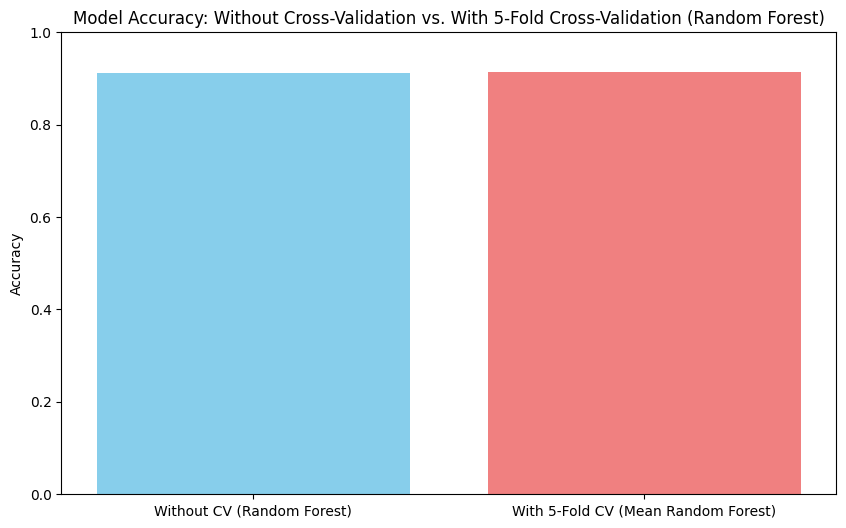

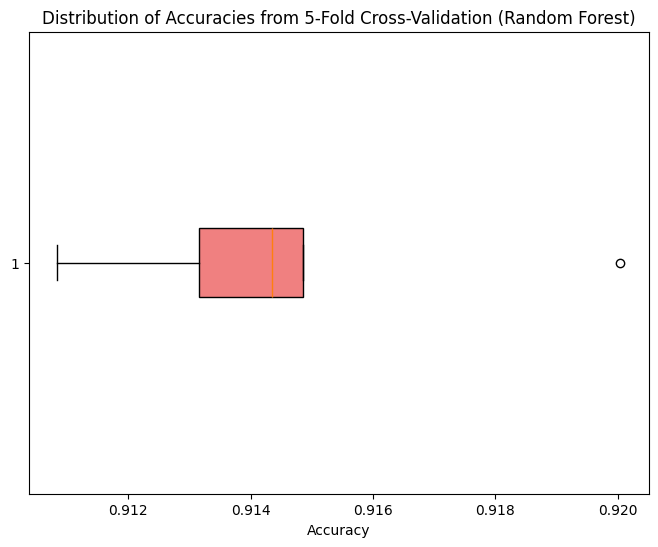

In [31]:
# Visualization of Comparison (Random Forests)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import KFold
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import label_binarize

# Visualize the comparison of Random Forest results
labels_rf = ['Without CV (Random Forest)', 'With 5-Fold CV (Mean Random Forest)']

# You need to re-run the Random Forest without CV part to get y_pred_rf and the accuracy
# or ensure the previous code block was run to have these variables available.
# Let's re-calculate the accuracy without CV to be safe.
rf_clf_nocv = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf_nocv.fit(X_train, y_train)
y_pred_rf_nocv = rf_clf_nocv.predict(X_test)
accuracy_rf_nocv = accuracy_score(y_test, y_pred_rf_nocv)

# The mean cross-validation accuracy for Random Forest was stored in 'np.mean(fold_accuracies_rf)'
accuracies_rf = [accuracy_rf_nocv, np.mean(fold_accuracies_rf)]

# Create a bar plot to compare accuracies
plt.figure(figsize=(10, 6))
plt.bar(labels_rf, accuracies_rf, color=['skyblue', 'lightcoral'])
plt.ylabel('Accuracy')
plt.title('Model Accuracy: Without Cross-Validation vs. With 5-Fold Cross-Validation (Random Forest)')
plt.ylim([0, 1]) # Set y-axis limits to represent accuracy range
plt.show()

# Visualize the distribution of accuracies from cross-validation for Random Forest
plt.figure(figsize=(8, 6))
plt.boxplot(fold_accuracies_rf, vert=False, patch_artist=True, boxprops=dict(facecolor='lightcoral'))
plt.xlabel('Accuracy')
plt.title('Distribution of Accuracies from 5-Fold Cross-Validation (Random Forest)')
plt.show()


Classification Report (SVM - Without CV):
              precision    recall  f1-score   support

  Irrelevant       0.79      0.75      0.77      1197
    Negative       0.82      0.88      0.85      1888
     Neutral       0.83      0.74      0.78      1273
    Positive       0.77      0.80      0.78      1608

    accuracy                           0.80      5966
   macro avg       0.80      0.79      0.79      5966
weighted avg       0.80      0.80      0.80      5966


Confusion Matrix (SVM - Without CV):


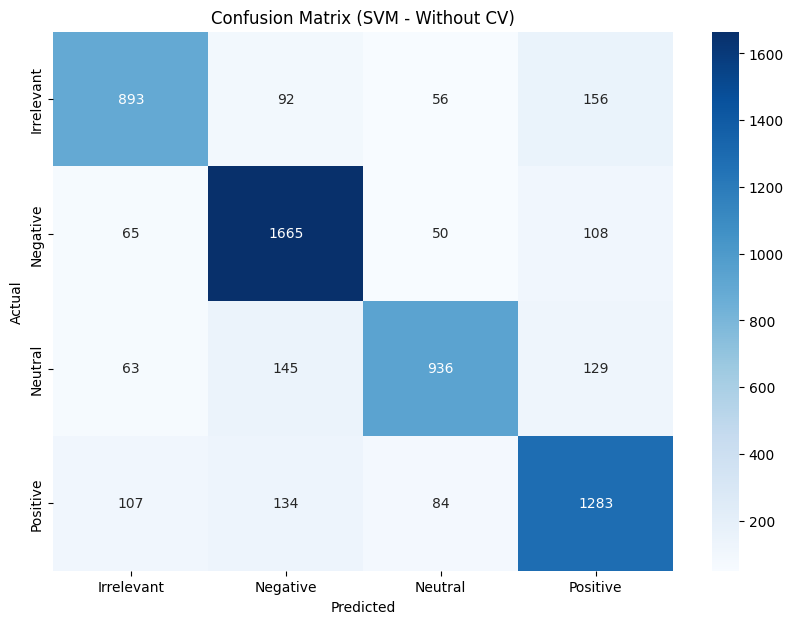

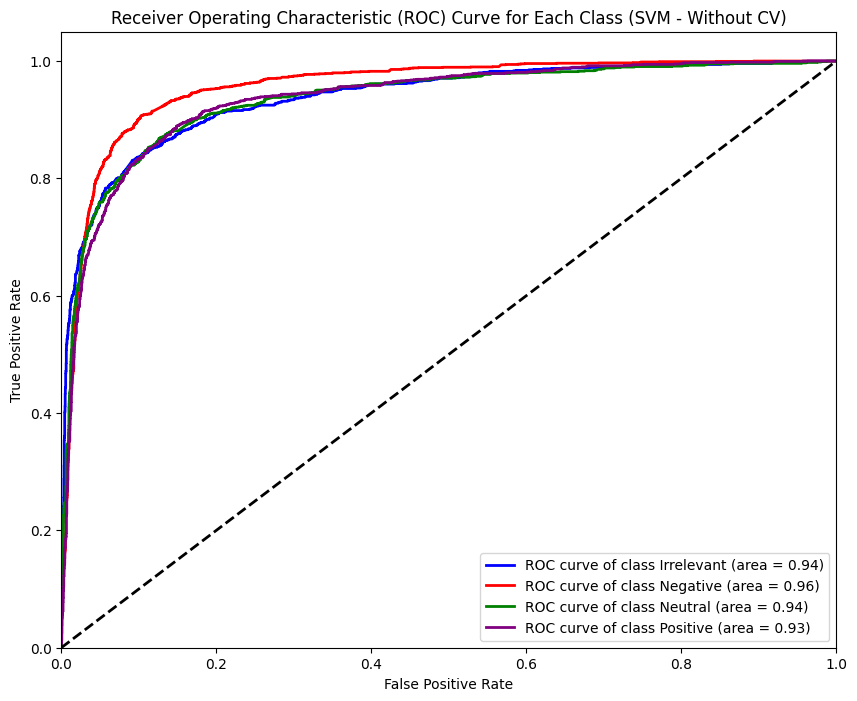

In [32]:
# SVM
# Without cross validation

from sklearn.svm import SVC

# Initialize a Support Vector Classifier model
svm_clf = SVC(kernel='linear', probability=True, random_state=42) # Use probability=True for ROC/AUC

# Train the model on the training data
svm_clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred_svm = svm_clf.predict(X_test)

# Classification Report
print("Classification Report (SVM - Without CV):")
print(classification_report(y_test, y_pred_svm, target_names=label_encoder.classes_))

# Confusion Matrix
print("\nConfusion Matrix (SVM - Without CV):")
cm_svm = confusion_matrix(y_test, y_pred_svm)

plt.figure(figsize=(10, 7))
sns.heatmap(
    cm_svm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=label_encoder.classes_,
    yticklabels=label_encoder.classes_,
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (SVM - Without CV)")
plt.show()

# Compute ROC curve and ROC area for each class (without cross-validation)

# Binarize the true labels
y_test_binarized_svm = label_binarize(y_test, classes=np.arange(len(label_encoder.classes_)))
n_classes_svm = y_test_binarized_svm.shape[1]

# Get predicted probabilities from the SVM model
# This requires probability=True when initializing SVC, which can make training slower.
y_score_svm = svm_clf.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr_svm = dict()
tpr_svm = dict()
roc_auc_svm = dict()
for i in range(n_classes_svm):
    # Compute ROC curve for class i using binarized true labels and predicted probabilities for class i
    fpr_svm[i], tpr_svm[i], _ = roc_curve(y_test_binarized_svm[:, i], y_score_svm[:, i])
    roc_auc_svm[i] = auc(fpr_svm[i], tpr_svm[i])

# Plot ROC curves for each class
plt.figure(figsize=(10, 8))
colors = ['blue', 'red', 'green', 'purple'] # Adjust colors based on number of classes
for i, color in zip(range(n_classes_svm), colors):
    # Ensure the class exists
    if i < len(label_encoder.classes_):
        plt.plot(fpr_svm[i], tpr_svm[i], color=color, lw=2,
                 label='ROC curve of class {0} (area = {1:0.2f})'.format(label_encoder.classes_[i], roc_auc_svm[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Each Class (SVM - Without CV)')
plt.legend(loc="lower right")
plt.show()


Performing 5-Fold Cross-Validation with SVM:
Fold 1/5
  Training complete.
  Accuracy for Fold 1: 0.8005363727790814


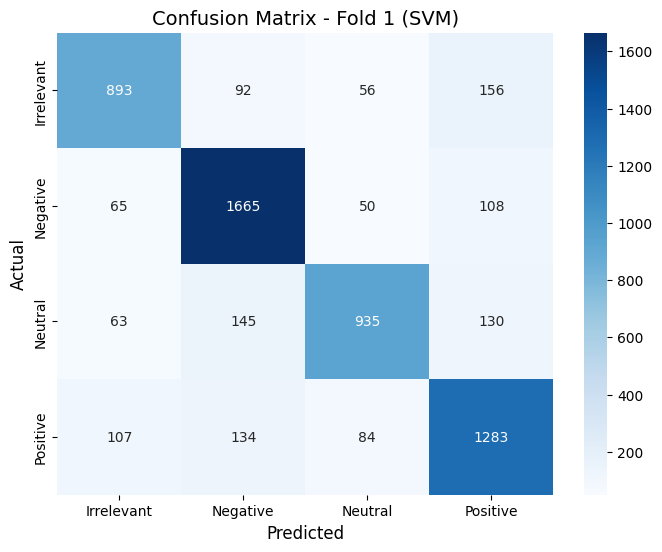

  ROC AUC per class for Fold 1: {'Irrelevant': np.float64(0.9372961480376696), 'Negative': np.float64(0.956193345234038), 'Neutral': np.float64(0.9355289897925894), 'Positive': np.float64(0.9349420149139571)}


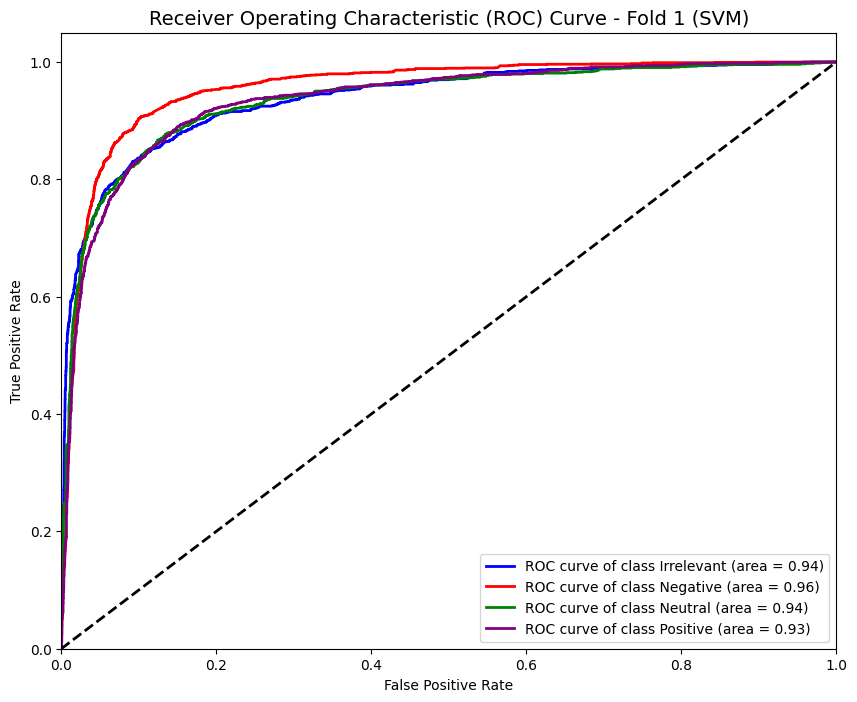

Fold 2/5
  Training complete.
  Accuracy for Fold 2: 0.7995306738183037


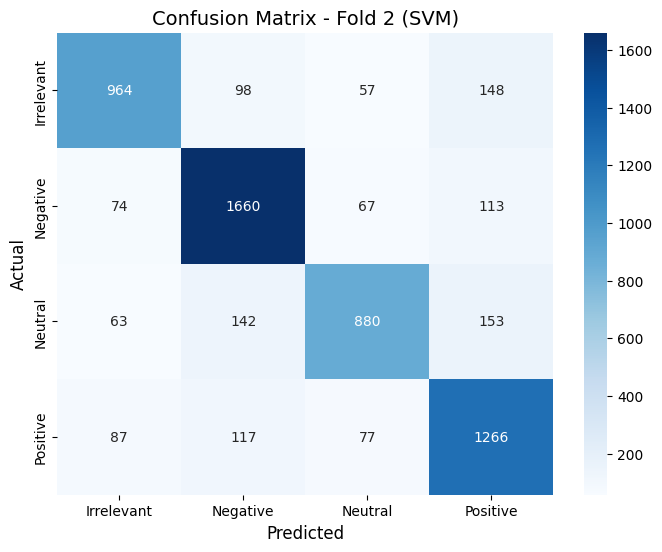

  ROC AUC per class for Fold 2: {'Irrelevant': np.float64(0.9407848115595974), 'Negative': np.float64(0.9513066034962417), 'Neutral': np.float64(0.9330648677387523), 'Positive': np.float64(0.9319127619714658)}


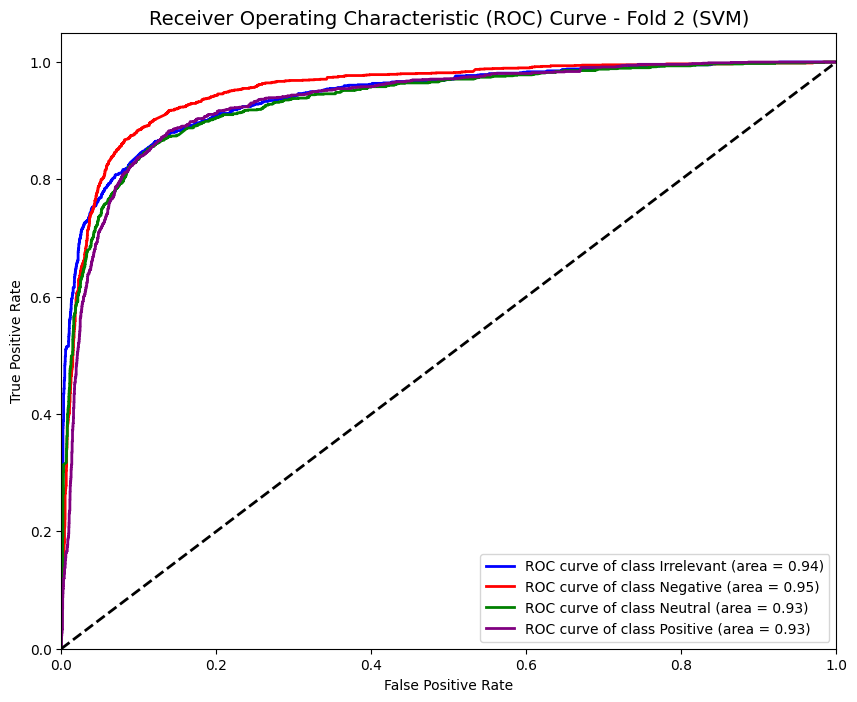

Fold 3/5
  Training complete.
  Accuracy for Fold 3: 0.7991954408313778


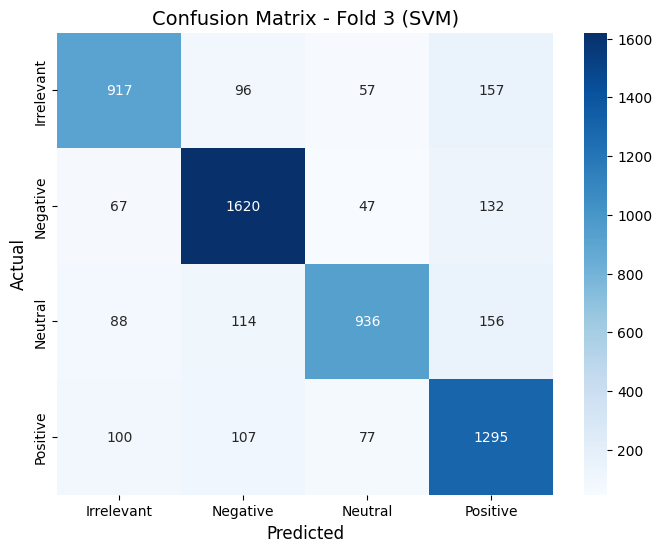

  ROC AUC per class for Fold 3: {'Irrelevant': np.float64(0.9368020447300169), 'Negative': np.float64(0.9545406242647636), 'Neutral': np.float64(0.9352334635885331), 'Positive': np.float64(0.9337829267859599)}


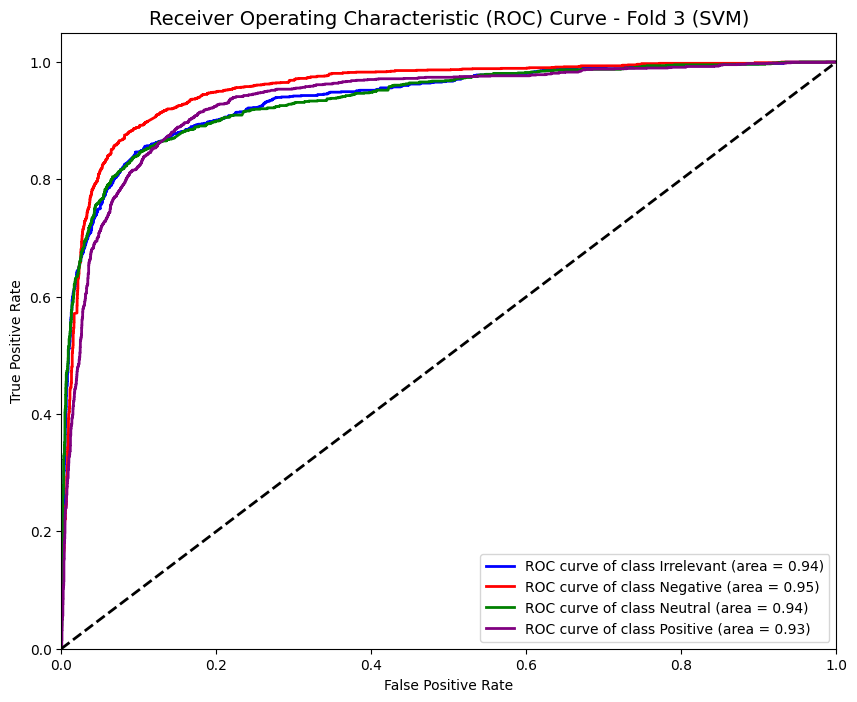

Fold 4/5
  Training complete.
  Accuracy for Fold 4: 0.8050620181025813


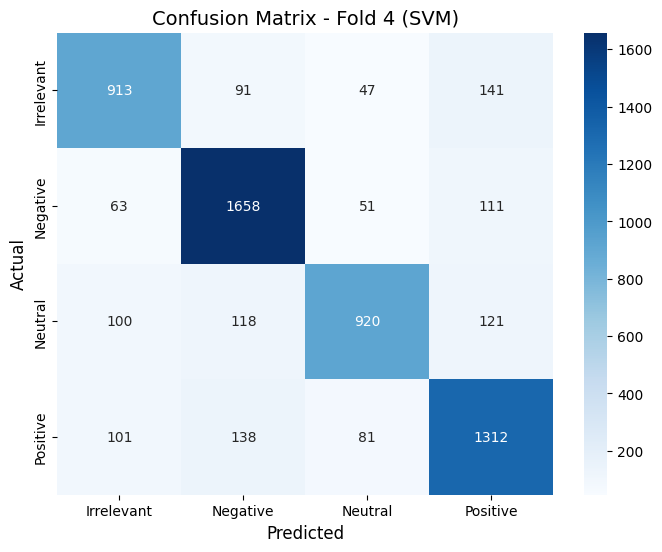

  ROC AUC per class for Fold 4: {'Irrelevant': np.float64(0.9418760701844161), 'Negative': np.float64(0.9562607493032584), 'Neutral': np.float64(0.9379387466961902), 'Positive': np.float64(0.9313695093288816)}


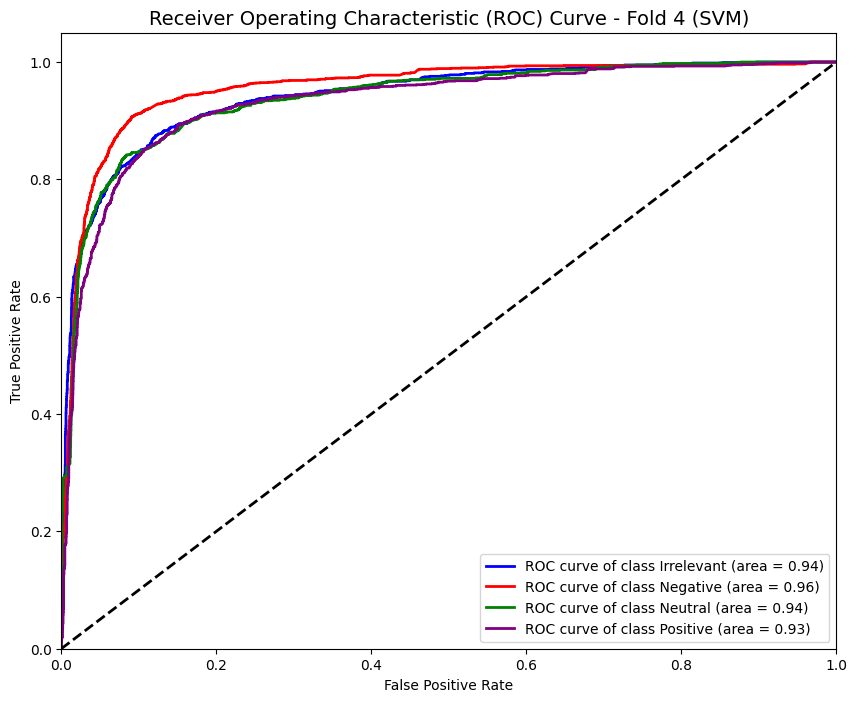

Fold 5/5
  Training complete.
  Accuracy for Fold 5: 0.7954735959765298


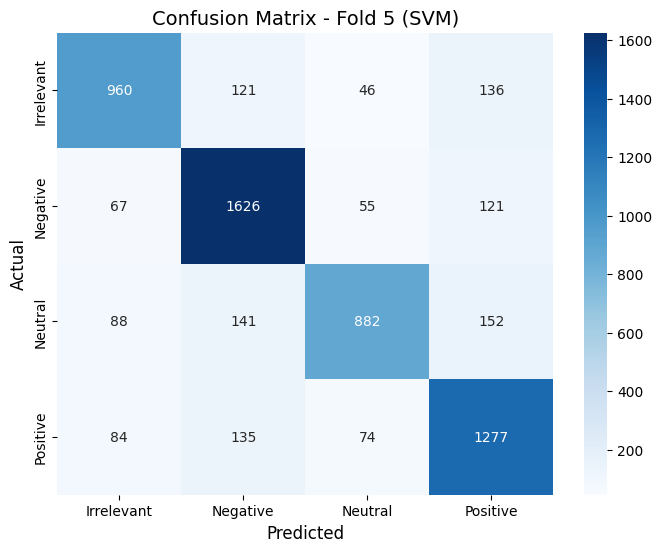

  ROC AUC per class for Fold 5: {'Irrelevant': np.float64(0.9372095498184261), 'Negative': np.float64(0.9518274232753143), 'Neutral': np.float64(0.9256871033804789), 'Positive': np.float64(0.9389132120316226)}


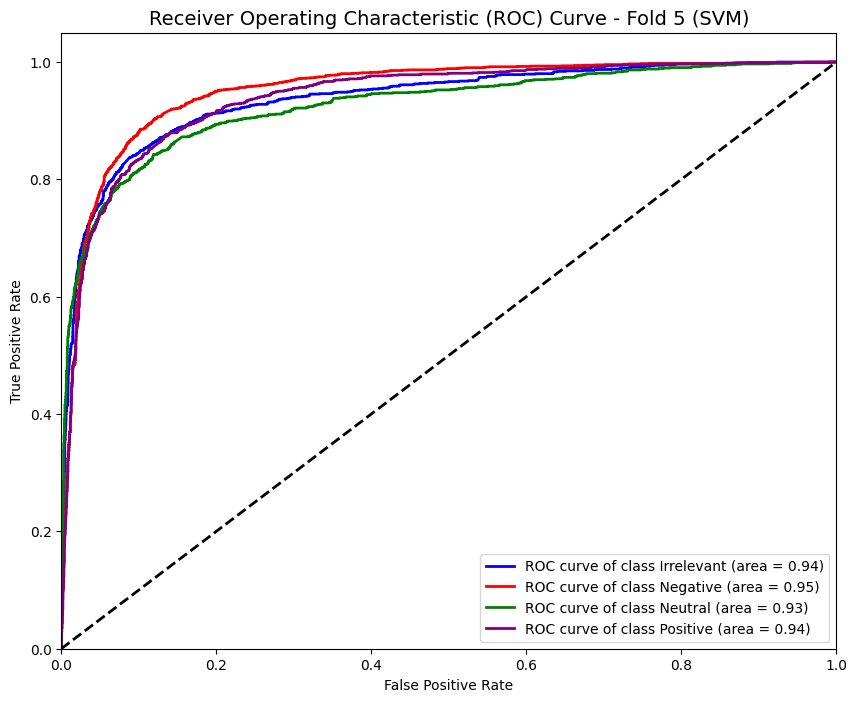


--- Average Metrics Across Folds (SVM) ---
Cross-validation accuracies per fold (SVM): [0.8005363727790814, 0.7995306738183037, 0.7991954408313778, 0.8050620181025813, 0.7954735959765298]
Mean cross-validation accuracy (SVM): 0.7999596203015747
Standard deviation of cross-validation accuracies (SVM): 0.0030743938047394794

Mean Confusion Matrix across folds (SVM):
[[ 929   99   52  147]
 [  67 1645   54  117]
 [  80  132  910  142]
 [  95  126   78 1286]]

Mean Cross-validation AUC per class (SVM):
  Class Irrelevant (Area = 0.94)
  Class Negative (Area = 0.95)
  Class Neutral (Area = 0.93)
  Class Positive (Area = 0.93)


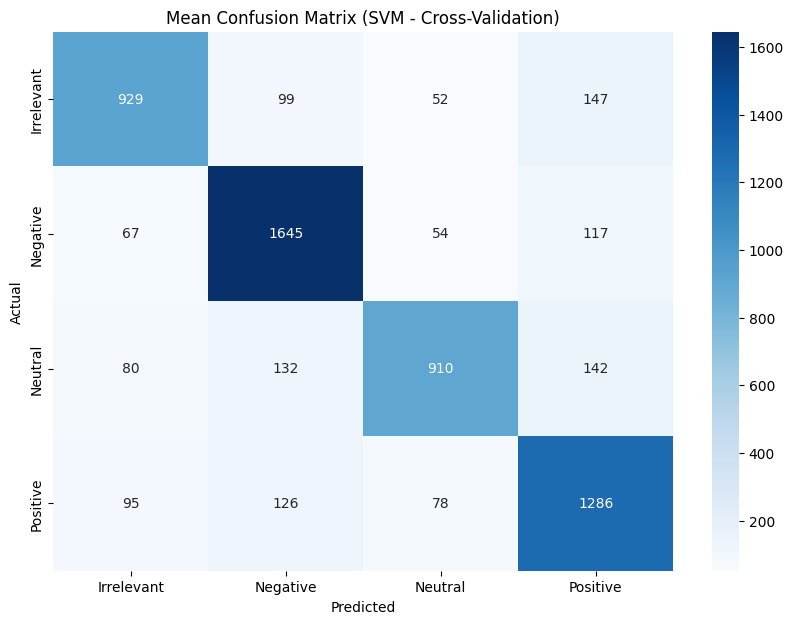

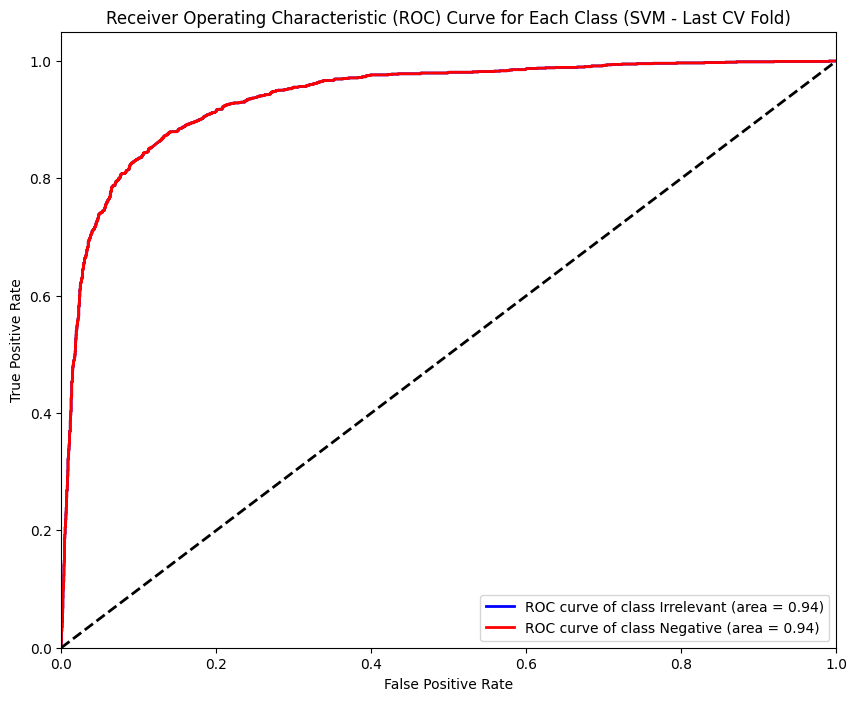

In [33]:
# SVM
# With cross validation

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import KFold
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import label_binarize
from sklearn.base import clone

# Step 5: Train SVM and evaluate (With cross-validation)
# Initialize a Support Vector Classifier model
# Use probability=True for ROC/AUC, though it adds computational cost.
# For large datasets, consider kernel='linear' or using LinearSVC which is faster for linear kernel.
# Let's use SVC with a linear kernel and probability=True as done previously.
svm_clf_cv = SVC(kernel='linear', probability=True, random_state=42)

# Step 6: Cross-validation with SVM

# Define the number of folds
n_splits_svm = 5  # Using 5-Fold

# Initialize KFold cross-validation
kf_svm = KFold(n_splits=n_splits_svm, shuffle=True, random_state=42)

fold_accuracies_svm = []
fold_cms_svm = []
fold_roc_aucs_svm = {i: [] for i in range(len(label_encoder.classes_))} # Store AUCs per class
fold_fprs_svm = {i: [] for i in range(len(label_encoder.classes_))} # Store FPRs per class per fold
fold_tprs_svm = {i: [] for i in range(len(label_encoder.classes_))} # Store TPRs per class per fold


print(f"\nPerforming {n_splits_svm}-Fold Cross-Validation with SVM:")

# Variables to store data for the last fold's ROC plot
last_fold_y_test_binarized_svm = None
last_fold_y_score_svm = None
last_fold_label_encoder_classes_svm = label_encoder.classes_

# Iterate through each fold
for fold, (train_index, test_index) in enumerate(kf_svm.split(X, y)):
    print(f"Fold {fold+1}/{n_splits_svm}")

    # Split data for the current fold
    X_train_fold_svm, X_test_fold_svm = X[train_index], X[test_index]
    y_train_fold_svm, y_test_fold_svm = y.iloc[train_index], y.iloc[test_index]

    # Initialize a new SVM model for each fold
    svm_fold = SVC(kernel='linear', probability=True, random_state=42)

    # Fit the model
    print("  Training complete.")
    svm_fold.fit(X_train_fold_svm, y_train_fold_svm)


    # Evaluate the model on the test data for the current fold
    y_pred_fold_svm = svm_fold.predict(X_test_fold_svm)
    fold_accuracy_svm = accuracy_score(y_test_fold_svm, y_pred_fold_svm)
    print(f"  Accuracy for Fold {fold+1}: {fold_accuracy_svm}")
    fold_accuracies_svm.append(fold_accuracy_svm)

    # Compute Confusion Matrix for the fold
    cm_fold_svm = confusion_matrix(y_test_fold_svm, y_pred_fold_svm)
    fold_cms_svm.append(cm_fold_svm)

    # --- Visualize Confusion Matrix for the current fold ---
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_fold_svm, annot=True, fmt='d', cmap='Blues',
                xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_,
                annot_kws={'size': 10}) # Adjust annotation font size
    plt.xlabel('Predicted', fontsize=12) # Adjust xlabel font size
    plt.ylabel('Actual', fontsize=12) # Adjust ylabel font size
    plt.title(f'Confusion Matrix - Fold {fold+1} (SVM)', fontsize=14) # Adjust title font size
    plt.show()


    # Compute ROC and AUC for the fold
    # Binarize the true labels for the current fold
    y_test_binarized_fold_svm = label_binarize(y_test_fold_svm, classes=np.arange(len(label_encoder.classes_)))

    # Get predicted probabilities for the current fold
    y_score_fold_svm = svm_fold.predict_proba(X_test_fold_svm)

    # Compute ROC curve and AUC for each class in the current fold
    roc_auc_fold = {} # Define roc_auc_fold inside the loop
    plt.figure(figsize=(10, 8))
    colors = ['blue', 'red', 'green', 'purple'] # Ensure enough colors

    for i in range(len(label_encoder.classes_)):
        if i < y_test_binarized_fold_svm.shape[1] and i < y_score_fold_svm.shape[1]:
             try:
                 # Check if the class exists in the true labels for this fold
                 if np.sum(y_test_binarized_fold_svm[:, i]) > 0:
                     fpr_fold, tpr_fold, _ = roc_curve(y_test_binarized_fold_svm[:, i], y_score_fold_svm[:, i])
                     auc_fold = auc(fpr_fold, tpr_fold)
                     fold_roc_aucs_svm[i].append(auc_fold)
                     fold_fprs_svm[i].append(fpr_fold) # Store fpr
                     fold_tprs_svm[i].append(tpr_fold) # Store tpr
                     roc_auc_fold[label_encoder.classes_[i]] = auc_fold # Store AUC for the current fold for printing

                     plt.plot(fpr_fold, tpr_fold, color=colors[i % len(colors)], lw=2,
                              label='ROC curve of class {0} (area = {1:0.2f})'.format(label_encoder.classes_[i], auc_fold))
                 else:
                     roc_auc_fold[label_encoder.classes_[i]] = np.nan # Indicate missing AUC

             except ValueError as e:
                  print(f"  Error computing ROC/AUC for class {label_encoder.classes_[i]} in fold {fold+1}: {e}")
                  roc_auc_fold[label_encoder.classes_[i]] = np.nan # Indicate missing AUC


    print(f"  ROC AUC per class for Fold {fold+1}: {roc_auc_fold}")

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) Curve - Fold {fold+1} (SVM)', fontsize=14)
    plt.legend(loc="lower right")
    plt.show()


# Print the results of cross-validation
print("\n--- Average Metrics Across Folds (SVM) ---")
print("Cross-validation accuracies per fold (SVM):", fold_accuracies_svm)
print("Mean cross-validation accuracy (SVM):", np.mean(fold_accuracies_svm))
print("Standard deviation of cross-validation accuracies (SVM):", np.std(fold_accuracies_svm))


# Average the confusion matrices (optional, but can give a sense of average performance)
mean_cm_svm = np.mean(fold_cms_svm, axis=0).astype(int)
print("\nMean Confusion Matrix across folds (SVM):")
print(mean_cm_svm)

# Print mean AUC for each class
print("\nMean Cross-validation AUC per class (SVM):")
avg_roc_auc_per_class_svm = {}
for i in range(len(label_encoder.classes_)):
    if fold_roc_aucs_svm[i]: # Only print if AUCs were collected for this class
        avg_roc_auc_per_class_svm[label_encoder.classes_[i]] = np.mean(fold_roc_aucs_svm[i])
        print(f"  Class {label_encoder.classes_[i]} (Area = {avg_roc_auc_per_class_svm[label_encoder.classes_[i]]:0.2f})")
    else:
        avg_roc_auc_per_class_svm[label_encoder.classes_[i]] = np.nan
        print(f"  Class {label_encoder.classes_[i]}: No valid AUC computed across folds")


# Confusion matrix visualization (using the mean matrix)
plt.figure(figsize=(10, 7))
sns.heatmap(
    mean_cm_svm, # Using the mean confusion matrix
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=label_encoder.classes_,
    yticklabels=label_encoder.classes_,
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Mean Confusion Matrix (SVM - Cross-Validation)")
plt.show()

# ROC curve visualization (Plotting ROC from the last fold as a representative)
# We will plot the ROC curves from the last fold as a representative example from CV.
# The fpr_fold, tpr_fold, roc_auc_fold from the last fold's calculation are available from the loop.

if 'fpr_fold' in locals() and 'tpr_fold' in locals(): # Check if last fold's ROC was computed
    plt.figure(figsize=(10, 8))
    colors = ['blue', 'red', 'green', 'purple'] # Adjust colors based on number of classes
    n_classes_svm = len(label_encoder.classes_)

    for i in range(n_classes_svm):
        # Check if ROC was computed for this class in the last fold
        if i < len(label_encoder.classes_) and i in locals().get('fpr_fold', {}) and i in locals().get('tpr_fold', {}):
             # Recompute AUC for the last fold for consistency in plotting label
             if np.sum(y_test_binarized_fold_svm[:, i]) > 0: # Check if class exists in the last fold's test set
                  last_fold_auc = auc(locals()['fpr_fold'], locals()['tpr_fold']) # Get from last computed values
                  plt.plot(locals()['fpr_fold'], locals()['tpr_fold'], color=colors[i % len(colors)], lw=2,
                           label='ROC curve of class {0} (area = {1:0.2f})'.format(label_encoder.classes_[i], last_fold_auc))
             else:
                 print(f"  Warning: Class {label_encoder.classes_[i]} not present in the last fold test set for ROC/AUC plotting.")
                 pass

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve for Each Class (SVM - Last CV Fold)')
    plt.legend(loc="lower right")
    plt.show()
else:
    print("\nROC curves could not be plotted for the last SVM CV fold (possibly due to missing classes).")


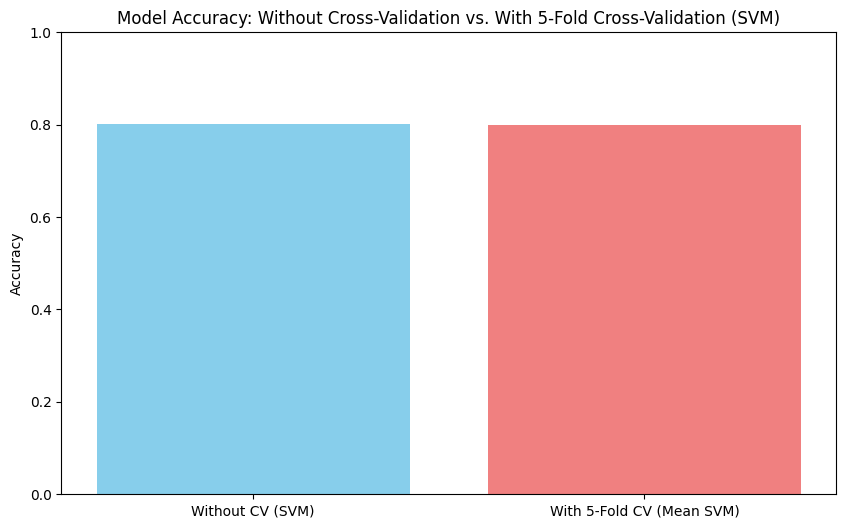

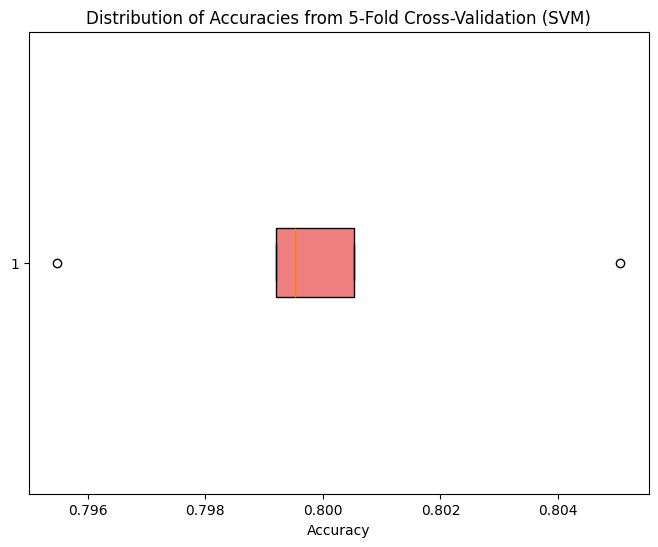

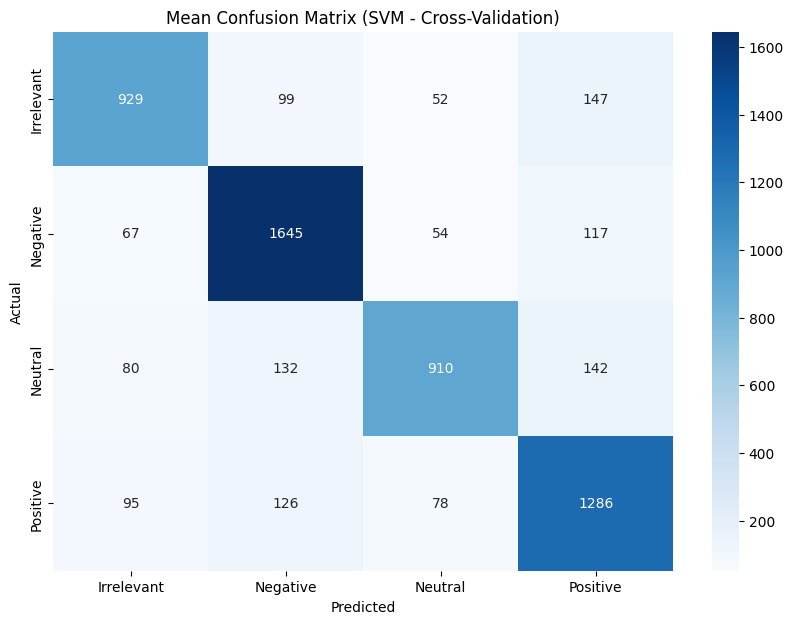

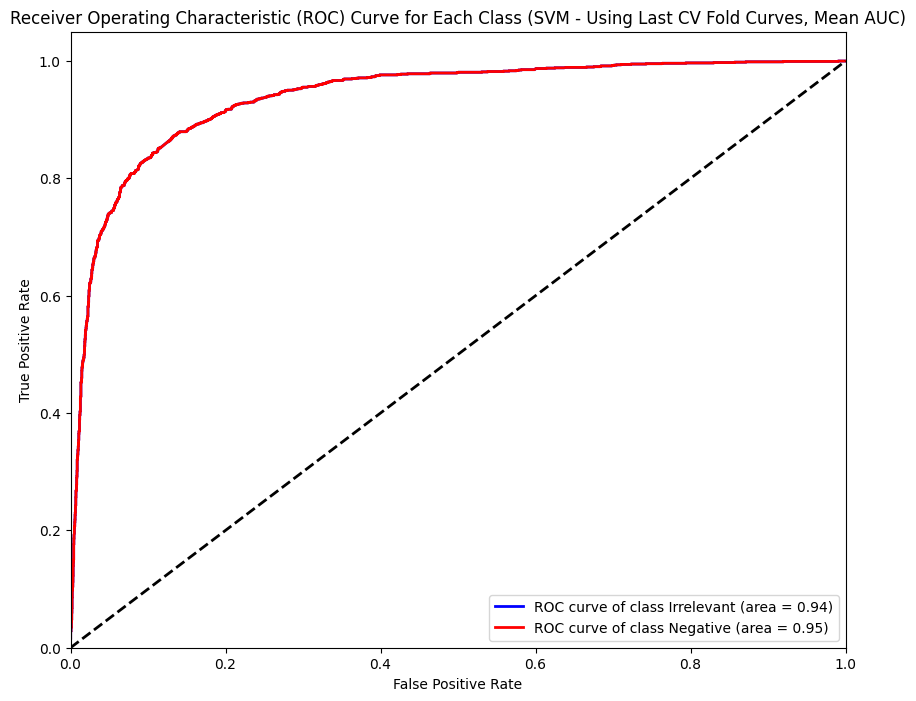

In [34]:
# Visualization of Comparison (SVM)

labels_svm = ['Without CV (SVM)', 'With 5-Fold CV (Mean SVM)']

# You need to re-run the SVM without CV part to get y_pred_svm and the accuracy
# or ensure the previous code block was run to have these variables available.
# Let's re-calculate the accuracy without CV to be safe.
svm_clf_nocv_eval = SVC(kernel='linear', random_state=42)
svm_clf_nocv_eval.fit(X_train, y_train)
y_pred_svm_nocv = svm_clf_nocv_eval.predict(X_test)
accuracy_svm_nocv = accuracy_score(y_test, y_pred_svm_nocv)

# The mean cross-validation accuracy for SVM was stored in 'np.mean(fold_accuracies_svm)'
accuracies_svm = [accuracy_svm_nocv, np.mean(fold_accuracies_svm)]

# Create a bar plot to compare accuracies
plt.figure(figsize=(10, 6))
plt.bar(labels_svm, accuracies_svm, color=['skyblue', 'lightcoral'])
plt.ylabel('Accuracy')
plt.title('Model Accuracy: Without Cross-Validation vs. With 5-Fold Cross-Validation (SVM)')
plt.ylim([0, 1]) # Set y-axis limits to represent accuracy range
plt.show()

# Visualize the distribution of accuracies from cross-validation for SVM
plt.figure(figsize=(8, 6))
plt.boxplot(fold_accuracies_svm, vert=False, patch_artist=True, boxprops=dict(facecolor='lightcoral'))
plt.xlabel('Accuracy')
plt.title('Distribution of Accuracies from 5-Fold Cross-Validation (SVM)')
plt.show()

# Visualize the Confusion Matrix (derived from the mean CV confusion matrix)
plt.figure(figsize=(10, 7))
sns.heatmap(mean_cm_svm, annot=True, fmt="d", cmap="Blues",
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Mean Confusion Matrix (SVM - Cross-Validation)")
plt.show()

# ROC Curve visualization (using mean AUCs, but still plotting from the last fold for curves)
# Re-calculate the last fold's ROC data if needed for plotting
# Let's use the last computed fpr_fold, tpr_fold, roc_auc_fold from the CV loop
# Note: This assumes the last fold's computation was successful.
# A more robust approach would store fpr and tpr for each fold and average them.

if 'fpr_fold' in locals() and 'tpr_fold' in locals(): # Check if last fold's ROC was computed
    plt.figure(figsize=(10, 8))
    colors = ['blue', 'red', 'green', 'purple'] # Adjust colors based on number of classes
    n_classes_svm = len(label_encoder.classes_)
    for i in range(n_classes_svm):
        # Check if ROC was computed for this class in the last fold
        if i < len(label_encoder.classes_) and i in locals().get('fpr_fold', {}) and i in locals().get('tpr_fold', {}):
             # Use mean AUC for the label, but plot the last fold's curve
             mean_auc_for_class = np.mean(fold_roc_aucs_svm[i]) if fold_roc_aucs_svm[i] else 0
             plt.plot(locals()['fpr_fold'], locals()['tpr_fold'], color=colors[i % len(colors)], lw=2,
                      label='ROC curve of class {0} (area = {1:0.2f})'.format(label_encoder.classes_[i], mean_auc_for_class))

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve for Each Class (SVM - Using Last CV Fold Curves, Mean AUC)')
    plt.legend(loc="lower right")
    plt.show()
else:
    print("\nROC curves visualization skipped for SVM CV.")


Classification Report (KNN - Without CV):
              precision    recall  f1-score   support

  Irrelevant       0.81      0.92      0.86      1197
    Negative       0.90      0.92      0.91      1888
     Neutral       0.93      0.89      0.91      1273
    Positive       0.94      0.86      0.90      1608

    accuracy                           0.90      5966
   macro avg       0.90      0.90      0.90      5966
weighted avg       0.90      0.90      0.90      5966


Confusion Matrix (KNN - Without CV):


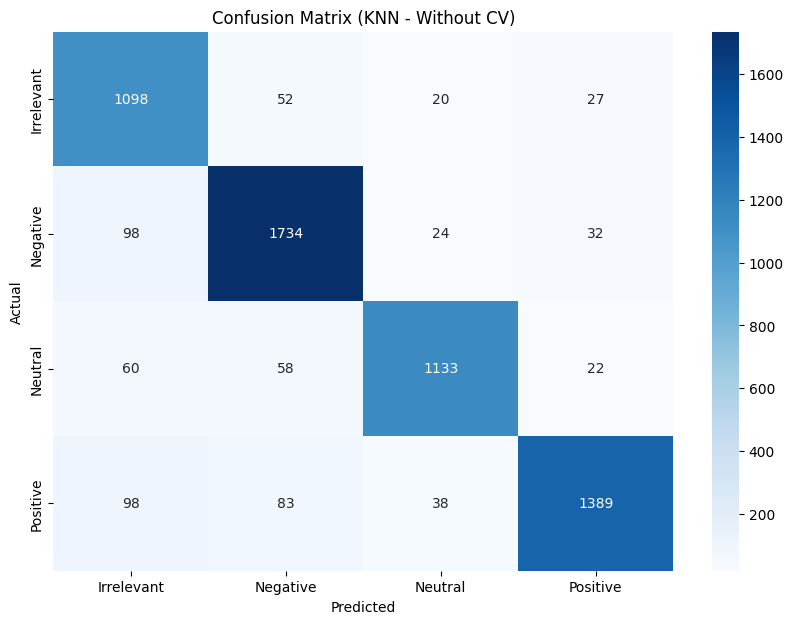

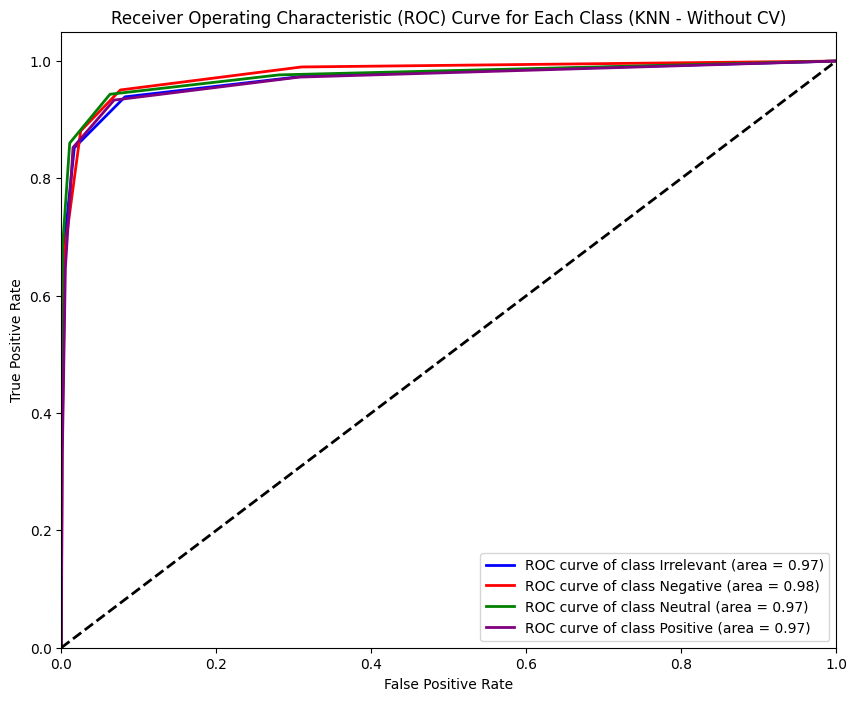

In [35]:
# KNN
# Without cross validation

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, accuracy_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Step 5: Train KNN and evaluate (without cross-validation)
# Initialize a KNN classifier model
# You can choose the number of neighbors (n_neighbors) - let's start with 5
knn_clf = KNeighborsClassifier(n_neighbors=5)

# Train the model on the training data
knn_clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred_knn = knn_clf.predict(X_test)

# Classification Report
print("Classification Report (KNN - Without CV):")
print(classification_report(y_test, y_pred_knn, target_names=label_encoder.classes_))

# Confusion Matrix
print("\nConfusion Matrix (KNN - Without CV):")
cm_knn = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(10, 7))
sns.heatmap(
    cm_knn,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=label_encoder.classes_,
    yticklabels=label_encoder.classes_,
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (KNN - Without CV)")
plt.show()

# Compute ROC curve and ROC area for each class (without cross-validation)

# Binarize the true labels
y_test_binarized_knn = label_binarize(y_test, classes=np.arange(len(label_encoder.classes_)))
n_classes_knn = y_test_binarized_knn.shape[1]

# Get predicted probabilities from the KNN model
# predict_proba is needed for ROC curve
y_score_knn = knn_clf.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr_knn = dict()
tpr_knn = dict()
roc_auc_knn = dict()
for i in range(n_classes_knn):
    # Compute ROC curve for class i using binarized true labels and predicted probabilities for class i
    fpr_knn[i], tpr_knn[i], _ = roc_curve(y_test_binarized_knn[:, i], y_score_knn[:, i])
    roc_auc_knn[i] = auc(fpr_knn[i], tpr_knn[i])

# Plot ROC curves for each class
plt.figure(figsize=(10, 8))
colors = ['blue', 'red', 'green', 'purple'] # Adjust colors based on number of classes
for i, color in zip(range(n_classes_knn), colors):
    # Ensure the class exists
    if i < len(label_encoder.classes_):
        plt.plot(fpr_knn[i], tpr_knn[i], color=color, lw=2,
                 label='ROC curve of class {0} (area = {1:0.2f})'.format(label_encoder.classes_[i], roc_auc_knn[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Each Class (KNN - Without CV)')
plt.legend(loc="lower right")
plt.show()


Performing 5-Fold Cross-Validation with KNN:
Fold 1/5
  Training complete.
  Accuracy for Fold 1: 0.8890378813275226
Fold 2/5
  Training complete.
  Accuracy for Fold 2: 0.8887026483405968
Fold 3/5
  Training complete.
  Accuracy for Fold 3: 0.8925578276902447
Fold 4/5
  Training complete.
  Accuracy for Fold 4: 0.891552128729467
Fold 5/5
  Training complete.
  Accuracy for Fold 5: 0.890360435875943

Cross-validation accuracies per fold (KNN): [0.8890378813275226, 0.8887026483405968, 0.8925578276902447, 0.891552128729467, 0.890360435875943]
Mean cross-validation accuracy (KNN): 0.8904421843927548
Standard deviation of cross-validation accuracies (KNN): 0.0014637389513565975

Mean Confusion Matrix across folds (KNN):
[[1112   45   33   37]
 [  83 1714   43   42]
 [  63   61 1109   30]
 [  82   74   54 1375]]

Mean Cross-validation AUC per class (KNN):
  Class Irrelevant (Area = 0.97)
  Class Negative (Area = 0.97)
  Class Neutral (Area = 0.97)
  Class Positive (Area = 0.97)


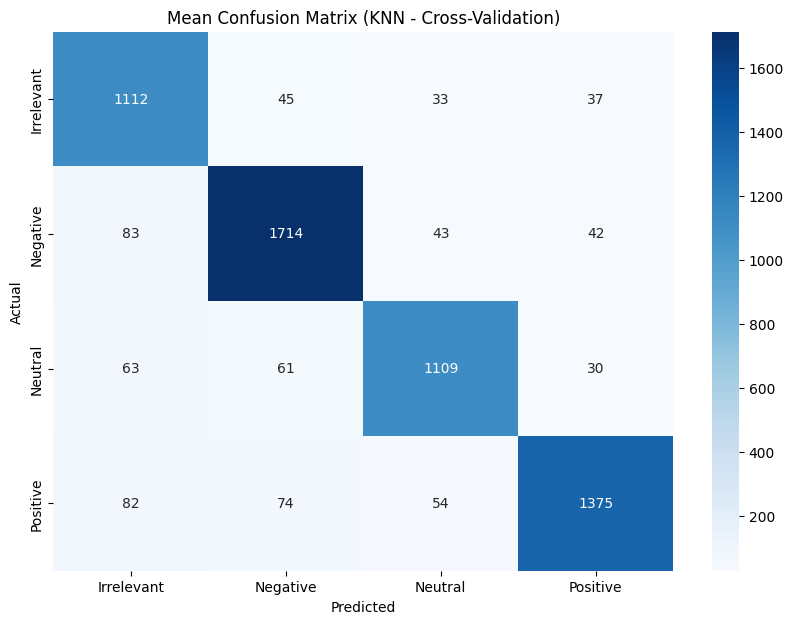

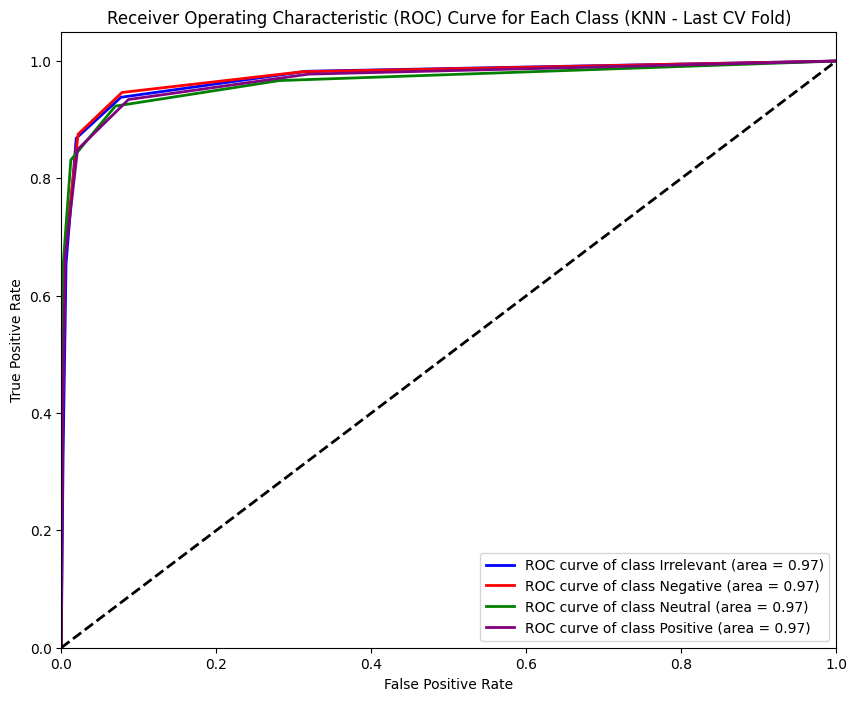

In [36]:
# KNN
# With cross validation

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import KFold
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import label_binarize
from sklearn.base import clone

# Step 5: Train KNN and evaluate (With cross-validation)
# Initialize a KNN classifier model
# We will use n_neighbors=5 as in the previous cell for consistency
knn_clf_cv = KNeighborsClassifier(n_neighbors=5)

# Step 6: Cross-validation with KNN

# Define the number of folds
n_splits_knn = 5  # Using 5-Fold

# Initialize KFold cross-validation
kf_knn = KFold(n_splits=n_splits_knn, shuffle=True, random_state=42)

fold_accuracies_knn = []
fold_cms_knn = []
fold_roc_aucs_knn = {i: [] for i in range(len(label_encoder.classes_))} # Store AUCs per class

print(f"\nPerforming {n_splits_knn}-Fold Cross-Validation with KNN:")

# Variables to store data for the last fold's ROC plot
last_fold_y_test_binarized = None
last_fold_y_score = None
last_fold_label_encoder_classes = None

# Iterate through each fold
for fold, (train_index, test_index) in enumerate(kf_knn.split(X, y)):
    print(f"Fold {fold+1}/{n_splits_knn}")

    # Split data for the current fold
    X_train_fold_knn, X_test_fold_knn = X[train_index], X[test_index]
    y_train_fold_knn, y_test_fold_knn = y.iloc[train_index], y.iloc[test_index]

    # Initialize a new KNN model for each fold
    knn_fold = clone(knn_clf_cv) # Clone the model

    # Fit the model
    print("  Training complete.")
    knn_fold.fit(X_train_fold_knn, y_train_fold_knn)

    # Evaluate the model on the test data for the current fold
    y_pred_fold_knn = knn_fold.predict(X_test_fold_knn)
    fold_accuracy_knn = accuracy_score(y_test_fold_knn, y_pred_fold_knn)
    print(f"  Accuracy for Fold {fold+1}: {fold_accuracy_knn}")
    fold_accuracies_knn.append(fold_accuracy_knn)

    # Compute Confusion Matrix for the fold
    cm_fold_knn = confusion_matrix(y_test_fold_knn, y_pred_fold_knn)
    fold_cms_knn.append(cm_fold_knn)

    # Compute ROC and AUC for the fold
    # Binarize the true labels for the current fold
    y_test_binarized_fold_knn = label_binarize(y_test_fold_knn, classes=np.arange(len(label_encoder.classes_)))

    # Get predicted probabilities for the current fold
    y_score_fold_knn = knn_fold.predict_proba(X_test_fold_knn)

    # Compute ROC curve and AUC for each class in the current fold
    roc_auc_fold = {} # Define roc_auc_fold inside the loop
    for i in range(len(label_encoder.classes_)):
        if i < y_test_binarized_fold_knn.shape[1] and i < y_score_fold_knn.shape[1]:
             try:
                 # Check if the class exists in the true labels for this fold
                 if np.sum(y_test_binarized_fold_knn[:, i]) > 0:
                     fpr_fold, tpr_fold, _ = roc_curve(y_test_binarized_fold_knn[:, i], y_score_fold_knn[:, i])
                     auc_fold = auc(fpr_fold, tpr_fold)
                     fold_roc_aucs_knn[i].append(auc_fold)
                     roc_auc_fold[i] = auc_fold # Store AUC for the last fold
                 else:
                     pass # Do not append AUC if class is missing
             except ValueError as e:
                  print(f"  Error computing ROC/AUC for class {label_encoder.classes_[i]} in fold {fold+1}: {e}")
                  pass # Skip if computation fails

    # Store data for the last fold's ROC plot
    if fold == n_splits_knn - 1:
        last_fold_y_test_binarized = y_test_binarized_fold_knn
        last_fold_y_score = y_score_fold_knn
        last_fold_label_encoder_classes = label_encoder.classes_


# Print the results of cross-validation
print("\nCross-validation accuracies per fold (KNN):", fold_accuracies_knn)
print("Mean cross-validation accuracy (KNN):", np.mean(fold_accuracies_knn))
print("Standard deviation of cross-validation accuracies (KNN):", np.std(fold_accuracies_knn))


# Average the confusion matrices (optional, but can give a sense of average performance)
mean_cm_knn = np.mean(fold_cms_knn, axis=0).astype(int)
print("\nMean Confusion Matrix across folds (KNN):")
print(mean_cm_knn)

# Print mean AUC for each class
print("\nMean Cross-validation AUC per class (KNN):")
for i in range(len(label_encoder.classes_)):
    if fold_roc_aucs_knn[i]: # Only print if AUCs were collected for this class
        print(f"  Class {label_encoder.classes_[i]} (Area = {np.mean(fold_roc_aucs_knn[i]):0.2f})")
    else:
        print(f"  Class {label_encoder.classes_[i]}: No AUC computed (class not present in all folds)")


# Confusion matrix visualization (using the mean matrix or the last fold's matrix)
plt.figure(figsize=(10, 7))
sns.heatmap(
    mean_cm_knn, # Using the mean confusion matrix
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=label_encoder.classes_,
    yticklabels=label_encoder.classes_,
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Mean Confusion Matrix (KNN - Cross-Validation)")
plt.show()

# ROC curve visualization (Plotting ROC from the last fold as a representative)
if last_fold_y_test_binarized is not None and last_fold_y_score is not None:
    plt.figure(figsize=(10, 8))
    colors = ['blue', 'red', 'green', 'purple'] # Adjust colors based on number of classes
    n_classes_knn = last_fold_y_test_binarized.shape[1]

    fpr_knn_last_fold = dict()
    tpr_knn_last_fold = dict()
    roc_auc_knn_last_fold = dict()

    for i in range(n_classes_knn):
        if i < last_fold_y_test_binarized.shape[1] and i < last_fold_y_score.shape[1]:
             try:
                 if np.sum(last_fold_y_test_binarized[:, i]) > 0:
                     fpr_knn_last_fold[i], tpr_knn_last_fold[i], _ = roc_curve(last_fold_y_test_binarized[:, i], last_fold_y_score[:, i])
                     roc_auc_knn_last_fold[i] = auc(fpr_knn_last_fold[i], tpr_knn_last_fold[i])
                     plt.plot(fpr_knn_last_fold[i], tpr_knn_last_fold[i], color=colors[i % len(colors)], lw=2,
                              label='ROC curve of class {0} (area = {1:0.2f})'.format(last_fold_label_encoder_classes[i], roc_auc_knn_last_fold[i]))
             except ValueError as e:
                  print(f"  Error computing ROC/AUC for class {last_fold_label_encoder_classes[i]} in last fold for plotting: {e}")
                  pass


    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve for Each Class (KNN - Last CV Fold)')
    plt.legend(loc="lower right")
    plt.show()
else:
    print("\nROC curves could not be plotted for the last KNN CV fold.")


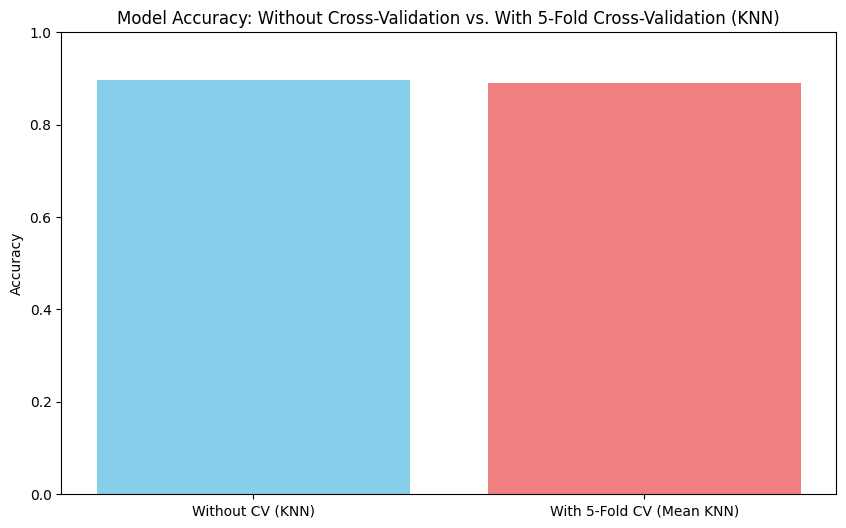

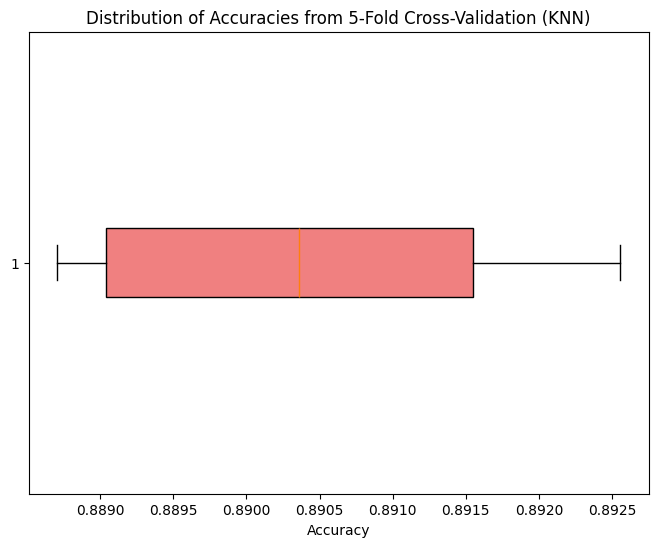

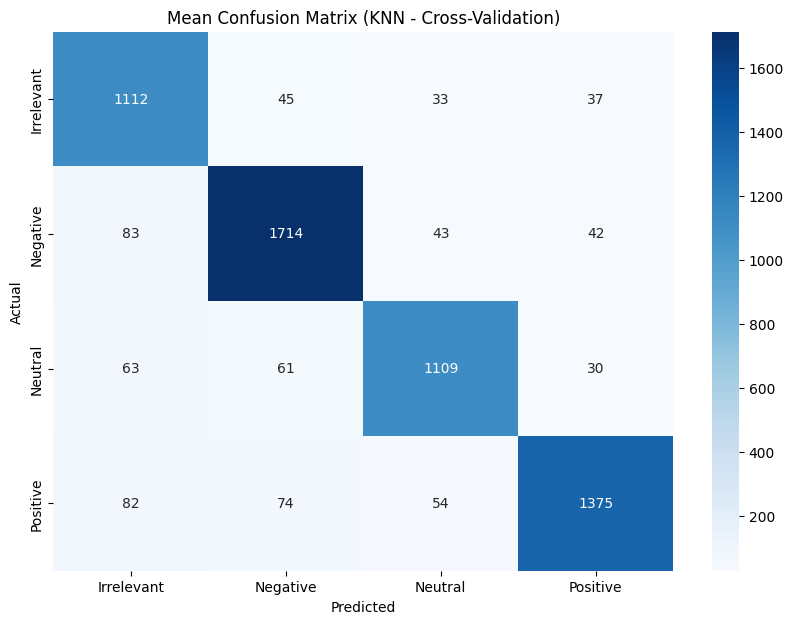

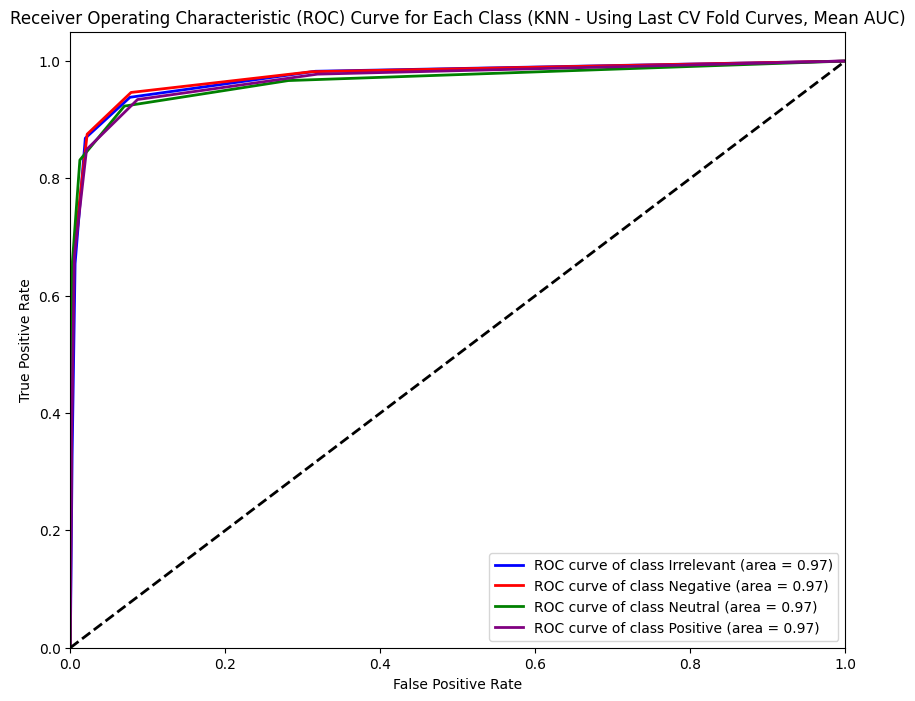

In [37]:
# Visualization of Comparison (KNN)

labels_knn = ['Without CV (KNN)', 'With 5-Fold CV (Mean KNN)']

knn_clf_nocv_eval = KNeighborsClassifier(n_neighbors=5)
knn_clf_nocv_eval.fit(X_train, y_train)
y_pred_knn_nocv = knn_clf_nocv_eval.predict(X_test)
accuracy_knn_nocv = accuracy_score(y_test, y_pred_knn_nocv)


# The mean cross-validation accuracy for KNN was stored in 'np.mean(fold_accuracies_knn)'
accuracies_knn = [accuracy_knn_nocv, np.mean(fold_accuracies_knn)]

# Create a bar plot to compare accuracies
plt.figure(figsize=(10, 6))
plt.bar(labels_knn, accuracies_knn, color=['skyblue', 'lightcoral'])
plt.ylabel('Accuracy')
plt.title('Model Accuracy: Without Cross-Validation vs. With 5-Fold Cross-Validation (KNN)')
plt.ylim([0, 1]) # Set y-axis limits to represent accuracy range
plt.show()

# Visualize the distribution of accuracies from cross-validation for KNN
plt.figure(figsize=(8, 6))
plt.boxplot(fold_accuracies_knn, vert=False, patch_artist=True, boxprops=dict(facecolor='lightcoral'))
plt.xlabel('Accuracy')
plt.title('Distribution of Accuracies from 5-Fold Cross-Validation (KNN)')
plt.show()

# Visualize the Confusion Matrix (derived from the mean CV confusion matrix)
plt.figure(figsize=(10, 7))
sns.heatmap(mean_cm_knn, annot=True, fmt="d", cmap="Blues",
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Mean Confusion Matrix (KNN - Cross-Validation)")
plt.show()

# ROC Curve visualization (using mean AUCs, but still plotting from the last fold for curves)
# Re-calculate the last fold's ROC data if needed for plotting
# Let's use the last computed fpr_fold, tpr_fold, roc_auc_fold from the CV loop
# Note: This assumes the last fold's computation was successful.
# A more robust approach would store fpr and tpr for each fold and average them.

if last_fold_y_test_binarized is not None and last_fold_y_score is not None:
    plt.figure(figsize=(10, 8))
    colors = ['blue', 'red', 'green', 'purple'] # Adjust colors based on number of classes
    n_classes_knn = last_fold_y_test_binarized.shape[1]

    for i in range(n_classes_knn):
        if i < last_fold_y_test_binarized.shape[1] and i < last_fold_y_score.shape[1]:
             try:
                 if np.sum(last_fold_y_test_binarized[:, i]) > 0:
                     fpr_fold, tpr_fold, _ = roc_curve(last_fold_y_test_binarized[:, i], last_fold_y_score[:, i])
                     # Use mean AUC for the label, but plot the last fold's curve
                     mean_auc_for_class = np.mean(fold_roc_aucs_knn[i]) if fold_roc_aucs_knn[i] else 0
                     plt.plot(fpr_fold, tpr_fold, color=colors[i % len(colors)], lw=2,
                              label='ROC curve of class {0} (area = {1:0.2f})'.format(last_fold_label_encoder_classes[i], mean_auc_for_class))
             except ValueError as e:
                  print(f"  Error computing ROC/AUC for class {last_fold_label_encoder_classes[i]} in last fold for plotting: {e}")
                  pass


    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve for Each Class (KNN - Using Last CV Fold Curves, Mean AUC)')
    plt.legend(loc="lower right")
    plt.show()
else:
    print("\nROC curves visualization skipped for KNN CV.")


Classification Report (Gradient Boosting - Without CV):
              precision    recall  f1-score   support

  Irrelevant       0.74      0.32      0.45      1197
    Negative       0.52      0.86      0.65      1888
     Neutral       0.67      0.41      0.51      1273
    Positive       0.58      0.57      0.57      1608

    accuracy                           0.58      5966
   macro avg       0.63      0.54      0.54      5966
weighted avg       0.61      0.58      0.56      5966


Confusion Matrix (Gradient Boosting - Without CV):


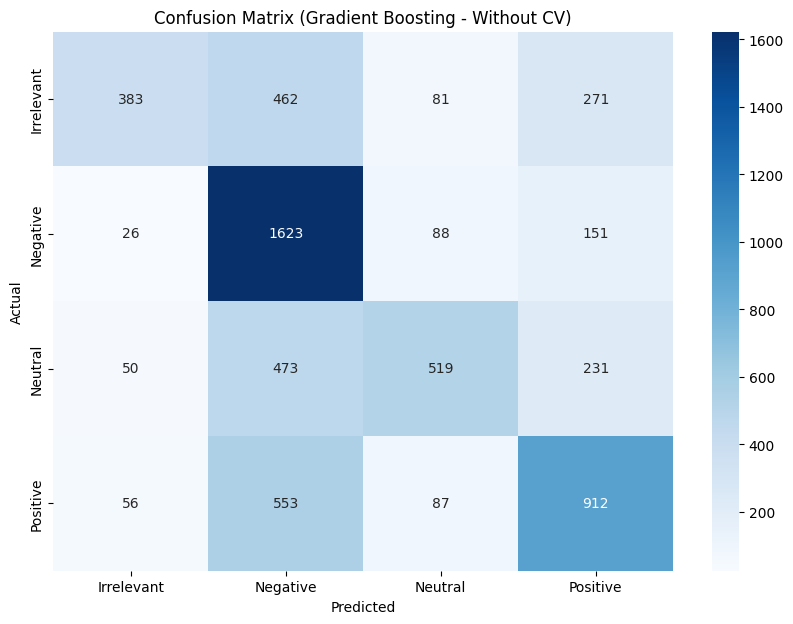

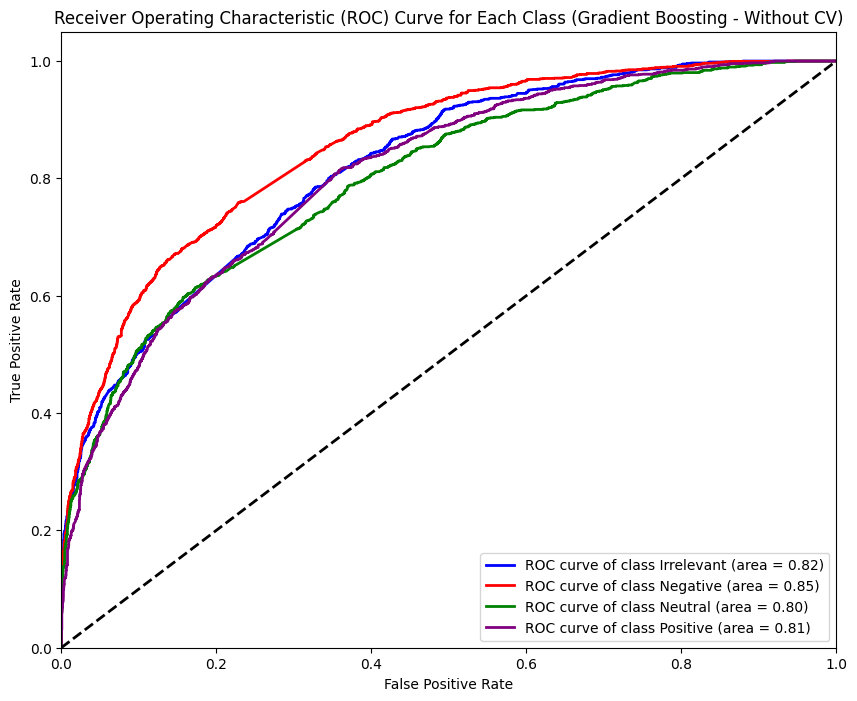

In [38]:
# Gradient Boosting
# Without cross validation

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, accuracy_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Step 5: Train Gradient Boosting and evaluate (without cross-validation)
# Initialize a Gradient Boosting Classifier model
# You can tune hyperparameters like n_estimators, learning_rate, max_depth, etc.
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model on the training data
gb_clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred_gb = gb_clf.predict(X_test)

# Classification Report
print("Classification Report (Gradient Boosting - Without CV):")
print(classification_report(y_test, y_pred_gb, target_names=label_encoder.classes_))

# Confusion Matrix
print("\nConfusion Matrix (Gradient Boosting - Without CV):")
cm_gb = confusion_matrix(y_test, y_pred_gb)

plt.figure(figsize=(10, 7))
sns.heatmap(
    cm_gb,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=label_encoder.classes_,
    yticklabels=label_encoder.classes_,
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Gradient Boosting - Without CV)")
plt.show()

# Compute ROC curve and ROC area for each class (without cross-validation)

# Binarize the true labels
y_test_binarized_gb = label_binarize(y_test, classes=np.arange(len(label_encoder.classes_)))
n_classes_gb = y_test_binarized_gb.shape[1]

# Get predicted probabilities from the Gradient Boosting model
# predict_proba is needed for ROC curve
y_score_gb = gb_clf.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr_gb = dict()
tpr_gb = dict()
roc_auc_gb = dict()
for i in range(n_classes_gb):
    # Compute ROC curve for class i using binarized true labels and predicted probabilities for class i
    fpr_gb[i], tpr_gb[i], _ = roc_curve(y_test_binarized_gb[:, i], y_score_gb[:, i])
    roc_auc_gb[i] = auc(fpr_gb[i], tpr_gb[i])

# Plot ROC curves for each class
plt.figure(figsize=(10, 8))
colors = ['blue', 'red', 'green', 'purple'] # Adjust colors based on number of classes
for i, color in zip(range(n_classes_gb), colors):
    # Ensure the class exists
    if i < len(label_encoder.classes_):
        plt.plot(fpr_gb[i], tpr_gb[i], color=color, lw=2,
                 label='ROC curve of class {0} (area = {1:0.2f})'.format(label_encoder.classes_[i], roc_auc_gb[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Each Class (Gradient Boosting - Without CV)')
plt.legend(loc="lower right")
plt.show()


Performing 5-Fold Cross-Validation with Gradient Boosting:
Fold 1/5
  Training complete.
  Accuracy for Fold 1: 0.5760978880321823


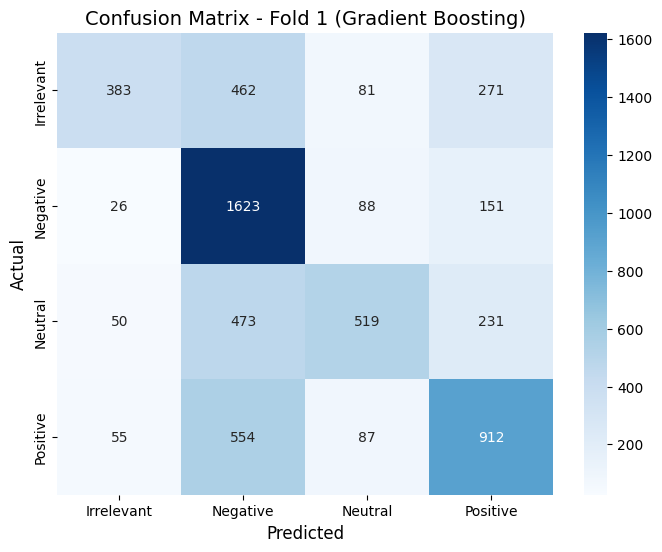

  ROC AUC per class for Fold 1: {0: np.float64(0.8201969416446687), 1: np.float64(0.8545553834756153), 2: np.float64(0.7992100685130652), 3: np.float64(0.809028943168508)}


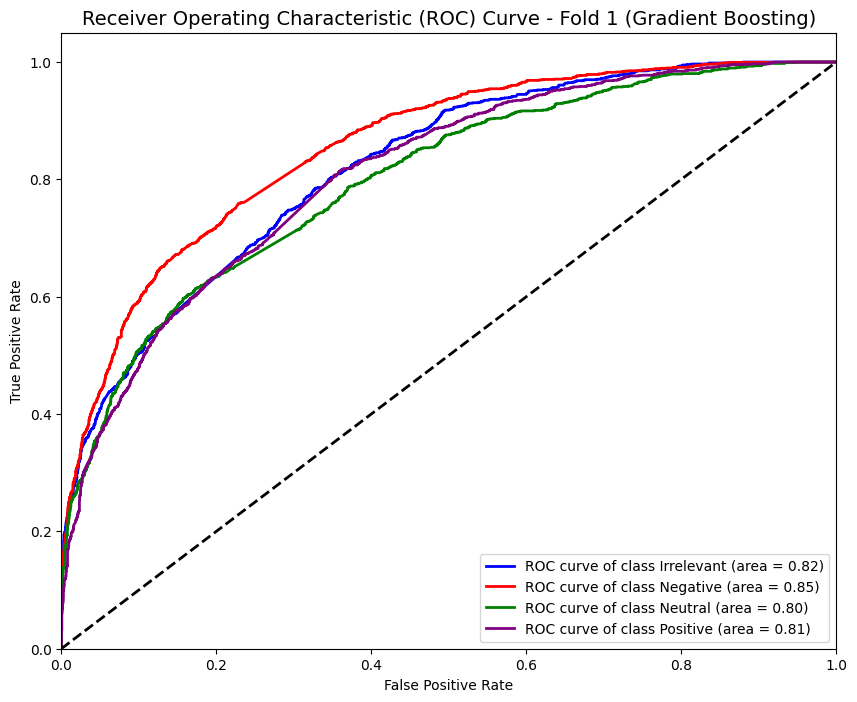

Fold 2/5
  Training complete.
  Accuracy for Fold 2: 0.5814616158229969


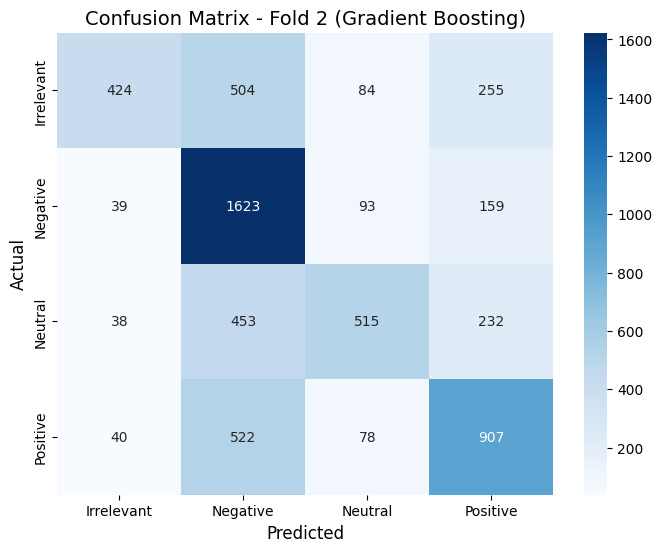

  ROC AUC per class for Fold 2: {0: np.float64(0.8260719127295888), 1: np.float64(0.8468698714001162), 2: np.float64(0.787530427467478), 3: np.float64(0.8256113453789264)}


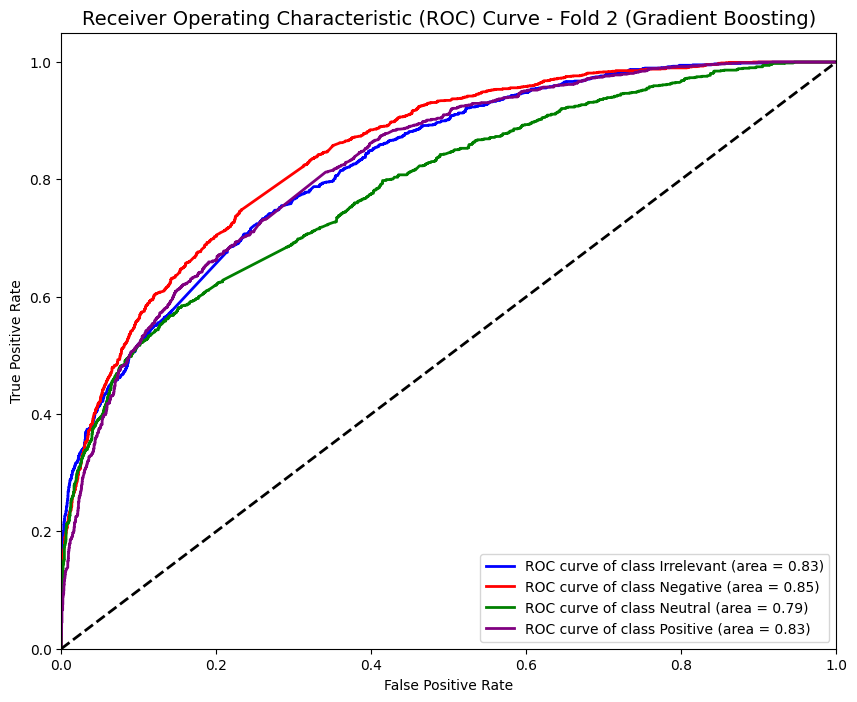

Fold 3/5
  Training complete.
  Accuracy for Fold 3: 0.5663761314113309


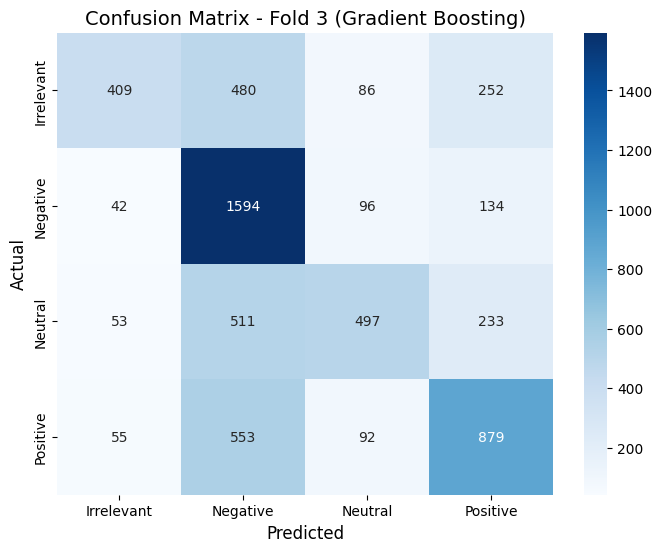

  ROC AUC per class for Fold 3: {0: np.float64(0.8232081397094597), 1: np.float64(0.8533136616735942), 2: np.float64(0.7835055366178992), 3: np.float64(0.8148749839939611)}


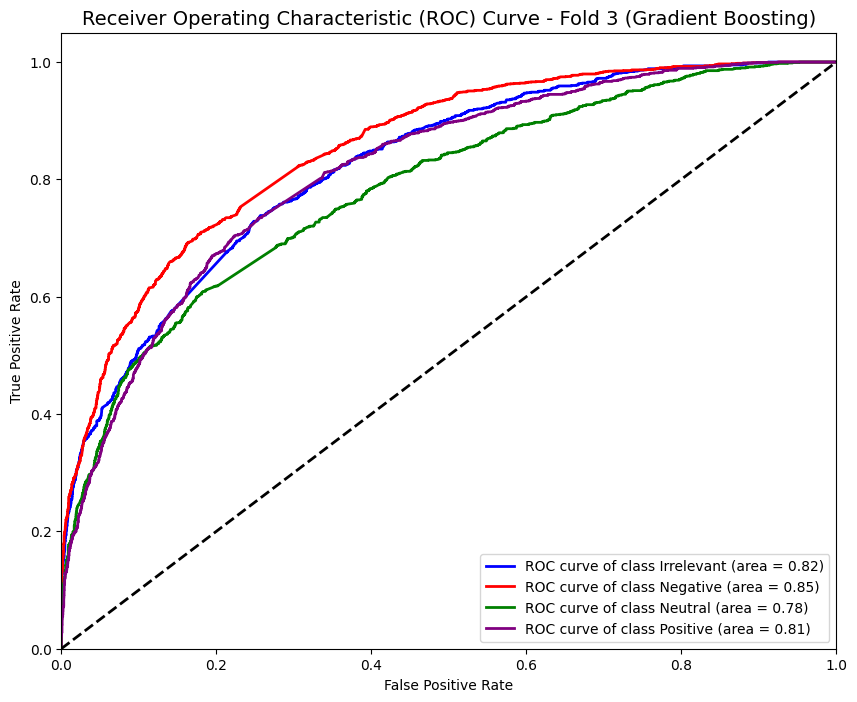

Fold 4/5
  Training complete.
  Accuracy for Fold 4: 0.5767683540060342


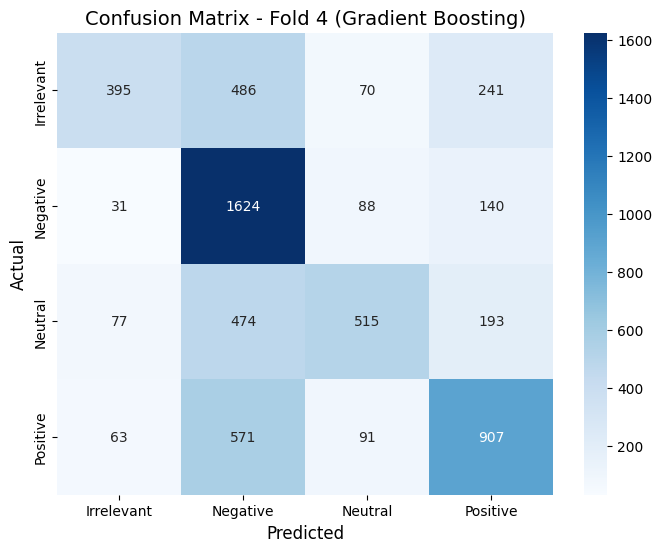

  ROC AUC per class for Fold 4: {0: np.float64(0.8226261587514023), 1: np.float64(0.8519052158419123), 2: np.float64(0.7923973100074196), 3: np.float64(0.8120887934661635)}


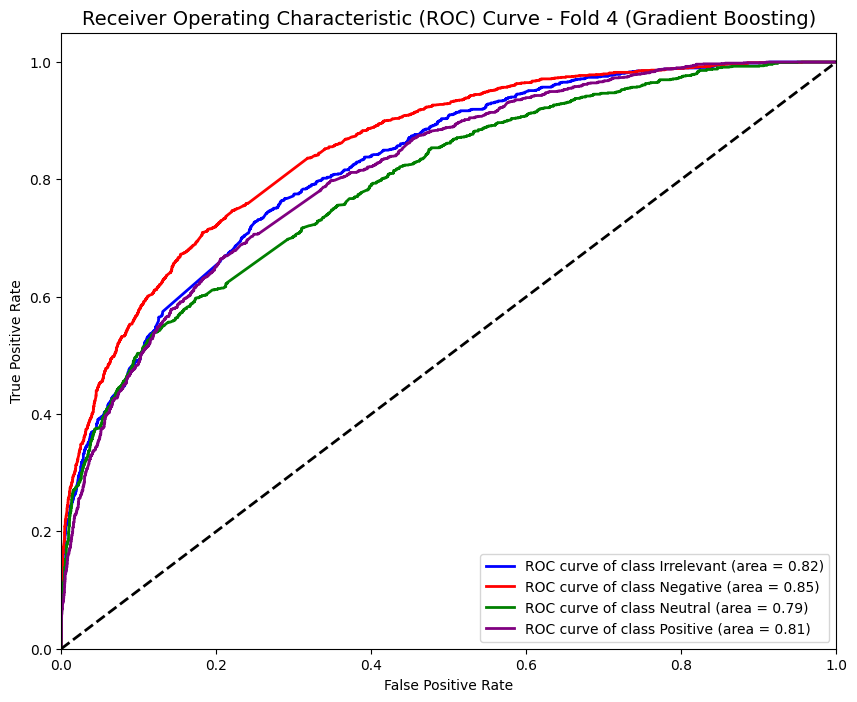

Fold 5/5
  Training complete.
  Accuracy for Fold 5: 0.5664710813076278


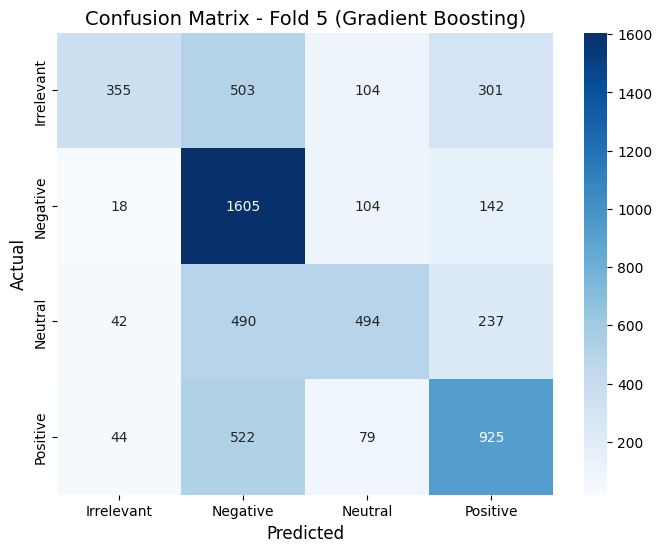

  ROC AUC per class for Fold 5: {0: np.float64(0.8120854891350289), 1: np.float64(0.8494767239541533), 2: np.float64(0.7753680733556887), 3: np.float64(0.8154188677057745)}


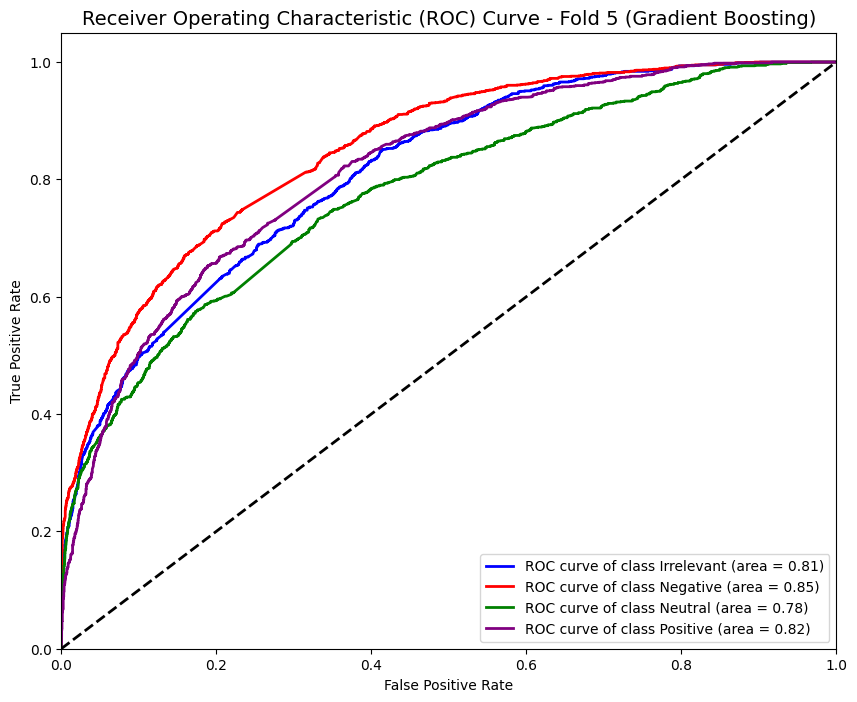


Cross-validation accuracies per fold (Gradient Boosting): [0.5760978880321823, 0.5814616158229969, 0.5663761314113309, 0.5767683540060342, 0.5664710813076278]
Mean cross-validation accuracy (Gradient Boosting): 0.5734350141160344
Standard deviation of cross-validation accuracies (Gradient Boosting): 0.006015855258839637

Mean Confusion Matrix across folds (Gradient Boosting):
[[ 393  487   85  264]
 [  31 1613   93  145]
 [  52  480  508  225]
 [  51  544   85  906]]

Mean Cross-validation AUC per class (Gradient Boosting):
  Class Irrelevant (Area = 0.82)
  Class Negative (Area = 0.85)
  Class Neutral (Area = 0.79)
  Class Positive (Area = 0.82)


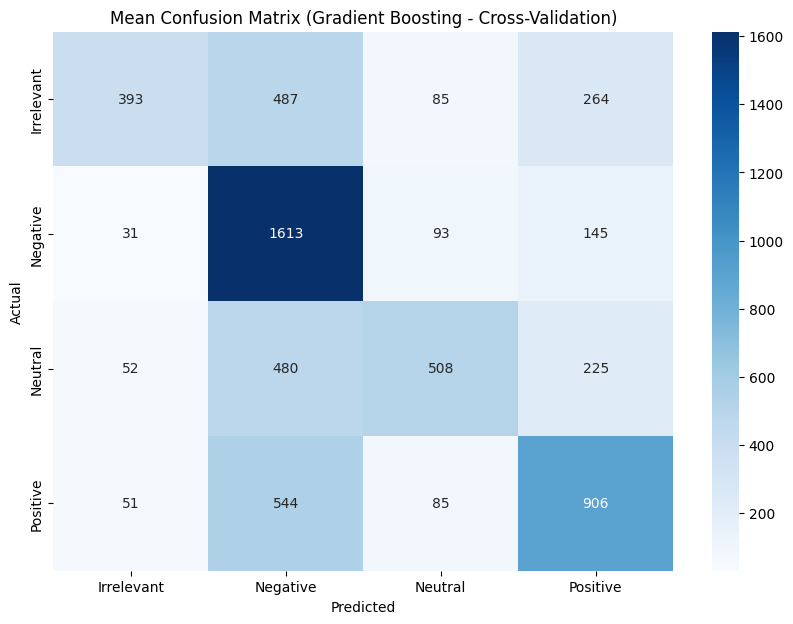


ROC curves could not be plotted for the last Gradient Boosting CV fold.


In [39]:
# Gradient Boosting
# With cross validation

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import KFold
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import label_binarize
from sklearn.base import clone

# Step 5: Train Gradient Boosting and evaluate (With cross-validation)
# Initialize a Gradient Boosting Classifier model
# Use the same hyperparameters as in the without CV cell for consistency
gb_clf_cv = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Step 6: Cross-validation with Gradient Boosting

# Define the number of folds
n_splits_gb = 5  # Using 5-Fold

# Initialize KFold cross-validation
kf_gb = KFold(n_splits=n_splits_gb, shuffle=True, random_state=42)

fold_accuracies_gb = []
fold_cms_gb = []
fold_roc_aucs_gb = {i: [] for i in range(len(label_encoder.classes_))} # Store AUCs per class

print(f"\nPerforming {n_splits_gb}-Fold Cross-Validation with Gradient Boosting:")

# Variables to store data for the last fold's ROC plot
last_fold_y_test_binarized_gb = None
last_fold_y_score_gb = None
last_fold_label_encoder_classes_gb = None

# Iterate through each fold
for fold, (train_index, test_index) in enumerate(kf_gb.split(X, y)):
    print(f"Fold {fold+1}/{n_splits_gb}")

    # Split data for the current fold
    X_train_fold_gb, X_test_fold_gb = X[train_index], X[test_index]
    y_train_fold_gb, y_test_fold_gb = y.iloc[train_index], y.iloc[test_index]

    # Initialize a new Gradient Boosting model for each fold
    gb_fold = clone(gb_clf_cv) # Clone the model

    # Fit the model
    print("  Training complete.")
    gb_fold.fit(X_train_fold_gb, y_train_fold_gb)

    # Evaluate the model on the test data for the current fold
    y_pred_fold_gb = gb_fold.predict(X_test_fold_gb)
    fold_accuracy_gb = accuracy_score(y_test_fold_gb, y_pred_fold_gb)
    print(f"  Accuracy for Fold {fold+1}: {fold_accuracy_gb}")
    fold_accuracies_gb.append(fold_accuracy_gb)

    # Compute Confusion Matrix for the fold
    cm_fold_gb = confusion_matrix(y_test_fold_gb, y_pred_fold_gb)
    fold_cms_gb.append(cm_fold_gb)

    # --- Visualize Confusion Matrix for the current fold ---
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_fold_gb, annot=True, fmt='d', cmap='Blues',
                xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_,
                annot_kws={'size': 10}) # Adjust annotation font size
    plt.xlabel('Predicted', fontsize=12) # Adjust xlabel font size
    plt.ylabel('Actual', fontsize=12) # Adjust ylabel font size
    plt.title(f'Confusion Matrix - Fold {fold+1} (Gradient Boosting)', fontsize=14) # Adjust title font size
    plt.show()

    # Compute ROC and AUC for the fold
    # Binarize the true labels for the current fold
    y_test_binarized_fold_gb = label_binarize(y_test_fold_gb, classes=np.arange(len(label_encoder.classes_)))

    # Get predicted probabilities for the current fold
    y_score_fold_gb = gb_fold.predict_proba(X_test_fold_gb)

    # Compute ROC curve and AUC for each class in the current fold
    roc_auc_fold_gb = {} # Define roc_auc_fold_gb inside the loop
    plt.figure(figsize=(10, 8))
    colors = ['blue', 'red', 'green', 'purple'] # Ensure enough colors

    for i in range(len(label_encoder.classes_)):
        if i < y_test_binarized_fold_gb.shape[1] and i < y_score_fold_gb.shape[1]:
             try:
                 # Check if the class exists in the true labels for this fold
                 if np.sum(y_test_binarized_fold_gb[:, i]) > 0:
                     fpr_fold_gb, tpr_fold_gb, _ = roc_curve(y_test_binarized_fold_gb[:, i], y_score_fold_gb[:, i])
                     auc_fold_gb = auc(fpr_fold_gb, tpr_fold_gb)
                     fold_roc_aucs_gb[i].append(auc_fold_gb)
                     roc_auc_fold_gb[i] = auc_fold_gb # Store AUC for the last fold

                     # --- Visualize ROC Curve for the current fold ---
                     plt.plot(fpr_fold_gb, tpr_fold_gb, color=colors[i % len(colors)], lw=2,
                              label='ROC curve of class {0} (area = {1:0.2f})'.format(label_encoder.classes_[i], auc_fold_gb))
                 else:
                     pass # Do not append AUC if class is missing
             except ValueError as e:
                  print(f"  Error computing ROC/AUC for class {label_encoder.classes_[i]} in fold {fold+1}: {e}")
                  pass # Skip if computation fails


    print(f"  ROC AUC per class for Fold {fold+1}: {roc_auc_fold_gb}")

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) Curve - Fold {fold+1} (Gradient Boosting)', fontsize=14)
    plt.legend(loc="lower right")
    plt.show()


# Print the results of cross-validation
print("\nCross-validation accuracies per fold (Gradient Boosting):", fold_accuracies_gb)
print("Mean cross-validation accuracy (Gradient Boosting):", np.mean(fold_accuracies_gb))
print("Standard deviation of cross-validation accuracies (Gradient Boosting):", np.std(fold_accuracies_gb))


# Average the confusion matrices (optional, but can give a sense of average performance)
mean_cm_gb = np.mean(fold_cms_gb, axis=0).astype(int)
print("\nMean Confusion Matrix across folds (Gradient Boosting):")
print(mean_cm_gb)

# Print mean AUC for each class
print("\nMean Cross-validation AUC per class (Gradient Boosting):")
for i in range(len(label_encoder.classes_)):
    if fold_roc_aucs_gb[i]: # Only print if AUCs were collected for this class
        print(f"  Class {label_encoder.classes_[i]} (Area = {np.mean(fold_roc_aucs_gb[i]):0.2f})")
    else:
        print(f"  Class {label_encoder.classes_[i]}: No AUC computed (class not present in all folds)")


# Confusion matrix visualization (using the mean matrix)
plt.figure(figsize=(10, 7))
sns.heatmap(
    mean_cm_gb, # Using the mean confusion matrix
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=label_encoder.classes_,
    yticklabels=label_encoder.classes_,
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Mean Confusion Matrix (Gradient Boosting - Cross-Validation)")
plt.show()

# ROC curve visualization (Plotting ROC from the last fold as a representative)
if last_fold_y_test_binarized_gb is not None and last_fold_y_score_gb is not None:
    plt.figure(figsize=(10, 8))
    colors = ['blue', 'red', 'green', 'purple'] # Adjust colors based on number of classes
    n_classes_gb = last_fold_y_test_binarized_gb.shape[1]

    fpr_gb_last_fold = dict()
    tpr_gb_last_fold = dict()
    roc_auc_gb_last_fold = dict()

    for i in range(n_classes_gb):
        if i < last_fold_y_test_binarized_gb.shape[1] and i < last_fold_y_score_gb.shape[1]:
             try:
                 if np.sum(last_fold_y_test_binarized_gb[:, i]) > 0:
                     fpr_gb_last_fold[i], tpr_gb_last_fold[i], _ = roc_curve(last_fold_y_test_binarized_gb[:, i], y_score_fold_gb[:, i]) # Use y_score_fold_gb
                     roc_auc_gb_last_fold[i] = auc(fpr_gb_last_fold[i], tpr_gb_last_fold[i])
                     plt.plot(fpr_gb_last_fold[i], tpr_gb_last_fold[i], color=colors[i % len(colors)], lw=2,
                              label='ROC curve of class {0} (area = {1:0.2f})'.format(label_encoder.classes_[i], roc_auc_gb_last_fold[i]))
             except ValueError as e:
                  print(f"  Error computing ROC/AUC for class {label_encoder.classes_[i]} in last fold for plotting: {e}")
                  pass


    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve for Each Class (Gradient Boosting - Last CV Fold)')
    plt.legend(loc="lower right")
    plt.show()
else:
    print("\nROC curves could not be plotted for the last Gradient Boosting CV fold.")

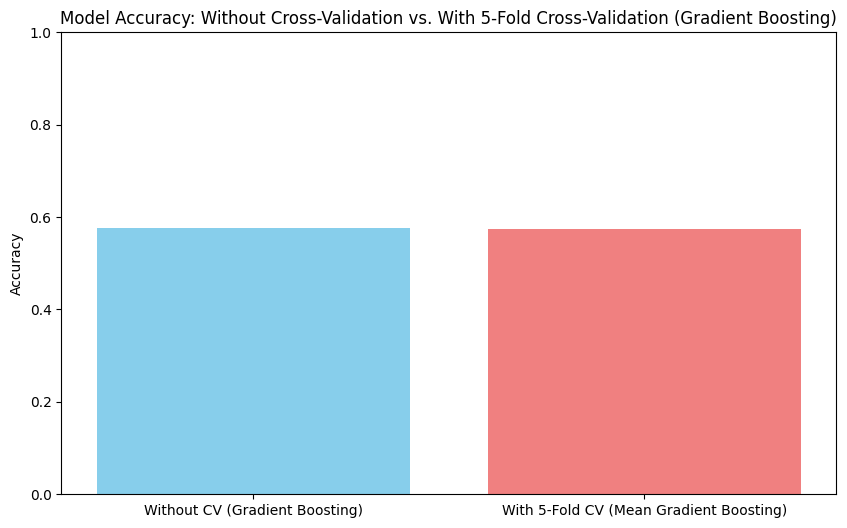

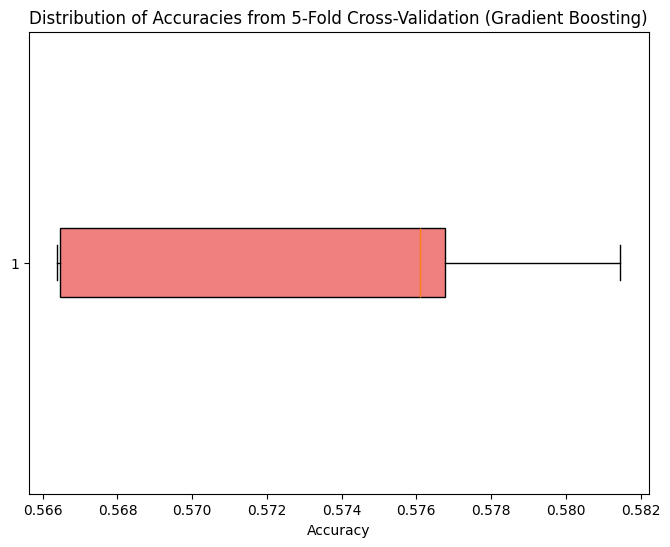

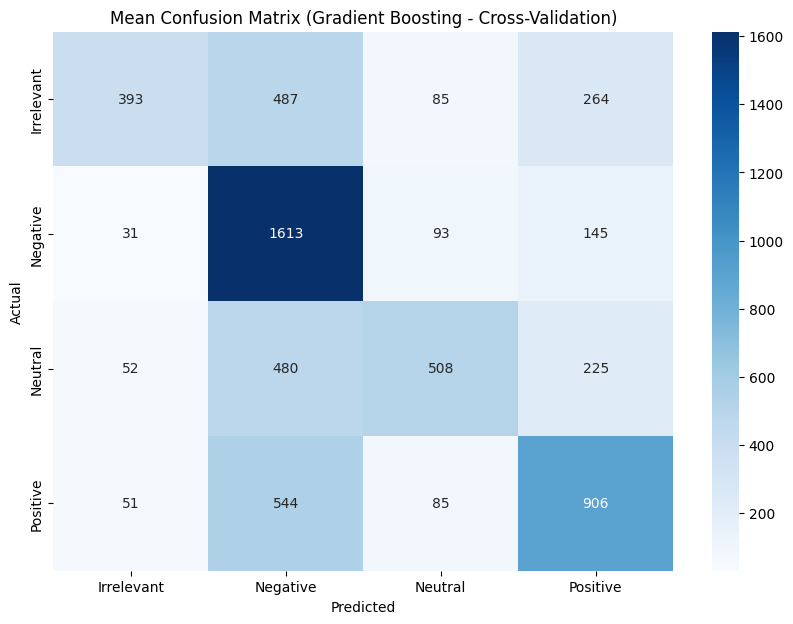


ROC curves visualization skipped for Gradient Boosting CV.


In [40]:
# Visualization of Comparison (Gradient Boosting)

labels_gb = ['Without CV (Gradient Boosting)', 'With 5-Fold CV (Mean Gradient Boosting)']

gb_clf_nocv_eval = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_clf_nocv_eval.fit(X_train, y_train)
y_pred_gb_nocv = gb_clf_nocv_eval.predict(X_test)
accuracy_gb_nocv = accuracy_score(y_test, y_pred_gb_nocv)


# The mean cross-validation accuracy for Gradient Boosting was stored in 'np.mean(fold_accuracies_gb)'
accuracies_gb = [accuracy_gb_nocv, np.mean(fold_accuracies_gb)]

# Create a bar plot to compare accuracies
plt.figure(figsize=(10, 6))
plt.bar(labels_gb, accuracies_gb, color=['skyblue', 'lightcoral'])
plt.ylabel('Accuracy')
plt.title('Model Accuracy: Without Cross-Validation vs. With 5-Fold Cross-Validation (Gradient Boosting)')
plt.ylim([0, 1]) # Set y-axis limits to represent accuracy range
plt.show()

# Visualize the distribution of accuracies from cross-validation for Gradient Boosting
plt.figure(figsize=(8, 6))
plt.boxplot(fold_accuracies_gb, vert=False, patch_artist=True, boxprops=dict(facecolor='lightcoral'))
plt.xlabel('Accuracy')
plt.title('Distribution of Accuracies from 5-Fold Cross-Validation (Gradient Boosting)')
plt.show()

# Visualize the Confusion Matrix (derived from the mean CV confusion matrix)
plt.figure(figsize=(10, 7))
sns.heatmap(mean_cm_gb, annot=True, fmt="d", cmap="Blues",
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Mean Confusion Matrix (Gradient Boosting - Cross-Validation)")
plt.show()

# ROC Curve visualization (using mean AUCs, but still plotting from the last fold for curves)
if last_fold_y_test_binarized_gb is not None and last_fold_y_score_gb is not None:
    plt.figure(figsize=(10, 8))
    colors = ['blue', 'red', 'green', 'purple'] # Adjust colors based on number of classes
    n_classes_gb = last_fold_y_test_binarized_gb.shape[1]

    for i in range(n_classes_gb):
        if i < last_fold_y_test_binarized_gb.shape[1] and i < last_fold_y_score_gb.shape[1]:
             try:
                 if np.sum(last_fold_y_test_binarized_gb[:, i]) > 0:
                     fpr_fold_gb, tpr_fold_gb, _ = roc_curve(last_fold_y_test_binarized_gb[:, i], last_fold_y_score_gb[:, i])
                     # Use mean AUC for the label, but plot the last fold's curve
                     mean_auc_for_class_gb = np.mean(fold_roc_aucs_gb[i]) if fold_roc_aucs_gb[i] else 0
                     plt.plot(fpr_fold_gb, tpr_fold_gb, color=colors[i % len(colors)], lw=2,
                              label='ROC curve of class {0} (area = {1:0.2f})'.format(last_fold_label_encoder_classes_gb[i], mean_auc_for_class_gb))
             except ValueError as e:
                  print(f"  Error computing ROC/AUC for class {last_fold_label_encoder_classes_gb[i]} in last fold for plotting: {e}")
                  pass


    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve for Each Class (Gradient Boosting - Using Last CV Fold Curves, Mean AUC)')
    plt.legend(loc="lower right")
    plt.show()
else:
    print("\nROC curves visualization skipped for Gradient Boosting CV.")


Classification Report (Naive Bayes - Without CV):
              precision    recall  f1-score   support

  Irrelevant       0.83      0.51      0.63      1197
    Negative       0.67      0.90      0.77      1888
     Neutral       0.79      0.54      0.64      1273
    Positive       0.68      0.78      0.72      1608

    accuracy                           0.71      5966
   macro avg       0.74      0.68      0.69      5966
weighted avg       0.73      0.71      0.70      5966


Confusion Matrix (Naive Bayes - Without CV):


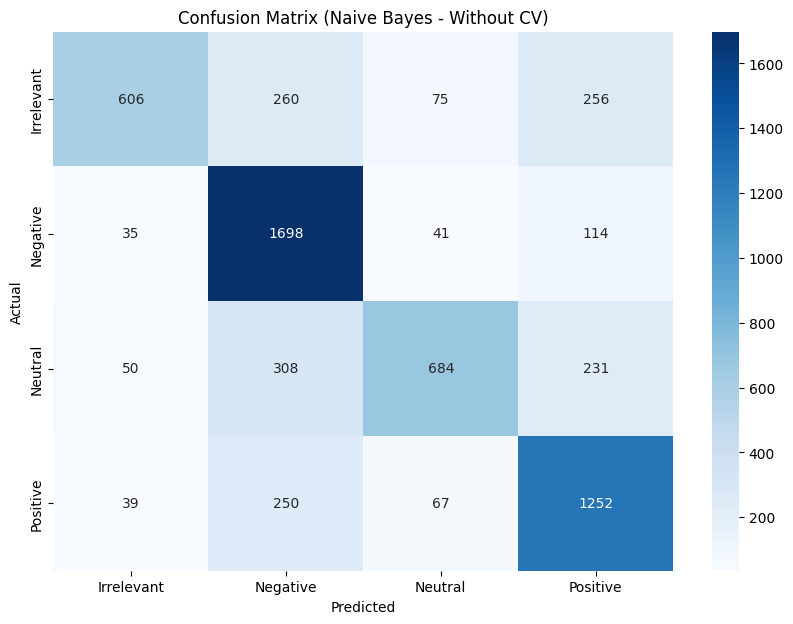

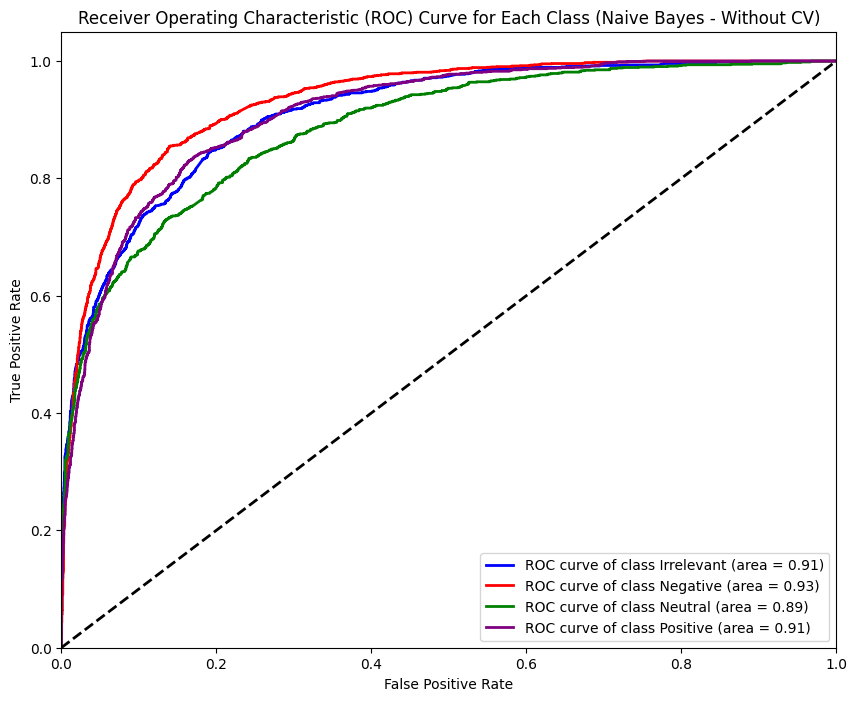

In [41]:
# Naive Bayes
# Without cross validation

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, accuracy_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Step 5: Train Naive Bayes and evaluate (without cross-validation)
# Initialize a Multinomial Naive Bayes classifier model
# Alpha is a smoothing parameter (0 for no smoothing, 1 for Laplace smoothing)
nb_clf = MultinomialNB(alpha=1.0)

# Train the model on the training data
nb_clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred_nb = nb_clf.predict(X_test)

# Classification Report
print("Classification Report (Naive Bayes - Without CV):")
print(classification_report(y_test, y_pred_nb, target_names=label_encoder.classes_))

# Confusion Matrix
print("\nConfusion Matrix (Naive Bayes - Without CV):")
cm_nb = confusion_matrix(y_test, y_pred_nb)

plt.figure(figsize=(10, 7))
sns.heatmap(
    cm_nb,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=label_encoder.classes_,
    yticklabels=label_encoder.classes_,
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Naive Bayes - Without CV)")
plt.show()

# Compute ROC curve and ROC area for each class (without cross-validation)

# Binarize the true labels
y_test_binarized_nb = label_binarize(y_test, classes=np.arange(len(label_encoder.classes_)))
n_classes_nb = y_test_binarized_nb.shape[1]

# Get predicted probabilities from the Naive Bayes model
# predict_proba is needed for ROC curve
y_score_nb = nb_clf.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr_nb = dict()
tpr_nb = dict()
roc_auc_nb = dict()
for i in range(n_classes_nb):
    # Compute ROC curve for class i using binarized true labels and predicted probabilities for class i
    fpr_nb[i], tpr_nb[i], _ = roc_curve(y_test_binarized_nb[:, i], y_score_nb[:, i])
    roc_auc_nb[i] = auc(fpr_nb[i], tpr_nb[i])

# Plot ROC curves for each class
plt.figure(figsize=(10, 8))
colors = ['blue', 'red', 'green', 'purple'] # Adjust colors based on number of classes
for i, color in zip(range(n_classes_nb), colors):
    # Ensure the class exists
    if i < len(label_encoder.classes_):
        plt.plot(fpr_nb[i], tpr_nb[i], color=color, lw=2,
                 label='ROC curve of class {0} (area = {1:0.2f})'.format(label_encoder.classes_[i], roc_auc_nb[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Each Class (Naive Bayes - Without CV)')
plt.legend(loc="lower right")
plt.show()


Performing 5-Fold Cross-Validation with Naive Bayes:
✅Fold 1/5
  Training complete.
  Accuracy for Fold 1: 0.7106939322829366


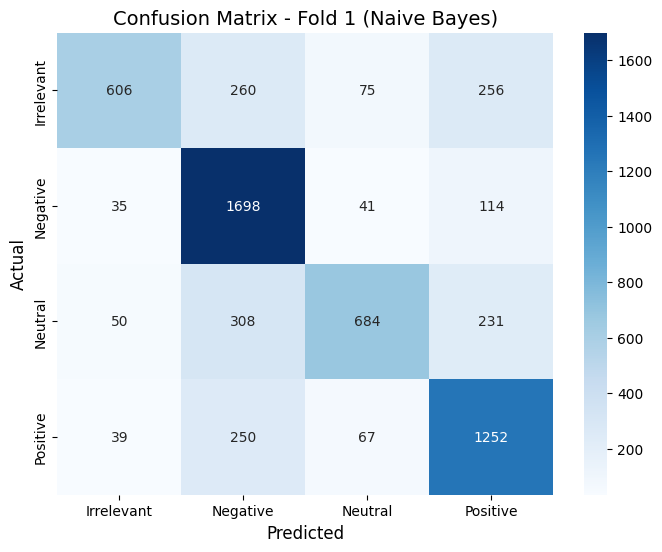

  ROC AUC per class for Fold 1: {0: np.float64(0.910833647339149), 1: np.float64(0.931230959218959), 2: np.float64(0.8869073275050388), 3: np.float64(0.9109323021195082)}


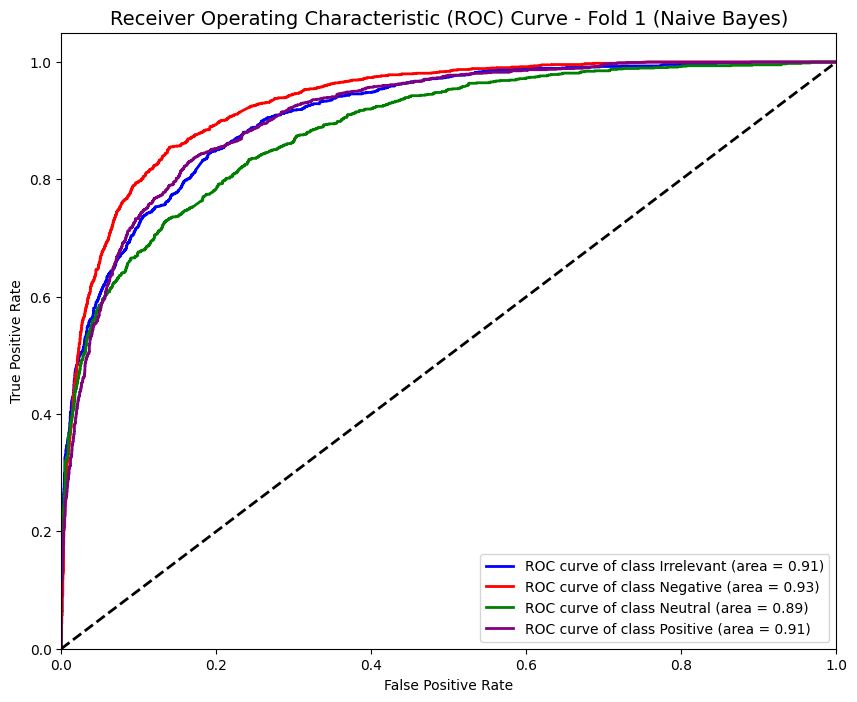

------------------------------
✅Fold 2/5
  Training complete.
  Accuracy for Fold 2: 0.6967817633255112


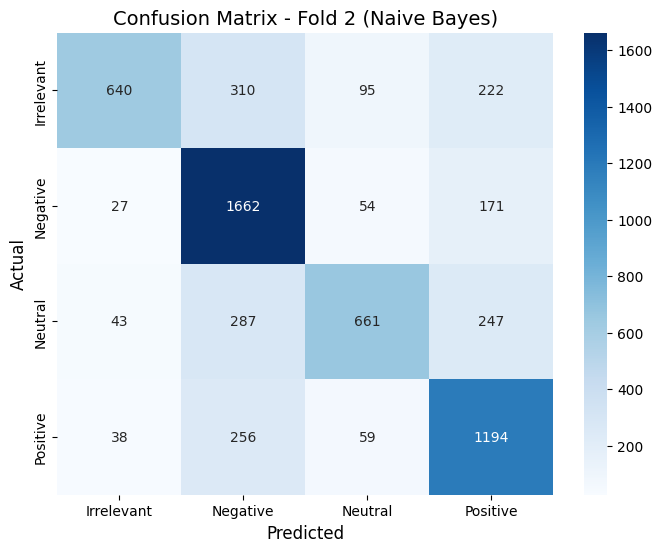

  ROC AUC per class for Fold 2: {0: np.float64(0.9157360724115846), 1: np.float64(0.9221811848271323), 2: np.float64(0.8846160022852207), 3: np.float64(0.9037233881489303)}


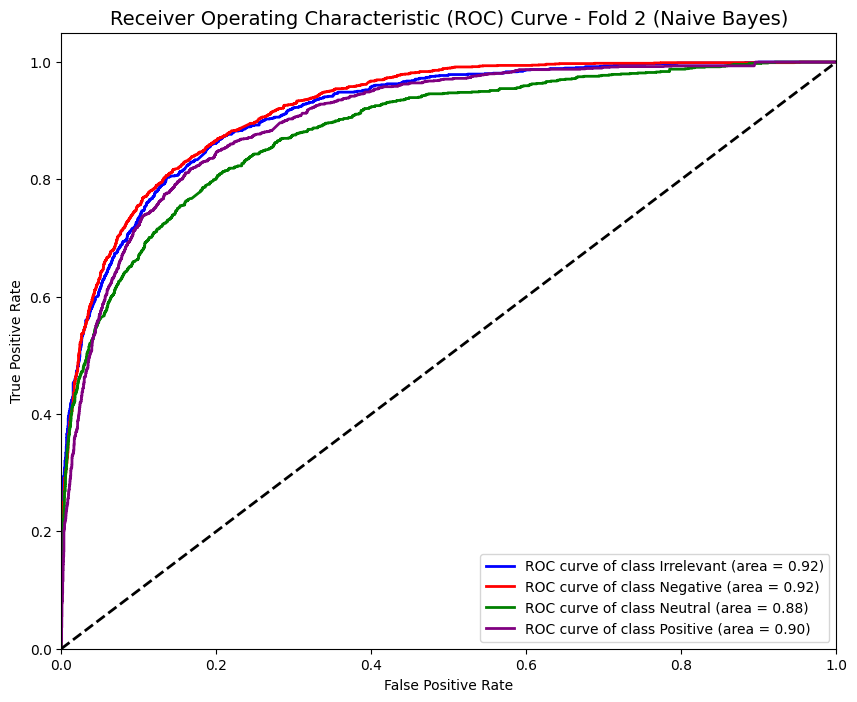

------------------------------
✅Fold 3/5
  Training complete.
  Accuracy for Fold 3: 0.6956084478712705


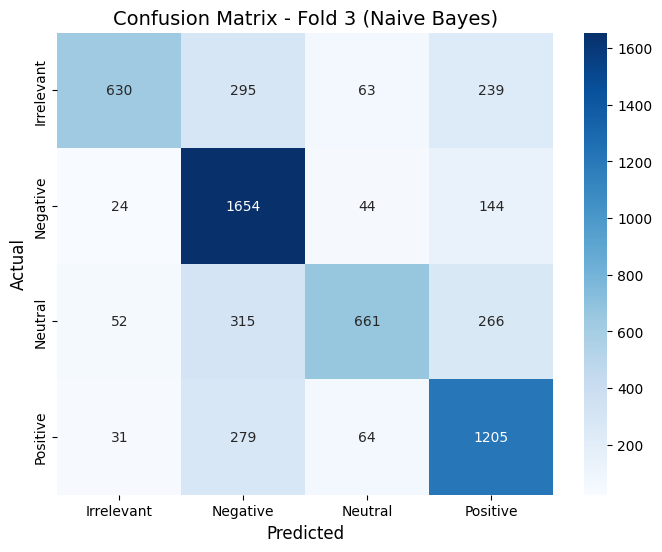

  ROC AUC per class for Fold 3: {0: np.float64(0.9152353504955412), 1: np.float64(0.9319940266122918), 2: np.float64(0.8940366728155237), 3: np.float64(0.9073906829045977)}


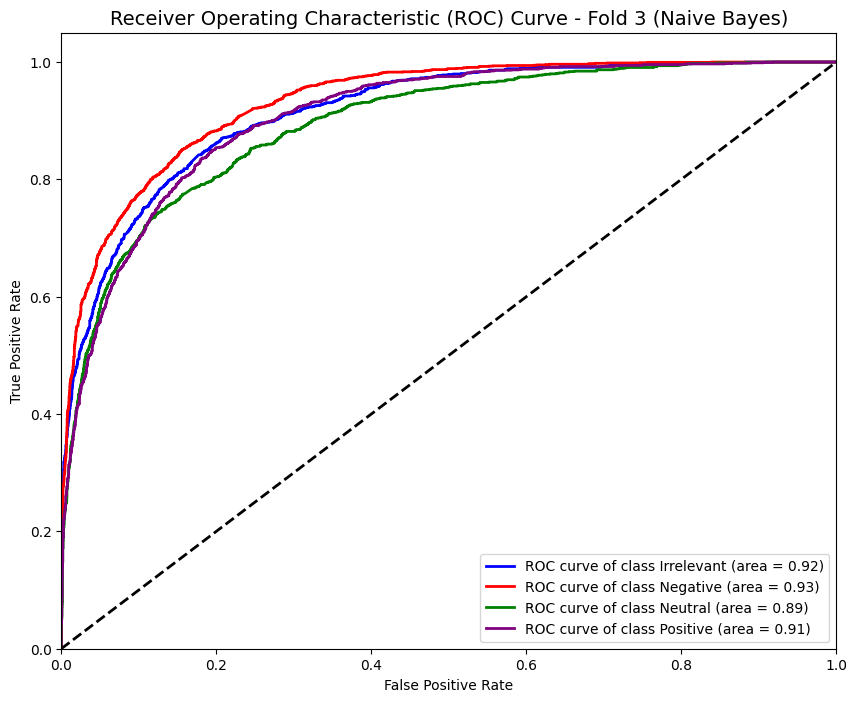

------------------------------
✅Fold 4/5
  Training complete.
  Accuracy for Fold 4: 0.7071739859202145


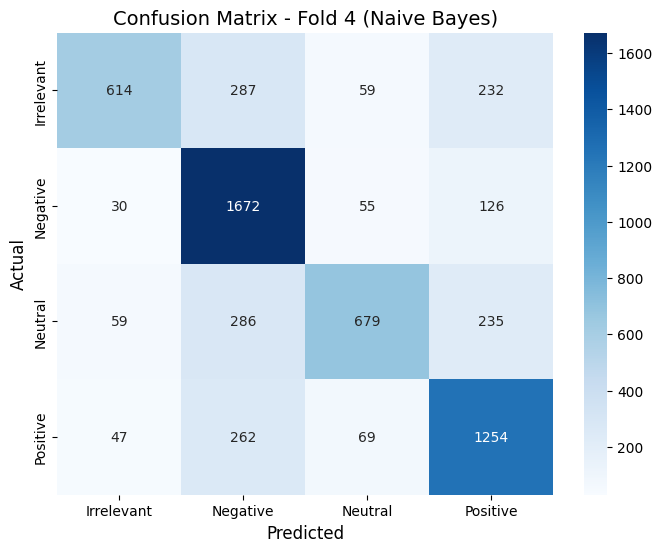

  ROC AUC per class for Fold 4: {0: np.float64(0.9182893110894301), 1: np.float64(0.9288711701654295), 2: np.float64(0.8933898155502602), 3: np.float64(0.9079873599762932)}


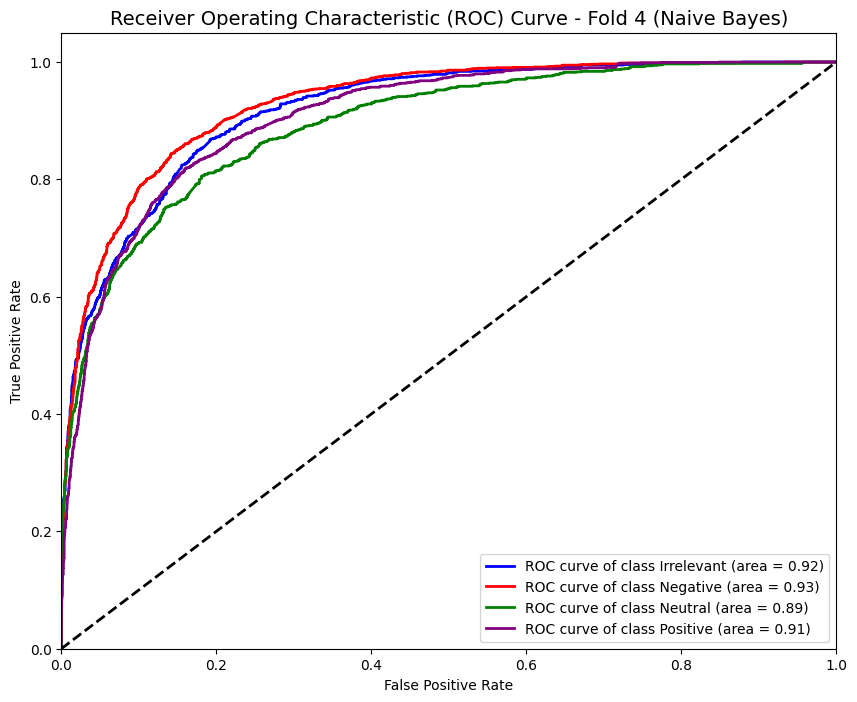

------------------------------
✅Fold 5/5
  Training complete.
  Accuracy for Fold 5: 0.6925398155909472


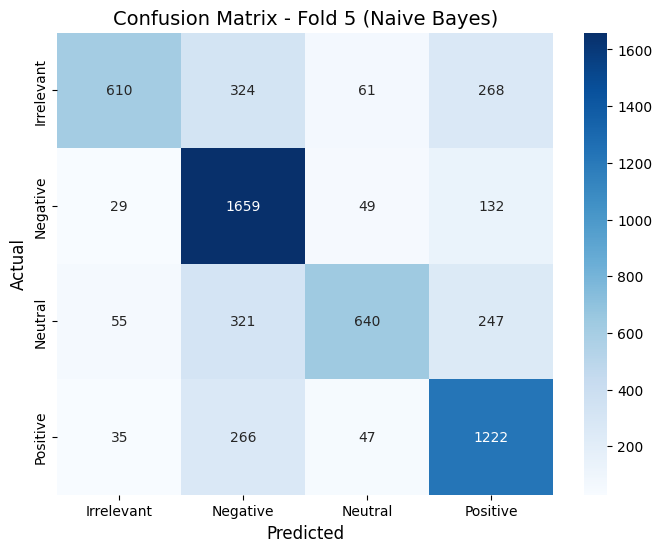

  ROC AUC per class for Fold 5: {0: np.float64(0.9196489221580884), 1: np.float64(0.9247656955382223), 2: np.float64(0.8759020184130134), 3: np.float64(0.9087634326789997)}


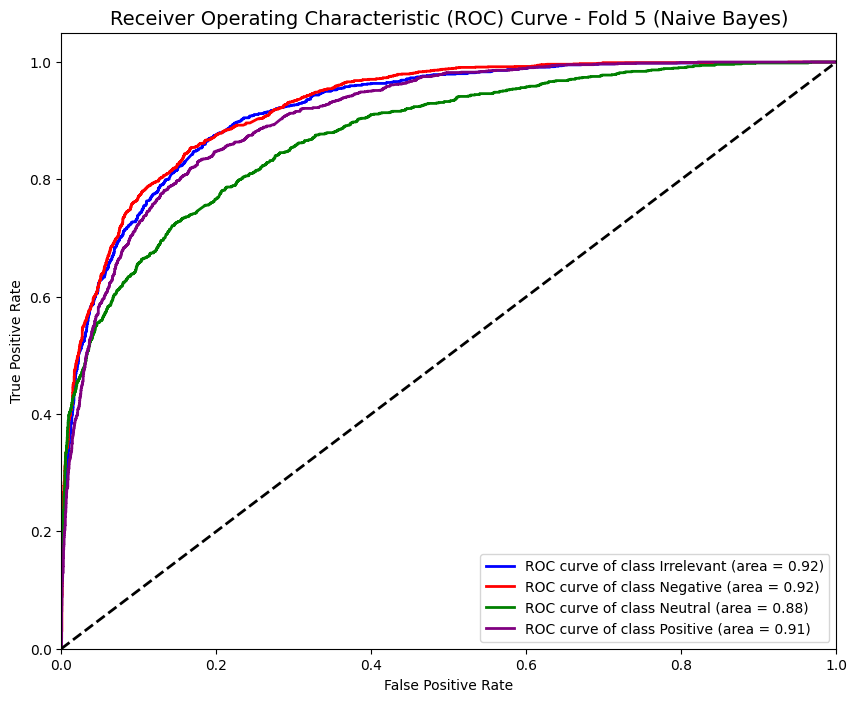

------------------------------

--- Average Metrics Across Folds (Naive Bayes) ---
Mean cross-validation accuracy (Naive Bayes): 0.7006
Standard deviation of cross-validation accuracies (Naive Bayes): 0.0071

Mean Confusion Matrix across folds (Naive Bayes):
[[ 620  295   70  243]
 [  29 1669   48  137]
 [  51  303  665  245]
 [  38  262   61 1225]]

Mean Cross-validation AUC per class (Naive Bayes):
  Class Irrelevant (Area = 0.92)
  Class Negative (Area = 0.93)
  Class Neutral (Area = 0.89)
  Class Positive (Area = 0.91)


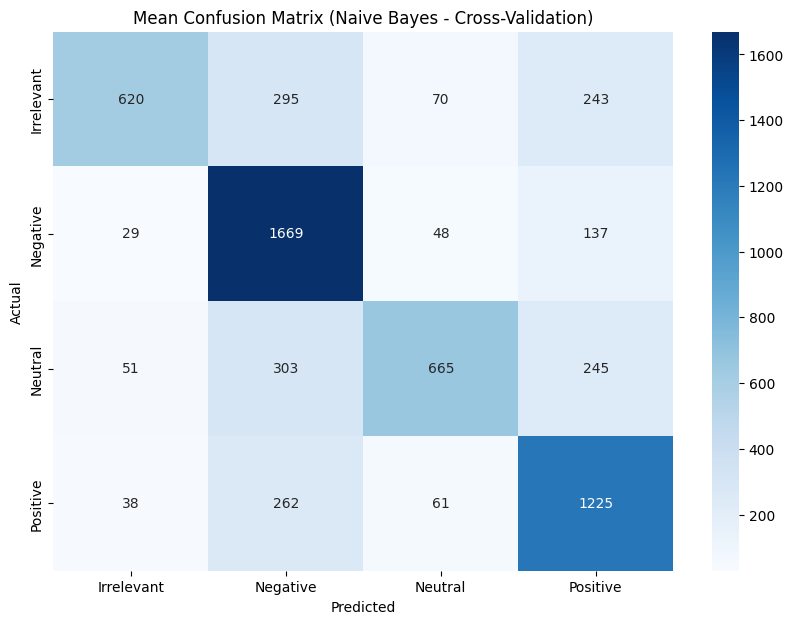


ROC curves could not be plotted for the last Naive Bayes CV fold.


In [42]:
# Naive Bayes
# With cross validation

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import KFold
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import label_binarize
from sklearn.base import clone

# Step 5: Train Naive Bayes and evaluate (With cross-validation)
# Initialize a Multinomial Naive Bayes classifier model
# Use the same alpha as in the without CV cell for consistency
nb_clf_cv = MultinomialNB(alpha=1.0)

# Step 6: Cross-validation with Naive Bayes

# Define the number of folds
n_splits_nb = 5  # Using 5-Fold

# Initialize KFold cross-validation
kf_nb = KFold(n_splits=n_splits_nb, shuffle=True, random_state=42)

fold_accuracies_nb = []
fold_cms_nb = []
fold_roc_aucs_nb = {i: [] for i in range(len(label_encoder.classes_))} # Store AUCs per class

print(f"\nPerforming {n_splits_nb}-Fold Cross-Validation with Naive Bayes:")

# Variables to store data for the last fold's ROC plot
last_fold_y_test_binarized_nb = None
last_fold_y_score_nb = None
last_fold_label_encoder_classes_nb = None

# Iterate through each fold
for fold, (train_index, test_index) in enumerate(kf_nb.split(X, y)):
    print(f"✅Fold {fold+1}/{n_splits_nb}")

    # Split data for the current fold
    X_train_fold_nb, X_test_fold_nb = X[train_index], X[test_index]
    y_train_fold_nb, y_test_fold_nb = y.iloc[train_index], y.iloc[test_index]

    # Initialize a new Naive Bayes model for each fold
    nb_fold = clone(nb_clf_cv) # Clone the model

    # Fit the model
    # Note: Naive Bayes is not an iterative algorithm, so 'epochs' are not applicable.
    print("  Training complete.")
    nb_fold.fit(X_train_fold_nb, y_train_fold_nb)

    # Evaluate the model on the test data for the current fold
    y_pred_fold_nb = nb_fold.predict(X_test_fold_nb)
    fold_accuracy_nb = accuracy_score(y_test_fold_nb, y_pred_fold_nb)
    print(f"  Accuracy for Fold {fold+1}: {fold_accuracy_nb}")
    fold_accuracies_nb.append(fold_accuracy_nb)

    # Compute Confusion Matrix for the fold
    cm_fold_nb = confusion_matrix(y_test_fold_nb, y_pred_fold_nb)
    fold_cms_nb.append(cm_fold_nb)

    # --- Visualize Confusion Matrix for the current fold ---
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_fold_nb, annot=True, fmt='d', cmap='Blues',
                xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_,
                annot_kws={'size': 10}) # Adjust annotation font size
    plt.xlabel('Predicted', fontsize=12) # Adjust xlabel font size
    plt.ylabel('Actual', fontsize=12) # Adjust ylabel font size
    plt.title(f'Confusion Matrix - Fold {fold+1} (Naive Bayes)', fontsize=14) # Adjust title font size
    plt.show()

    # Compute ROC and AUC for the fold
    # Binarize the true labels for the current fold
    y_test_binarized_fold_nb = label_binarize(y_test_fold_nb, classes=np.arange(len(label_encoder.classes_)))

    # Get predicted probabilities for the current fold
    y_score_fold_nb = nb_fold.predict_proba(X_test_fold_nb)

    # Compute ROC curve and AUC for each class in the current fold
    roc_auc_fold_nb = {} # Define roc_auc_fold_nb inside the loop
    plt.figure(figsize=(10, 8))
    colors = ['blue', 'red', 'green', 'purple'] # Ensure enough colors

    for i in range(len(label_encoder.classes_)):
        if i < y_test_binarized_fold_nb.shape[1] and i < y_score_fold_nb.shape[1]:
             try:
                 # Check if the class exists in the true labels for this fold
                 if np.sum(y_test_binarized_fold_nb[:, i]) > 0:
                     fpr_fold_nb, tpr_fold_nb, _ = roc_curve(y_test_binarized_fold_nb[:, i], y_score_fold_nb[:, i])
                     auc_fold_nb = auc(fpr_fold_nb, tpr_fold_nb)
                     fold_roc_aucs_nb[i].append(auc_fold_nb)
                     roc_auc_fold_nb[i] = auc_fold_nb # Store AUC for the last fold

                     # --- Visualize ROC Curve for the current fold ---
                     plt.plot(fpr_fold_nb, tpr_fold_nb, color=colors[i % len(colors)], lw=2,
                              label='ROC curve of class {0} (area = {1:0.2f})'.format(label_encoder.classes_[i], auc_fold_nb))
                 else:
                     pass # Do not append AUC if class is missing
             except ValueError as e:
                  print(f"  Error computing ROC/AUC for class {label_encoder.classes_[i]} in fold {fold+1}: {e}")
                  pass # Skip if computation fails


    print(f"  ROC AUC per class for Fold {fold+1}: {roc_auc_fold_nb}")

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) Curve - Fold {fold+1} (Naive Bayes)', fontsize=14)
    plt.legend(loc="lower right")
    plt.show()

    print("-" * 30) # Add a separator line after each fold

# Print the results of cross-validation
print("\n--- Average Metrics Across Folds (Naive Bayes) ---") # Added header for clarity
print(f"Mean cross-validation accuracy (Naive Bayes): {np.mean(fold_accuracies_nb):.4f}") # Formatted output
print(f"Standard deviation of cross-validation accuracies (Naive Bayes): {np.std(fold_accuracies_nb):.4f}") # Formatted output


# Average the confusion matrices (optional, but can give a sense of average performance)
mean_cm_nb = np.mean(fold_cms_nb, axis=0).astype(int)
print("\nMean Confusion Matrix across folds (Naive Bayes):")
print(mean_cm_nb)

# Print mean AUC for each class
print("\nMean Cross-validation AUC per class (Naive Bayes):")
for i in range(len(label_encoder.classes_)):
    if fold_roc_aucs_nb[i]: # Only print if AUCs were collected for this class
        print(f"  Class {label_encoder.classes_[i]} (Area = {np.mean(fold_roc_aucs_nb[i]):0.2f})")
    else:
        print(f"  Class {label_encoder.classes_[i]}: No AUC computed (class not present in all folds)")


# Confusion matrix visualization (using the mean matrix)
plt.figure(figsize=(10, 7))
sns.heatmap(
    mean_cm_nb, # Using the mean confusion matrix
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=label_encoder.classes_,
    yticklabels=label_encoder.classes_,
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Mean Confusion Matrix (Naive Bayes - Cross-Validation)")
plt.show()

# ROC curve visualization (Plotting ROC from the last fold as a representative)
if last_fold_y_test_binarized_nb is not None and last_fold_y_score_nb is not None:
    plt.figure(figsize=(10, 8))
    colors = ['blue', 'red', 'green', 'purple'] # Adjust colors based on number of classes
    n_classes_nb = last_fold_y_test_binarized_nb.shape[1]

    fpr_nb_last_fold = dict()
    tpr_nb_last_fold = dict()
    roc_auc_nb_last_fold = dict()

    for i in range(n_classes_nb):
        if i < last_fold_y_test_binarized_nb.shape[1] and i < last_fold_y_score_nb.shape[1]:
             try:
                 if np.sum(last_fold_y_test_binarized_nb[:, i]) > 0:
                     fpr_nb_last_fold[i], tpr_nb_last_fold[i], _ = roc_curve(last_fold_y_test_binarized_nb[:, i], last_fold_y_score_nb[:, i])
                     roc_auc_nb_last_fold[i] = auc(fpr_nb_last_fold[i], tpr_nb_last_fold[i])
                     plt.plot(fpr_nb_last_fold[i], tpr_nb_last_fold[i], color=colors[i % len(colors)], lw=2,
                              label='ROC curve of class {0} (area = {1:0.2f})'.format(last_fold_label_encoder_classes_nb[i], roc_auc_nb_last_fold[i]))
             except ValueError as e:
                  print(f"  Error computing ROC/AUC for class {last_fold_label_encoder_classes_nb[i]} in last fold for plotting: {e}")
                  pass


    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve for Each Class (Naive Bayes - Last CV Fold)')
    plt.legend(loc="lower right")
    plt.show()
else:
    print("\nROC curves could not be plotted for the last Naive Bayes CV fold.")

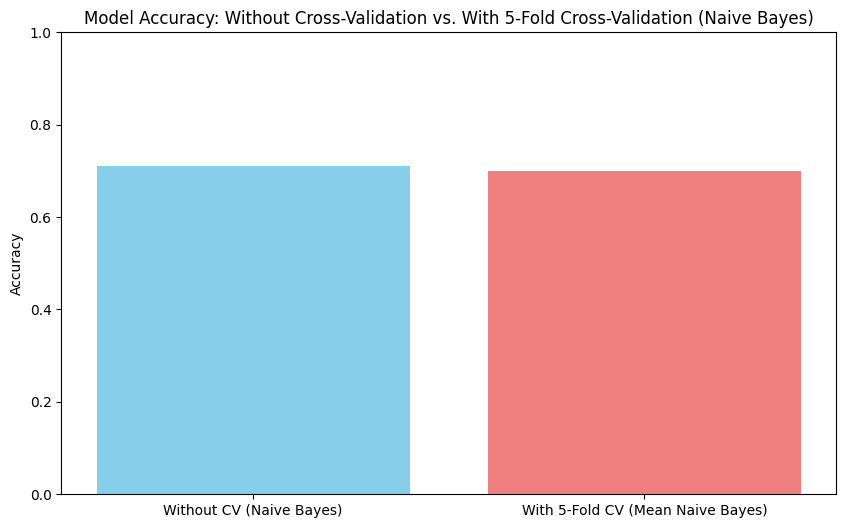

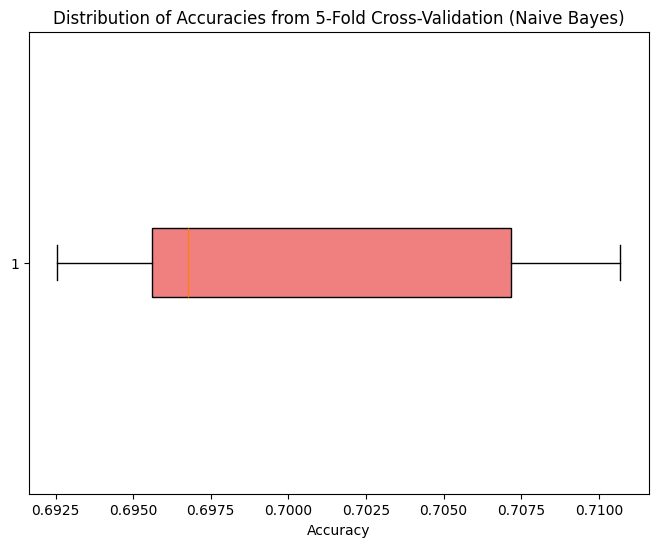

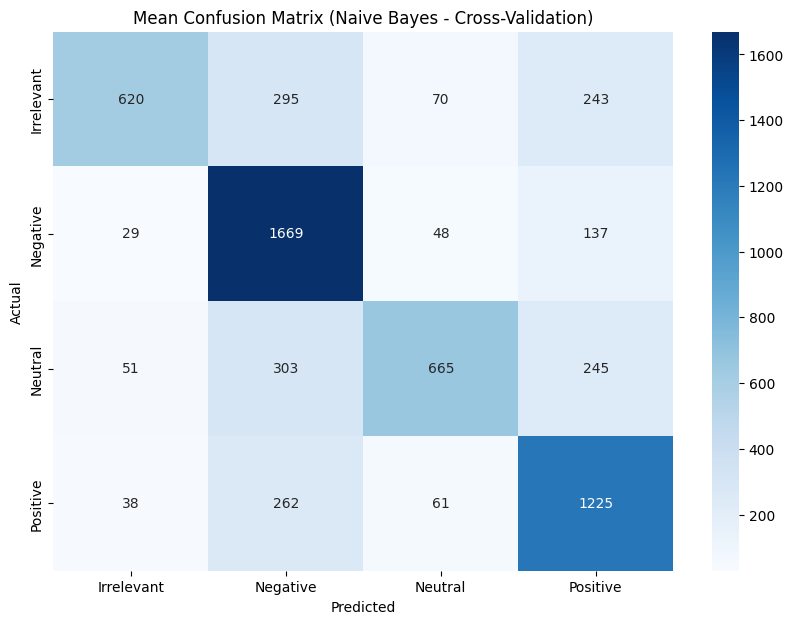


ROC curves visualization skipped for Naive Bayes CV.


In [43]:
# Visualization of Comparison (Naive Bayes)

labels_nb = ['Without CV (Naive Bayes)', 'With 5-Fold CV (Mean Naive Bayes)']
nb_clf_nocv_eval = MultinomialNB(alpha=1.0)
nb_clf_nocv_eval.fit(X_train, y_train)
y_pred_nb_nocv = nb_clf_nocv_eval.predict(X_test)
accuracy_nb_nocv = accuracy_score(y_test, y_pred_nb_nocv)


# The mean cross-validation accuracy for Naive Bayes was stored in 'np.mean(fold_accuracies_nb)'
accuracies_nb = [accuracy_nb_nocv, np.mean(fold_accuracies_nb)]

# Create a bar plot to compare accuracies
plt.figure(figsize=(10, 6))
plt.bar(labels_nb, accuracies_nb, color=['skyblue', 'lightcoral'])
plt.ylabel('Accuracy')
plt.title('Model Accuracy: Without Cross-Validation vs. With 5-Fold Cross-Validation (Naive Bayes)')
plt.ylim([0, 1]) # Set y-axis limits to represent accuracy range
plt.show()

# Visualize the distribution of accuracies from cross-validation for Naive Bayes
plt.figure(figsize=(8, 6))
plt.boxplot(fold_accuracies_nb, vert=False, patch_artist=True, boxprops=dict(facecolor='lightcoral'))
plt.xlabel('Accuracy')
plt.title('Distribution of Accuracies from 5-Fold Cross-Validation (Naive Bayes)')
plt.show()

# Visualize the Confusion Matrix (derived from the mean CV confusion matrix)
plt.figure(figsize=(10, 7))
sns.heatmap(mean_cm_nb, annot=True, fmt="d", cmap="Blues",
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Mean Confusion Matrix (Naive Bayes - Cross-Validation)")
plt.show()

# ROC Curve visualization (using mean AUCs, but still plotting from the last fold for curves)
if last_fold_y_test_binarized_nb is not None and last_fold_y_score_nb is not None:
    plt.figure(figsize=(10, 8))
    colors = ['blue', 'red', 'green', 'purple'] # Adjust colors based on number of classes
    n_classes_nb = last_fold_y_test_binarized_nb.shape[1]

    for i in range(n_classes_nb):
        if i < last_fold_y_test_binarized_nb.shape[1] and i < last_fold_y_score_nb.shape[1]:
             try:
                 if np.sum(last_fold_y_test_binarized_nb[:, i]) > 0:
                     fpr_fold_nb, tpr_fold_nb, _ = roc_curve(last_fold_y_test_binarized_nb[:, i], last_fold_y_score_nb[:, i])
                     # Use mean AUC for the label, but plot the last fold's curve
                     mean_auc_for_class_nb = np.mean(fold_roc_aucs_nb[i]) if fold_roc_aucs_nb[i] else 0
                     plt.plot(fpr_fold_nb, tpr_fold_nb, color=colors[i % len(colors)], lw=2,
                              label='ROC curve of class {0} (area = {1:0.2f})'.format(last_fold_label_encoder_classes_nb[i], mean_auc_for_class_nb))
             except ValueError as e:
                  print(f"  Error computing ROC/AUC for class {last_fold_label_encoder_classes_nb[i]} in last fold for plotting: {e}")
                  pass


    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve for Each Class (Naive Bayes - Using Last CV Fold Curves, Mean AUC)')
    plt.legend(loc="lower right")
    plt.show()
else:
    print("\nROC curves visualization skipped for Naive Bayes CV.")


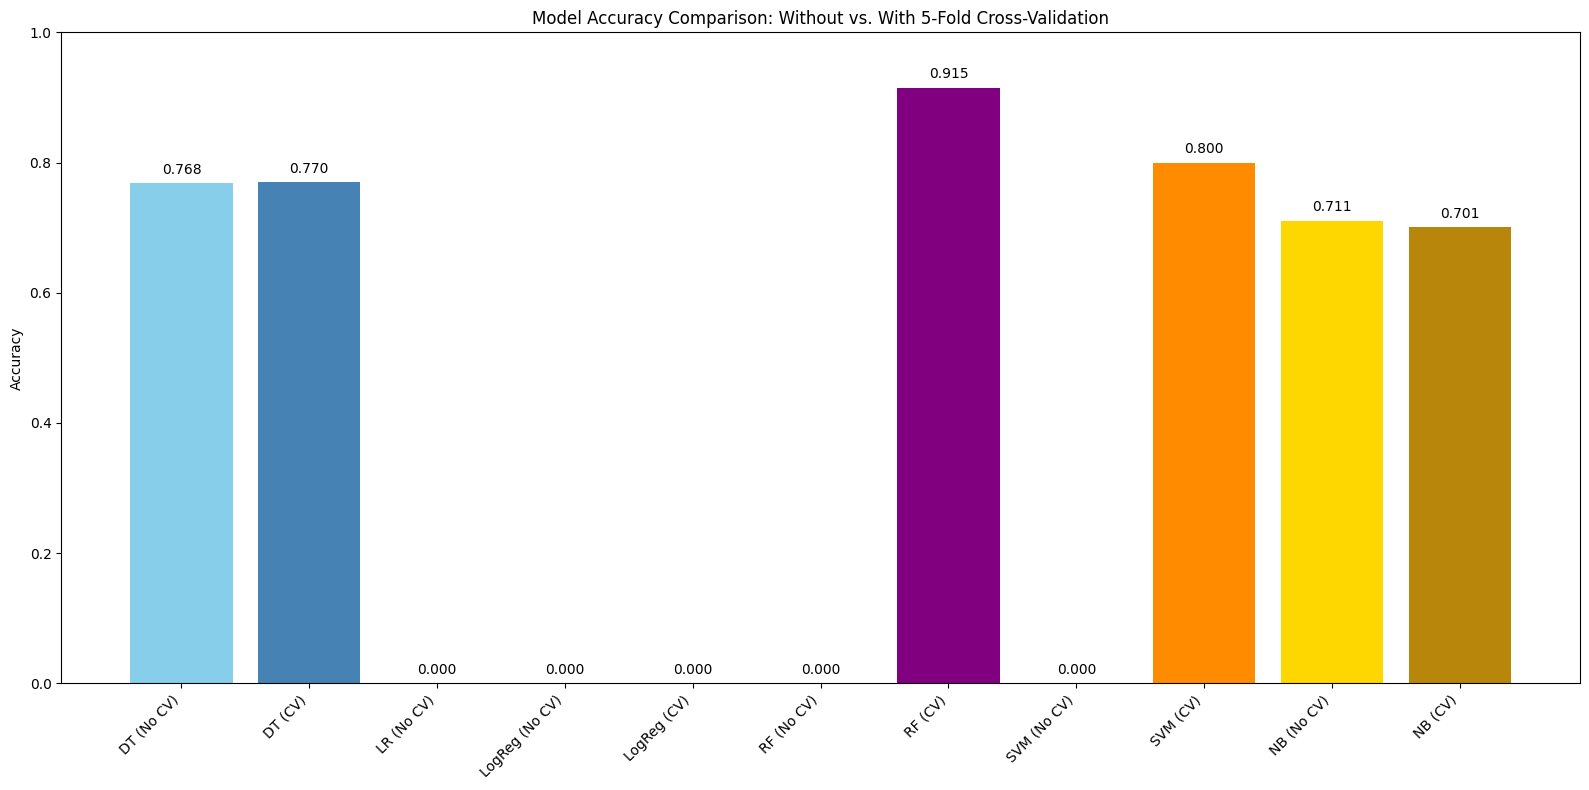

In [44]:
# Compare and visualize model performance with and without Cross-Validation

import matplotlib.pyplot as plt
import numpy as np

labels = [
    'DT (No CV)', 'DT (CV)',
    'LR (No CV)',
    'LogReg (No CV)', 'LogReg (CV)',
    'RF (No CV)', 'RF (CV)',
    'SVM (No CV)', 'SVM (CV)',
    'NB (No CV)', 'NB (CV)'
]

# Collect the accuracies. Use a default value (e.g., 0) if a variable is not found,
# although ideally, the user should run the preceding cells first.
# We'll assume the variables exist from previous runs for now.
accuracies = [
    accuracy_dt_nocv if 'accuracy_dt_nocv' in globals() else 0,
    np.mean(accuracy_scores) if 'accuracy_scores' in globals() else 0,
    accuracy_lr_nocv if 'accuracy_lr_nocv' in globals() else 0,
    accuracy_lr_logreg_nocv if 'accuracy_lr_logreg_nocv' in globals() else 0,
    np.mean(fold_accuracies_lr) if 'fold_accuracies_lr' in globals() else 0,
    accuracy_rf_nocv_eval if 'accuracy_rf_nocv_eval' in globals() else 0,
    np.mean(fold_accuracies_rf) if 'fold_accuracies_rf' in globals() else 0,
    accuracy_svm_nocv_eval if 'accuracy_svm_nocv_eval' in globals() else 0,
    np.mean(fold_accuracies_svm) if 'fold_accuracies_svm' in globals() else 0,
    accuracy_nb_nocv if 'accuracy_nb_nocv' in globals() else 0,
    np.mean(fold_accuracies_nb) if 'fold_accuracies_nb' in globals() else 0
]

# Create a bar plot for comparison
plt.figure(figsize=(16, 8))
bars = plt.bar(labels, accuracies, color=[
    'skyblue', 'steelblue', # DT
    'lightgreen',         # LR (No CV)
    'salmon', 'indianred',  # LogReg
    'violet', 'purple',     # RF
    'orange', 'darkorange', # SVM
    'gold', 'darkgoldenrod' # NB
])

plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison: Without vs. With 5-Fold Cross-Validation')
plt.ylim([0, 1]) # Set y-axis limits to represent accuracy range
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability

# Add accuracy values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.3f}', ha='center', va='bottom')

plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()
